In [4]:
#For the sake of jupyter notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))


### The project demonstrates how to use Deep Convolutional GAN to create a simple pixel art generator for educational purpose only

# Load the png and visualise and check how many color

Total number of unique colors: 24


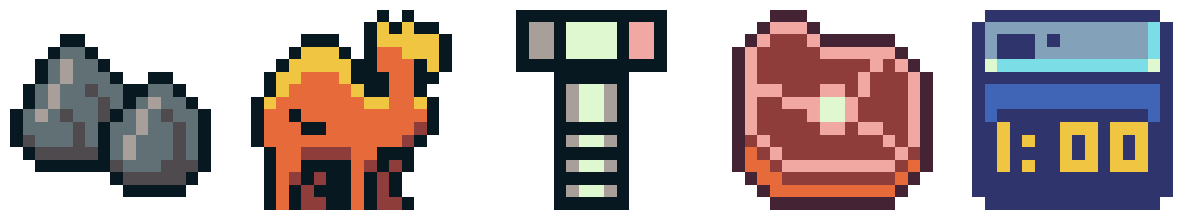

In [5]:
import os
import random
from PIL import Image
import numpy as np

def load_pixel_art_dataset(dataset_path, num_samples=5000):
    # Get all PNG files
    all_files = [f for f in os.listdir(dataset_path) if f.endswith('.png')]
    
    # Randomly sample 100 files
    sampled_files = random.sample(all_files, min(num_samples, len(all_files)))
    
    # Load images
    images = []
    for file_name in sampled_files:
        img_path = os.path.join(dataset_path, file_name)
        img = Image.open(img_path)
        img_array = np.array(img)
        images.append(img_array)
    
    return np.array(images)

def analyze_colors(images):
    # Flatten all images and get unique colors
    all_pixels = np.vstack([img.reshape(-1, img.shape[-1]) for img in images])
    unique_colors = np.unique(all_pixels, axis=0)
    return unique_colors

# Usage
images = load_pixel_art_dataset('./dataset')
unique_colors = analyze_colors(images)
print(f"Total number of unique colors: {len(unique_colors)}")

# Visualize first few images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(min(5, len(images))):
    axes[i].imshow(images[i])
    axes[i].axis('off')
plt.show()

In [6]:
# Analyze color format
print(f"Shape of first image: {images[0].shape}")
print(f"Data type of image array: {images[0].dtype}")
print("\nFirst few unique colors:")
print(unique_colors[:5])  # Show first 5 unique colors

# Check if any color has alpha channel
has_alpha = images[0].shape[-1] == 4

# Check value ranges
min_values = unique_colors.min(axis=0)
max_values = unique_colors.max(axis=0)
print(f"\nValue ranges per channel:")
for i, (min_val, max_val) in enumerate(zip(min_values, max_values)):
    channel_name = 'RGBA'[i] if has_alpha else 'RGB'[i]
    print(f"Channel {channel_name}: {min_val} to {max_val}")

Shape of first image: (16, 16, 4)
Data type of image array: uint8

First few unique colors:
[[  0   0   0   0]
 [  7  24  33 255]
 [ 20  12  28 255]
 [ 48  52 109 255]
 [ 48 104  80 255]]

Value ranges per channel:
Channel R: 0 to 241
Channel G: 0 to 248
Channel B: 0 to 238
Channel A: 0 to 255


# Create indexed version of the pixel art and visualse with original color

Shape of indexed images: (2005, 16, 16)
Number of unique indices: 24

Color mapping:
Index 0: RGBA(0, 0, 0, 0)
Index 1: RGBA(7, 24, 33, 255)
Index 2: RGBA(20, 12, 28, 255)
Index 3: RGBA(48, 52, 109, 255)
Index 4: RGBA(48, 104, 80, 255)
Index 5: RGBA(62, 39, 49, 255)
Index 6: RGBA(64, 100, 182, 255)
Index 7: RGBA(68, 36, 52, 255)
Index 8: RGBA(78, 74, 78, 255)
Index 9: RGBA(89, 125, 206, 255)
Index 10: RGBA(97, 112, 117, 255)
Index 11: RGBA(123, 221, 230, 255)
Index 12: RGBA(127, 54, 62, 255)
Index 13: RGBA(131, 162, 186, 255)
Index 14: RGBA(134, 192, 108, 255)
Index 15: RGBA(141, 120, 120, 255)
Index 16: RGBA(142, 61, 58, 255)
Index 17: RGBA(168, 158, 154, 255)
Index 18: RGBA(222, 238, 214, 255)
Index 19: RGBA(224, 248, 207, 255)
Index 20: RGBA(231, 106, 58, 255)
Index 21: RGBA(238, 238, 238, 255)
Index 22: RGBA(240, 197, 65, 255)
Index 23: RGBA(241, 168, 162, 255)


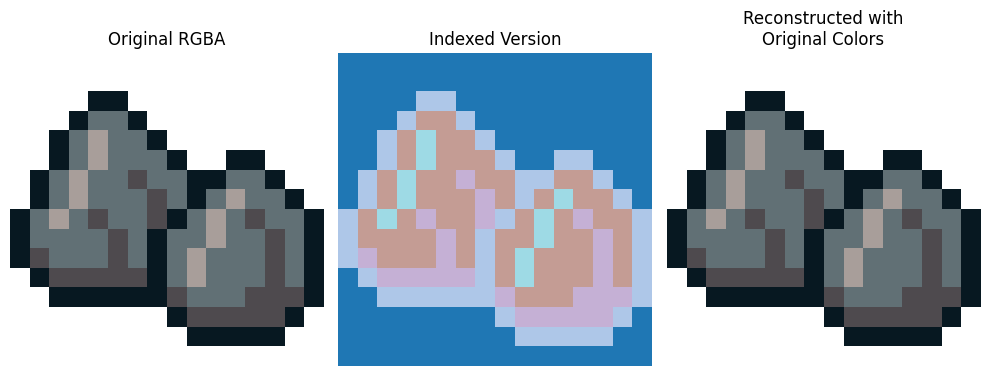

In [7]:
def convert_to_indexed(images, unique_colors):
    # Create a color palette lookup dictionary
    color_to_index = {tuple(color): idx for idx, color in enumerate(unique_colors)}
    
    # Initialize indexed images array
    indexed_images = np.zeros((len(images), 16, 16), dtype=np.uint8)
    
    # Convert each image to indexed format
    for img_idx, img in enumerate(images):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                color = tuple(img[i, j])
                indexed_images[img_idx, i, j] = color_to_index[color]
    
    return indexed_images, color_to_index

# Convert images to indexed format
indexed_images, color_mapping = convert_to_indexed(images, unique_colors)

# Print some information
print(f"Shape of indexed images: {indexed_images.shape}")
print(f"Number of unique indices: {len(np.unique(indexed_images))}")
print("\nColor mapping:")
for idx, color in enumerate(unique_colors):
    print(f"Index {idx}: RGBA{tuple(color)}")

def visualize_with_original_colors(indexed_image, unique_colors):
    # Create the RGBA image with original colors
    rgba_image = np.zeros((*indexed_image.shape, 4), dtype=np.uint8)
    
    # Map each index back to its original RGBA color
    for idx, color in enumerate(unique_colors):
        rgba_image[indexed_image == idx] = color
        
    return rgba_image

# Visualize comparison
plt.figure(figsize=(10, 5))

# Original RGBA image
plt.subplot(1, 3, 1)
plt.imshow(images[0])
plt.title('Original RGBA')
plt.axis('off')

# Indexed version with categorical colormap
plt.subplot(1, 3, 2)
plt.imshow(indexed_images[0], cmap='tab20')
plt.title('Indexed Version')
plt.axis('off')

# Indexed version with original colors
plt.subplot(1, 3, 3)
reconstructed_image = visualize_with_original_colors(indexed_images[0], unique_colors)
plt.imshow(reconstructed_image)
plt.title('Reconstructed with\nOriginal Colors')
plt.axis('off')

plt.tight_layout()
plt.show()


# how it looks now in the list~~

In [8]:
print(indexed_images[0])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 10 10  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 10 17 10 10  1  0  0  0  0  0  0  0  0]
 [ 0  0  1 10 17 10 10 10  1  0  0  1  1  0  0  0]
 [ 0  1 10 17 10 10  8 10 10  1  1 10 10  1  0  0]
 [ 0  1 10 17 10 10 10  8 10  1 10 17 10 10  1  0]
 [ 1 10 17 10  8 10 10  8  1 10 17 10  8 10 10  1]
 [ 1 10 10 10 10  8 10  1 10 10 17 10 10  8 10  1]
 [ 1  8 10 10 10  8 10  1 10 17 10 10 10  8 10  1]
 [ 0  1  8  8  8  8  8  1 10 17 10 10 10  8 10  1]
 [ 0  0  1  1  1  1  1  1  8 10 10 10  8  8  8  1]
 [ 0  0  0  0  0  0  0  0  1  8  8  8  8  8  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [9]:
import torch

# Check CUDA availability
print(f"CUDA is available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    # Get current device
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    
    # Get device name
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
    
    # Get device count
    print(f"CUDA device count: {torch.cuda.device_count()}")
    
    # Get device properties
    device_properties = torch.cuda.get_device_properties(0)
    print("\nDevice properties:")
    print(f"  Total memory: {device_properties.total_memory / 1024**3:.2f} GB")
    print(f"  Multi processors: {device_properties.multi_processor_count}")
    
    # Test a small tensor operation on GPU
    test_tensor = torch.tensor([1.0, 2.0, 3.0]).cuda()
    print(f"\nTest tensor on GPU: {test_tensor.device}")
else:
    print("CUDA is not available. Running on CPU only.")

C:\Users\ronal\anaconda3\envs\PythonMLprojects38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CUDA is available: True
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA device count: 1

Device properties:
  Total memory: 6.00 GB
  Multi processors: 30

Test tensor on GPU: cuda:0


In [10]:
import torch

# Set device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create test tensors and move to GPU
x = torch.randn(1000, 1000).to(device)
y = torch.randn(1000, 1000).to(device)

# Perform a computation and time it
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
z = x @ y  # Matrix multiplication
end.record()

# Synchronize CUDA kernels
torch.cuda.synchronize()

# Get elapsed time (in milliseconds)
elapsed_time = start.elapsed_time(end)  # Added the end event parameter
print(f"Matrix multiplication took: {elapsed_time:.2f} ms")

# Verify tensors are on GPU
print(f"\nTensor locations:")
print(f"x is on GPU: {x.is_cuda}")
print(f"y is on GPU: {y.is_cuda}")
print(f"z is on GPU: {z.is_cuda}")

# Check GPU memory usage
print(f"\nGPU memory:")
print(f"Allocated: {torch.cuda.memory_allocated(0)/1024**2:.2f} MB")
print(f"Cached: {torch.cuda.memory_reserved(0)/1024**2:.2f} MB")

Using device: cuda:0
Matrix multiplication took: 4464.00 ms

Tensor locations:
x is on GPU: True
y is on GPU: True
z is on GPU: True

GPU memory:
Allocated: 11.45 MB
Cached: 22.00 MB


# Tuning the pixel art generator and discriminator. In hindsight it can be tuned to be simpler but it needs some exploration time on the best setup

In [47]:
import torch
import torch.nn as nn
import numpy as np

class PixelArtGenerator(nn.Module):
    def __init__(self, latent_dim=100, num_channels=4):
        super(PixelArtGenerator, self).__init__()
        
        self.main = nn.Sequential(
            # Input is latent_dim x 1 x 1
            # Initial projection and reshape
            nn.ConvTranspose2d(latent_dim, 2048, 4, 1, 0, bias=False),
            nn.BatchNorm2d(2048),
            nn.LeakyReLU(0.2, True),
            
            # 4x4
            nn.ConvTranspose2d(2048, 1024, 4, 2, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, True),
            
            # 8x8
            nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, True),
            
            # 16x16 - Feature refinement
            nn.Conv2d(512, 256, 3, 1, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, True),
            
            # Additional refinement layer
            nn.Conv2d(256, 128, 3, 1, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, True),
            
            # Final layer for sharp details
            nn.Conv2d(128, num_channels, 3, 1, 1, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.main(x.view(-1, x.size(1), 1, 1))

class PixelArtDiscriminator(nn.Module):
    def __init__(self, num_channels=4):
        super(PixelArtDiscriminator, self).__init__()
        
        self.main = nn.Sequential(
            # 16x16 -> 8x8
            nn.Conv2d(num_channels, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            
            # 8x8 -> 4x4
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Extra feature extraction
            nn.Conv2d(256, 512, 3, 1, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            
            # 4x4 -> 2x2
            nn.Conv2d(512, 1024, 4, 2, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Extra feature refinement
            nn.Conv2d(1024, 2048, 3, 1, 1, bias=False),
            nn.BatchNorm2d(2048),
            nn.LeakyReLU(0.2, inplace=True),
            
            # Final classification
            nn.Conv2d(2048, 1, 2, 1, 0, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.main(x).view(-1, 1).squeeze(1)

class PixelArtDataset(torch.utils.data.Dataset):
    def __init__(self, images, color_palette, transform=None):
        """
        Args:
            images: numpy array of shape (N, 16, 16, 4) containing RGBA images
            color_palette: numpy array of shape (num_colors, 4) containing the color palette
            transform: optional transform to be applied on a sample
        """
        try:
            # Input validation with detailed error messages
            if not isinstance(images, np.ndarray):
                raise TypeError(f"Images must be a numpy array, got {type(images)}")
            
            if len(images.shape) != 4:
                raise ValueError(f"Images must be 4-dimensional (N, H, W, C), got shape {images.shape}")
                
            if images.shape[1:] != (16, 16, 4):
                raise ValueError(f"Expected images of shape (N, 16, 16, 4), got {images.shape}")
            
            if not isinstance(color_palette, np.ndarray):
                raise TypeError(f"Color palette must be a numpy array, got {type(color_palette)}")
                
            if len(color_palette.shape) != 2 or color_palette.shape[1] != 4:
                raise ValueError(f"Color palette must have shape (N, 4), got {color_palette.shape}")
            
            # Check for NaN or infinity values
            if np.any(np.isnan(images)) or np.any(np.isinf(images)):
                raise ValueError("Images contain NaN or infinity values")
                
            if np.any(np.isnan(color_palette)) or np.any(np.isinf(color_palette)):
                raise ValueError("Color palette contains NaN or infinity values")
            
            # Value range check
            if images.dtype == np.uint8:
                if np.any(images < 0) or np.any(images > 255):
                    raise ValueError("uint8 images contain values outside [0, 255]")
            
            # Convert to PyTorch tensors and normalize
            self.images = torch.from_numpy(images.copy()).float() / 255.0  # Added .copy() to ensure memory contiguity
            self.color_palette = torch.from_numpy(color_palette.copy()).float() / 255.0
            self.transform = transform
            
            # Print dataset info
            print(f"Dataset initialized successfully:")
            print(f"Number of images: {len(images)}")
            print(f"Image shape: {images.shape}")
            print(f"Number of colors in palette: {len(color_palette)}")
            print(f"Data type of images: {images.dtype}")
            print(f"Value range: [{images.min()}, {images.max()}]")
            
        except Exception as e:
            print(f"Error initializing dataset: {str(e)}")
            raise
        
        # Validate that all colors are in the palette
        self._validate_colors()

    def _validate_colors(self):
        """Validates that all image colors are present in the palette"""
        unique_colors = torch.unique(self.images.reshape(-1, 4), dim=0)
        for color in unique_colors:
            if not torch.any(torch.all(torch.abs(self.color_palette - color) < 1e-6, dim=1)):
                raise ValueError(f"Found color {color} not present in palette")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        image = self.images[idx]
        image = image.permute(2, 0, 1)  # NHWC to NCHW format
        
        if self.transform:
            image = self.transform(image)
            
        return image

    def get_color_palette(self):
        """Returns the color palette used in the dataset"""
        return self.color_palette

class PaletteAdherenceLoss(nn.Module):
    def __init__(self, color_palette):
        super(PaletteAdherenceLoss, self).__init__()
        self.register_buffer('palette', torch.tensor(color_palette, dtype=torch.float32) / 255.0)
        
    def forward(self, generated_images):
        batch_size = generated_images.size(0)
        pixels = generated_images.view(batch_size, 4, -1).permute(0, 2, 1)
        distances = torch.cdist(pixels.view(-1, 4), self.palette)
        min_distances = distances.min(dim=1)[0]
        return min_distances.mean()

def create_dataloader(images, color_palette, batch_size=64, num_workers=2):
    """Creates a DataLoader for the pixel art dataset"""
    try:
        # Print input info
        print("\nCreating dataloader:")
        print(f"Input images shape: {images.shape}")
        print(f"Color palette shape: {color_palette.shape}")
        
        # Create dataset
        dataset = PixelArtDataset(images, color_palette)
        
        # Start with simpler configuration for debugging
        dataloader = torch.utils.data.DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,  # Set to 0 for debugging
            pin_memory=False  # Disable pin_memory for debugging
        )
        
        # Test the dataloader with one batch
        print("\nTesting dataloader...")
        test_batch = next(iter(dataloader))
        print(f"Test batch shape: {test_batch.shape}")
        print(f"Test batch value range: [{test_batch.min().item()}, {test_batch.max().item()}]")
        
        return dataloader, dataset
        
    except Exception as e:
        print(f"\nError creating dataloader: {str(e)}")
        import traceback
        print(traceback.format_exc())
        return None, None

def initialize_gan(latent_dim=100, num_channels=4):
    """Initializes the GAN models"""
    generator = PixelArtGenerator(latent_dim, num_channels)
    discriminator = PixelArtDiscriminator(num_channels)
    
    # Initialize weights
    def weights_init(m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            nn.init.normal_(m.weight.data, 0.0, 0.02)
        elif classname.find('BatchNorm') != -1:
            nn.init.normal_(m.weight.data, 1.0, 0.02)
            nn.init.constant_(m.bias.data, 0)
    
    generator.apply(weights_init)
    discriminator.apply(weights_init)
    
    return generator, discriminator

## A note is to prevent the discriminator from overfitting, which will cause the model collapse. Early stopping or tuning the scheduler might improve the performance.

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

def train_gan(generator, discriminator, dataloader, num_epochs=200, latent_dim=100,
              lr_g=0.0004, lr_d=0.0004, beta1=0.8, beta2=0.999, device='cuda',
              save_interval=10, debug_interval=100):
    """
    Train the GAN with debugging features
    """
    # Move models to device
    generator = generator.to(device)
    discriminator = discriminator.to(device)
    
    # Initialize optimizers
    optim_g = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, beta2))
    optim_d = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, beta2))
    
    # Loss function
    criterion = nn.BCELoss()
    
    # Create fixed noise for debugging
    fixed_noise = torch.randn(64, latent_dim, device=device)
    
    # Initialize lists to store losses for plotting
    g_losses = []
    d_losses = []
    
    # Training metrics
    real_label = 1
    fake_label = 0
    
    print("Starting training...")
    
    # For each epoch
    for epoch in range(num_epochs):
        progress_bar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for batch_idx, real_images in enumerate(progress_bar):
            batch_size = real_images.size(0)
            
            # Move data to device
            real_images = real_images.to(device)
            
            ############################
            # (1) Update Discriminator
            ############################
            
            # Train with real images
            optim_d.zero_grad()
            label_real = torch.full((batch_size,), real_label, dtype=torch.float, device=device)
            output_real = discriminator(real_images)
            d_loss_real = criterion(output_real, label_real)
            d_loss_real.backward()
            D_x = output_real.mean().item()
            
            # Train with fake images
            noise = torch.randn(batch_size, latent_dim, device=device)
            fake_images = generator(noise)
            label_fake = torch.full((batch_size,), fake_label, dtype=torch.float, device=device)
            output_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion(output_fake, label_fake)
            d_loss_fake.backward()
            D_G_z1 = output_fake.mean().item()
            
            d_loss = d_loss_real + d_loss_fake
            optim_d.step()
            
            ############################
            # (2) Update Generator
            ############################
            
            optim_g.zero_grad()
            label_real = torch.full((batch_size,), real_label, dtype=torch.float, device=device)  # fake labels are real for generator cost
            output_fake = discriminator(fake_images)
            g_loss = criterion(output_fake, label_real)
            g_loss.backward()
            D_G_z2 = output_fake.mean().item()
            optim_g.step()
            
            # Store losses for plotting
            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())
            
            # Update progress bar
            progress_bar.set_postfix({
                'D_loss': f'{d_loss.item():.4f}',
                'G_loss': f'{g_loss.item():.4f}',
                'D(x)': f'{D_x:.4f}',
                'D(G(z))': f'{D_G_z2:.4f}'
            })
            
            # Debug outputs
            if batch_idx % debug_interval == 0:
                debug_output(generator, discriminator, fixed_noise, real_images, 
                           fake_images, epoch, batch_idx, g_losses, d_losses, device)
        
        # Save models periodically
        if (epoch + 1) % save_interval == 0:
            save_checkpoint(generator, discriminator, optim_g, optim_d, 
                          epoch, g_losses, d_losses)
    
    return generator, discriminator, g_losses, d_losses

def debug_output(generator, discriminator, fixed_noise, real_images, fake_images, 
                epoch, batch_idx, g_losses, d_losses, device):
    """
    Generate debug information and visualizations
    """
    generator.eval()
    with torch.no_grad():
        debug_fakes = generator(fixed_noise).cpu()
    generator.train()
    
    # Create visualization grid
    plt.figure(figsize=(15, 5))
    
    # Plot losses
    plt.subplot(1, 3, 1)
    plt.plot(g_losses[-100:], label='G_Loss')
    plt.plot(d_losses[-100:], label='D_Loss')
    plt.legend()
    plt.title('Recent Losses')
    
    # Display real images
    plt.subplot(1, 3, 2)
    plt.imshow(np.transpose(vutils.make_grid(real_images[:16].detach().cpu(), 
               padding=2, normalize=True), (1,2,0)))
    plt.title('Real Images')
    
    # Display fake images
    plt.subplot(1, 3, 3)
    plt.imshow(np.transpose(vutils.make_grid(debug_fakes[:16], 
               padding=2, normalize=True), (1,2,0)))
    plt.title('Fake Images')
    
    plt.savefig(f'debug_output_epoch{epoch}_batch{batch_idx}.png')
    plt.close()
    
    # Print statistics
    print(f"\nDebug Statistics - Epoch {epoch}, Batch {batch_idx}")
    print(f"Generator Loss: {g_losses[-1]:.4f}")
    print(f"Discriminator Loss: {d_losses[-1]:.4f}")
    
    # Analyze color distribution
    analyze_color_distribution(real_images, fake_images.detach())

def analyze_color_distribution(real_images, fake_images):
    """
    Analyze and compare color distributions of real and fake images
    """
    # Detach tensors and move to CPU before converting to numpy
    real_colors = real_images.detach().cpu().numpy().reshape(-1, 4)
    fake_colors = fake_images.detach().cpu().numpy().reshape(-1, 4)
    
    print("\nColor Distribution Analysis:")
    print("Real Images - RGB Mean:", real_colors[:, :3].mean(axis=0))
    print("Fake Images - RGB Mean:", fake_colors[:, :3].mean(axis=0))
    print("Real Images - Alpha Mean:", real_colors[:, 3].mean())
    print("Fake Images - Alpha Mean:", fake_colors[:, 3].mean())

def save_checkpoint(generator, discriminator, optim_g, optim_d, epoch, g_losses, d_losses):
    """
    Save model checkpoint
    """
    checkpoint = {
        'epoch': epoch,
        'generator_state_dict': generator.state_dict(),
        'discriminator_state_dict': discriminator.state_dict(),
        'optimizer_g_state_dict': optim_g.state_dict(),
        'optimizer_d_state_dict': optim_d.state_dict(),
        'g_losses': g_losses,
        'd_losses': d_losses
    }
    torch.save(checkpoint, f'pixel_art_gan_checkpoint_epoch_{epoch}.pth')

# Usage example
def train_pixel_art_gan(dataloader, device='cuda'):
    """
    Main training function that handles initialization and training of the GAN
    
    Args:
        dataloader: PyTorch DataLoader containing the pixel art images
        device: Device to train on ('cuda' or 'cpu')
    """
    if dataloader is None:
        raise ValueError("Dataloader cannot be None. Please check your dataset creation.")
    
    if len(dataloader.dataset) == 0:
        raise ValueError("Dataloader is empty. Please check your dataset.")
        
    try:
        # Initialize models
        generator, discriminator = initialize_gan()
        
        print(f"Starting training on device: {device}")
        print(f"Dataset size: {len(dataloader.dataset)} images")
        print(f"Batch size: {dataloader.batch_size}")
        print(f"Number of batches: {len(dataloader)}")
        
        # Train
        trained_generator, trained_discriminator, g_losses, d_losses = train_gan(
            generator=generator,
            discriminator=discriminator,
            dataloader=dataloader,
            num_epochs=300,
            debug_interval=100,
            device=device
        )
        
        return trained_generator, trained_discriminator, g_losses, d_losses
        
    except Exception as e:
        print(f"Error during training: {str(e)}")
        raise

In [49]:
# 1. First, get your data ready using your previous code
images = load_pixel_art_dataset('./dataset')  # Your function that loads the images
unique_colors = analyze_colors(images)        # Your function that gets unique colors

# 2. Create the dataloader using our PixelArtDataset class
dataloader, dataset = create_dataloader(
    images=images,
    color_palette=unique_colors,
    batch_size=64*4,
    num_workers=4
)

# 3. Set up device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 4. Now train the GAN
generator, discriminator, g_losses, d_losses = train_pixel_art_gan(
    dataloader=dataloader,
    device=device
)


Creating dataloader:
Input images shape: (2005, 16, 16, 4)
Color palette shape: (24, 4)
Dataset initialized successfully:
Number of images: 2005
Image shape: (2005, 16, 16, 4)
Number of colors in palette: 24
Data type of images: uint8
Value range: [0, 255]

Testing dataloader...
Test batch shape: torch.Size([256, 4, 16, 16])
Test batch value range: [0.0, 1.0]
Starting training on device: cuda
Dataset size: 2005 images
Batch size: 256
Number of batches: 8
Starting training...


Epoch 1/300:  12%|█▎        | 1/8 [00:01<00:10,  1.54s/it, D_loss=1.9873, G_loss=42.0959, D(x)=0.6807, D(G(z))=0.0000]


Debug Statistics - Epoch 0, Batch 0
Generator Loss: 42.0959
Discriminator Loss: 1.9873

Color Distribution Analysis:
Real Images - RGB Mean: [0.38072833 0.41275313 0.4100591 ]
Fake Images - RGB Mean: [0.48561975 0.49514064 0.48062754]
Real Images - Alpha Mean: 0.3766916
Fake Images - Alpha Mean: 0.5032301


Epoch 2/300:  12%|█▎        | 1/8 [00:01<00:09,  1.35s/it, D_loss=1.7288, G_loss=6.9883, D(x)=0.6384, D(G(z))=0.0078]


Debug Statistics - Epoch 1, Batch 0
Generator Loss: 6.9883
Discriminator Loss: 1.7288

Color Distribution Analysis:
Real Images - RGB Mean: [0.37809223 0.40947524 0.40509543]
Fake Images - RGB Mean: [0.57586324 0.39366695 0.42793572]
Real Images - Alpha Mean: 0.37329462
Fake Images - Alpha Mean: 0.4417782


Epoch 3/300:  12%|█▎        | 1/8 [00:01<00:10,  1.43s/it, D_loss=12.1331, G_loss=16.0905, D(x)=0.9965, D(G(z))=0.0004]


Debug Statistics - Epoch 2, Batch 0
Generator Loss: 16.0905
Discriminator Loss: 12.1331

Color Distribution Analysis:
Real Images - RGB Mean: [0.36748764 0.3954141  0.39141643]
Fake Images - RGB Mean: [0.36253166 0.42617762 0.49646547]
Real Images - Alpha Mean: 0.36530173
Fake Images - Alpha Mean: 0.47640517


Epoch 4/300:  12%|█▎        | 1/8 [00:01<00:09,  1.30s/it, D_loss=1.0166, G_loss=3.6500, D(x)=0.9253, D(G(z))=0.0747]


Debug Statistics - Epoch 3, Batch 0
Generator Loss: 3.6500
Discriminator Loss: 1.0166

Color Distribution Analysis:
Real Images - RGB Mean: [0.38289937 0.4079451  0.4059702 ]
Fake Images - RGB Mean: [0.3961444  0.45206234 0.38568193]
Real Images - Alpha Mean: 0.37490907
Fake Images - Alpha Mean: 0.39150685


Epoch 5/300:  12%|█▎        | 1/8 [00:01<00:09,  1.32s/it, D_loss=6.2199, G_loss=10.6024, D(x)=0.9968, D(G(z))=0.0000]


Debug Statistics - Epoch 4, Batch 0
Generator Loss: 10.6024
Discriminator Loss: 6.2199

Color Distribution Analysis:
Real Images - RGB Mean: [0.37309378 0.3994598  0.3980855 ]
Fake Images - RGB Mean: [0.4717023  0.32191938 0.22196326]
Real Images - Alpha Mean: 0.36883676
Fake Images - Alpha Mean: 0.27814713


Epoch 6/300:  12%|█▎        | 1/8 [00:01<00:09,  1.37s/it, D_loss=2.9743, G_loss=2.0676, D(x)=0.2481, D(G(z))=0.2137]


Debug Statistics - Epoch 5, Batch 0
Generator Loss: 2.0676
Discriminator Loss: 2.9743

Color Distribution Analysis:
Real Images - RGB Mean: [0.3787227  0.40444458 0.40525055]
Fake Images - RGB Mean: [0.29870883 0.3823968  0.40278473]
Real Images - Alpha Mean: 0.37288278
Fake Images - Alpha Mean: 0.3247488


Epoch 7/300:  12%|█▎        | 1/8 [00:01<00:09,  1.42s/it, D_loss=2.5111, G_loss=8.5339, D(x)=0.9519, D(G(z))=0.0010]


Debug Statistics - Epoch 6, Batch 0
Generator Loss: 8.5339
Discriminator Loss: 2.5111

Color Distribution Analysis:
Real Images - RGB Mean: [0.3801715  0.41179755 0.41004795]
Fake Images - RGB Mean: [0.28192097 0.29681933 0.2802933 ]
Real Images - Alpha Mean: 0.38029486
Fake Images - Alpha Mean: 0.30961516


Epoch 8/300:  12%|█▎        | 1/8 [00:01<00:10,  1.44s/it, D_loss=1.6063, G_loss=5.4132, D(x)=0.8453, D(G(z))=0.0081]


Debug Statistics - Epoch 7, Batch 0
Generator Loss: 5.4132
Discriminator Loss: 1.6063

Color Distribution Analysis:
Real Images - RGB Mean: [0.38301775 0.407479   0.40683427]
Fake Images - RGB Mean: [0.26994708 0.24577801 0.32902777]
Real Images - Alpha Mean: 0.37582704
Fake Images - Alpha Mean: 0.30105263


Epoch 9/300:  12%|█▎        | 1/8 [00:01<00:07,  1.13s/it, D_loss=1.2865, G_loss=3.2564, D(x)=0.9122, D(G(z))=0.0550]


Debug Statistics - Epoch 8, Batch 0
Generator Loss: 3.2564
Discriminator Loss: 1.2865

Color Distribution Analysis:
Real Images - RGB Mean: [0.37969643 0.39969426 0.39722574]
Fake Images - RGB Mean: [0.3249519  0.38862023 0.3564954 ]
Real Images - Alpha Mean: 0.37258255
Fake Images - Alpha Mean: 0.3060807


Epoch 10/300:  12%|█▎        | 1/8 [00:01<00:07,  1.05s/it, D_loss=1.5610, G_loss=1.4818, D(x)=0.4121, D(G(z))=0.3538]


Debug Statistics - Epoch 9, Batch 0
Generator Loss: 1.4818
Discriminator Loss: 1.5610

Color Distribution Analysis:
Real Images - RGB Mean: [0.37491333 0.39949748 0.3966762 ]
Fake Images - RGB Mean: [0.3101478  0.4164842  0.28730088]
Real Images - Alpha Mean: 0.36650166
Fake Images - Alpha Mean: 0.3030434


Epoch 11/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=1.4535, G_loss=1.3983, D(x)=0.4819, D(G(z))=0.3213]


Debug Statistics - Epoch 10, Batch 0
Generator Loss: 1.3983
Discriminator Loss: 1.4535

Color Distribution Analysis:
Real Images - RGB Mean: [0.38650274 0.4148893  0.41317108]
Fake Images - RGB Mean: [0.41904628 0.237579   0.41623545]
Real Images - Alpha Mean: 0.38427404
Fake Images - Alpha Mean: 0.43923187


Epoch 12/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=1.7442, G_loss=3.3272, D(x)=0.6802, D(G(z))=0.0606]


Debug Statistics - Epoch 11, Batch 0
Generator Loss: 3.3272
Discriminator Loss: 1.7442

Color Distribution Analysis:
Real Images - RGB Mean: [0.38501143 0.41431028 0.41205174]
Fake Images - RGB Mean: [0.32983857 0.5190906  0.43575045]
Real Images - Alpha Mean: 0.38083214
Fake Images - Alpha Mean: 0.29399836


Epoch 13/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=1.2981, G_loss=2.5108, D(x)=0.7268, D(G(z))=0.1256]


Debug Statistics - Epoch 12, Batch 0
Generator Loss: 2.5108
Discriminator Loss: 1.2981

Color Distribution Analysis:
Real Images - RGB Mean: [0.3769642  0.4025508  0.40093315]
Fake Images - RGB Mean: [0.3089298 0.4136212 0.2694496]
Real Images - Alpha Mean: 0.37094298
Fake Images - Alpha Mean: 0.45321012


Epoch 14/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=1.2688, G_loss=3.5245, D(x)=0.8622, D(G(z))=0.0403]


Debug Statistics - Epoch 13, Batch 0
Generator Loss: 3.5245
Discriminator Loss: 1.2688

Color Distribution Analysis:
Real Images - RGB Mean: [0.38473055 0.4085442  0.40737808]
Fake Images - RGB Mean: [0.3903449  0.32671294 0.4492304 ]
Real Images - Alpha Mean: 0.3770864
Fake Images - Alpha Mean: 0.40073597


Epoch 15/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=1.0759, G_loss=3.0193, D(x)=0.9000, D(G(z))=0.0621]


Debug Statistics - Epoch 14, Batch 0
Generator Loss: 3.0193
Discriminator Loss: 1.0759

Color Distribution Analysis:
Real Images - RGB Mean: [0.36594415 0.39436057 0.38817492]
Fake Images - RGB Mean: [0.3716893  0.30036867 0.42436722]
Real Images - Alpha Mean: 0.36045635
Fake Images - Alpha Mean: 0.24820548


Epoch 16/300:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it, D_loss=0.8039, G_loss=2.3294, D(x)=0.5513, D(G(z))=0.1233]


Debug Statistics - Epoch 15, Batch 0
Generator Loss: 2.3294
Discriminator Loss: 0.8039

Color Distribution Analysis:
Real Images - RGB Mean: [0.36829773 0.39781952 0.3932646 ]
Fake Images - RGB Mean: [0.26991978 0.39437214 0.3129084 ]
Real Images - Alpha Mean: 0.36348432
Fake Images - Alpha Mean: 0.33270293


Epoch 17/300:  12%|█▎        | 1/8 [00:01<00:08,  1.19s/it, D_loss=0.9909, G_loss=2.8447, D(x)=0.8129, D(G(z))=0.0840]


Debug Statistics - Epoch 16, Batch 0
Generator Loss: 2.8447
Discriminator Loss: 0.9909

Color Distribution Analysis:
Real Images - RGB Mean: [0.38265774 0.410165   0.4071201 ]
Fake Images - RGB Mean: [0.39089292 0.3681711  0.37995207]
Real Images - Alpha Mean: 0.37809613
Fake Images - Alpha Mean: 0.31229618


Epoch 18/300:  12%|█▎        | 1/8 [00:01<00:07,  1.10s/it, D_loss=0.7916, G_loss=1.9089, D(x)=0.7046, D(G(z))=0.1569]


Debug Statistics - Epoch 17, Batch 0
Generator Loss: 1.9089
Discriminator Loss: 0.7916

Color Distribution Analysis:
Real Images - RGB Mean: [0.38688767 0.41642883 0.40979683]
Fake Images - RGB Mean: [0.39127696 0.39249405 0.30434445]
Real Images - Alpha Mean: 0.37834093
Fake Images - Alpha Mean: 0.38698947


Epoch 19/300:  12%|█▎        | 1/8 [00:01<00:08,  1.20s/it, D_loss=0.9725, G_loss=1.8120, D(x)=0.6210, D(G(z))=0.2229]


Debug Statistics - Epoch 18, Batch 0
Generator Loss: 1.8120
Discriminator Loss: 0.9725

Color Distribution Analysis:
Real Images - RGB Mean: [0.38316435 0.4062536  0.40657306]
Fake Images - RGB Mean: [0.34170413 0.32995462 0.33494797]
Real Images - Alpha Mean: 0.3784513
Fake Images - Alpha Mean: 0.34616688


Epoch 20/300:  12%|█▎        | 1/8 [00:01<00:07,  1.00s/it, D_loss=1.1529, G_loss=2.0148, D(x)=0.5522, D(G(z))=0.2677]


Debug Statistics - Epoch 19, Batch 0
Generator Loss: 2.0148
Discriminator Loss: 1.1529

Color Distribution Analysis:
Real Images - RGB Mean: [0.38148367 0.40818155 0.4082292 ]
Fake Images - RGB Mean: [0.27996564 0.3064312  0.48014602]
Real Images - Alpha Mean: 0.37560928
Fake Images - Alpha Mean: 0.41809028


Epoch 21/300:  12%|█▎        | 1/8 [00:01<00:09,  1.33s/it, D_loss=1.5616, G_loss=3.4739, D(x)=0.8852, D(G(z))=0.0412]


Debug Statistics - Epoch 20, Batch 0
Generator Loss: 3.4739
Discriminator Loss: 1.5616

Color Distribution Analysis:
Real Images - RGB Mean: [0.39400756 0.41771513 0.41846815]
Fake Images - RGB Mean: [0.33803564 0.39131203 0.35996217]
Real Images - Alpha Mean: 0.38670614
Fake Images - Alpha Mean: 0.29176125


Epoch 22/300:  12%|█▎        | 1/8 [00:01<00:09,  1.30s/it, D_loss=1.9872, G_loss=0.7973, D(x)=0.2099, D(G(z))=0.4734]


Debug Statistics - Epoch 21, Batch 0
Generator Loss: 0.7973
Discriminator Loss: 1.9872

Color Distribution Analysis:
Real Images - RGB Mean: [0.381683   0.40901044 0.406851  ]
Fake Images - RGB Mean: [0.35446355 0.37376687 0.38208148]
Real Images - Alpha Mean: 0.37567812
Fake Images - Alpha Mean: 0.35400933


Epoch 23/300:  12%|█▎        | 1/8 [00:00<00:06,  1.09it/s, D_loss=1.4680, G_loss=0.6954, D(x)=0.3024, D(G(z))=0.5130]


Debug Statistics - Epoch 22, Batch 0
Generator Loss: 0.6954
Discriminator Loss: 1.4680

Color Distribution Analysis:
Real Images - RGB Mean: [0.3887792  0.41307414 0.4109844 ]
Fake Images - RGB Mean: [0.3776128  0.38711724 0.35893545]
Real Images - Alpha Mean: 0.38360995
Fake Images - Alpha Mean: 0.36381605


Epoch 24/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=1.2428, G_loss=1.7183, D(x)=0.5043, D(G(z))=0.2210]


Debug Statistics - Epoch 23, Batch 0
Generator Loss: 1.7183
Discriminator Loss: 1.2428

Color Distribution Analysis:
Real Images - RGB Mean: [0.380158   0.40895274 0.4061251 ]
Fake Images - RGB Mean: [0.29524416 0.28511366 0.40498167]
Real Images - Alpha Mean: 0.37285605
Fake Images - Alpha Mean: 0.4176804


Epoch 25/300:  12%|█▎        | 1/8 [00:01<00:09,  1.39s/it, D_loss=1.4184, G_loss=0.7215, D(x)=0.3661, D(G(z))=0.4982]


Debug Statistics - Epoch 24, Batch 0
Generator Loss: 0.7215
Discriminator Loss: 1.4184

Color Distribution Analysis:
Real Images - RGB Mean: [0.38467163 0.4146554  0.4131332 ]
Fake Images - RGB Mean: [0.32606503 0.38152188 0.47828037]
Real Images - Alpha Mean: 0.3780408
Fake Images - Alpha Mean: 0.3566143


Epoch 26/300:  12%|█▎        | 1/8 [00:01<00:10,  1.47s/it, D_loss=1.1900, G_loss=0.9120, D(x)=0.4231, D(G(z))=0.4130]


Debug Statistics - Epoch 25, Batch 0
Generator Loss: 0.9120
Discriminator Loss: 1.1900

Color Distribution Analysis:
Real Images - RGB Mean: [0.37222916 0.39906168 0.39822114]
Fake Images - RGB Mean: [0.4207112  0.40085632 0.32472715]
Real Images - Alpha Mean: 0.3686667
Fake Images - Alpha Mean: 0.33923137


Epoch 27/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=1.2870, G_loss=0.6479, D(x)=0.3970, D(G(z))=0.5479]


Debug Statistics - Epoch 26, Batch 0
Generator Loss: 0.6479
Discriminator Loss: 1.2870

Color Distribution Analysis:
Real Images - RGB Mean: [0.38494647 0.4142889  0.4175617 ]
Fake Images - RGB Mean: [0.37127897 0.37843096 0.33350444]
Real Images - Alpha Mean: 0.38433227
Fake Images - Alpha Mean: 0.33390754


Epoch 28/300:  12%|█▎        | 1/8 [00:01<00:07,  1.07s/it, D_loss=1.4433, G_loss=1.5455, D(x)=0.6405, D(G(z))=0.2344]


Debug Statistics - Epoch 27, Batch 0
Generator Loss: 1.5455
Discriminator Loss: 1.4433

Color Distribution Analysis:
Real Images - RGB Mean: [0.3801781  0.40766394 0.4090152 ]
Fake Images - RGB Mean: [0.29566908 0.37893417 0.4355737 ]
Real Images - Alpha Mean: 0.37837937
Fake Images - Alpha Mean: 0.33448845


Epoch 29/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=0.8892, G_loss=1.4956, D(x)=0.6728, D(G(z))=0.2416]


Debug Statistics - Epoch 28, Batch 0
Generator Loss: 1.4956
Discriminator Loss: 0.8892

Color Distribution Analysis:
Real Images - RGB Mean: [0.37931827 0.4018677  0.40174738]
Fake Images - RGB Mean: [0.35470217 0.34574974 0.3378629 ]
Real Images - Alpha Mean: 0.3711287
Fake Images - Alpha Mean: 0.37157598


Epoch 30/300:  12%|█▎        | 1/8 [00:01<00:08,  1.21s/it, D_loss=1.3915, G_loss=0.9964, D(x)=0.4510, D(G(z))=0.4010]


Debug Statistics - Epoch 29, Batch 0
Generator Loss: 0.9964
Discriminator Loss: 1.3915

Color Distribution Analysis:
Real Images - RGB Mean: [0.3705246  0.39382416 0.39175585]
Fake Images - RGB Mean: [0.38039684 0.40911242 0.3487086 ]
Real Images - Alpha Mean: 0.36500537
Fake Images - Alpha Mean: 0.33757025


Epoch 31/300:  12%|█▎        | 1/8 [00:01<00:09,  1.31s/it, D_loss=1.2670, G_loss=0.8061, D(x)=0.3505, D(G(z))=0.4694]


Debug Statistics - Epoch 30, Batch 0
Generator Loss: 0.8061
Discriminator Loss: 1.2670

Color Distribution Analysis:
Real Images - RGB Mean: [0.37857607 0.4110905  0.40220162]
Fake Images - RGB Mean: [0.34962165 0.30165383 0.36461362]
Real Images - Alpha Mean: 0.3735013
Fake Images - Alpha Mean: 0.3751849


Epoch 32/300:  12%|█▎        | 1/8 [00:01<00:07,  1.02s/it, D_loss=1.8160, G_loss=4.7216, D(x)=0.8541, D(G(z))=0.0114]


Debug Statistics - Epoch 31, Batch 0
Generator Loss: 4.7216
Discriminator Loss: 1.8160

Color Distribution Analysis:
Real Images - RGB Mean: [0.38475233 0.4127766  0.41171083]
Fake Images - RGB Mean: [0.3356946  0.44256842 0.35906166]
Real Images - Alpha Mean: 0.37640196
Fake Images - Alpha Mean: 0.29646212


Epoch 33/300:  12%|█▎        | 1/8 [00:01<00:07,  1.13s/it, D_loss=1.1219, G_loss=1.0667, D(x)=0.5282, D(G(z))=0.3754]


Debug Statistics - Epoch 32, Batch 0
Generator Loss: 1.0667
Discriminator Loss: 1.1219

Color Distribution Analysis:
Real Images - RGB Mean: [0.38057715 0.4064514  0.4091209 ]
Fake Images - RGB Mean: [0.27947372 0.33021003 0.39758363]
Real Images - Alpha Mean: 0.37737104
Fake Images - Alpha Mean: 0.37004817


Epoch 34/300:  12%|█▎        | 1/8 [00:01<00:07,  1.05s/it, D_loss=1.2947, G_loss=0.8136, D(x)=0.4157, D(G(z))=0.4903]


Debug Statistics - Epoch 33, Batch 0
Generator Loss: 0.8136
Discriminator Loss: 1.2947

Color Distribution Analysis:
Real Images - RGB Mean: [0.38316908 0.40819877 0.40963656]
Fake Images - RGB Mean: [0.43547538 0.32143122 0.34032893]
Real Images - Alpha Mean: 0.3813172
Fake Images - Alpha Mean: 0.32199258


Epoch 35/300:  12%|█▎        | 1/8 [00:01<00:08,  1.21s/it, D_loss=1.1079, G_loss=1.0999, D(x)=0.5089, D(G(z))=0.3484]


Debug Statistics - Epoch 34, Batch 0
Generator Loss: 1.0999
Discriminator Loss: 1.1079

Color Distribution Analysis:
Real Images - RGB Mean: [0.38782778 0.41391584 0.41214693]
Fake Images - RGB Mean: [0.31511122 0.46020764 0.3261099 ]
Real Images - Alpha Mean: 0.38170496
Fake Images - Alpha Mean: 0.32090062


Epoch 36/300:  12%|█▎        | 1/8 [00:01<00:07,  1.13s/it, D_loss=1.5977, G_loss=4.8537, D(x)=0.7310, D(G(z))=0.0124]


Debug Statistics - Epoch 35, Batch 0
Generator Loss: 4.8537
Discriminator Loss: 1.5977

Color Distribution Analysis:
Real Images - RGB Mean: [0.3769099  0.40296254 0.4028885 ]
Fake Images - RGB Mean: [0.37050104 0.3569812  0.34171978]
Real Images - Alpha Mean: 0.3749949
Fake Images - Alpha Mean: 0.2676518


Epoch 37/300:  12%|█▎        | 1/8 [00:01<00:07,  1.10s/it, D_loss=1.3342, G_loss=3.2142, D(x)=0.8082, D(G(z))=0.0450]


Debug Statistics - Epoch 36, Batch 0
Generator Loss: 3.2142
Discriminator Loss: 1.3342

Color Distribution Analysis:
Real Images - RGB Mean: [0.37593365 0.40425834 0.4055415 ]
Fake Images - RGB Mean: [0.34182438 0.3668418  0.37260345]
Real Images - Alpha Mean: 0.3720639
Fake Images - Alpha Mean: 0.3362486


Epoch 38/300:  12%|█▎        | 1/8 [00:01<00:09,  1.34s/it, D_loss=1.5264, G_loss=4.0222, D(x)=0.9142, D(G(z))=0.0220]


Debug Statistics - Epoch 37, Batch 0
Generator Loss: 4.0222
Discriminator Loss: 1.5264

Color Distribution Analysis:
Real Images - RGB Mean: [0.38475415 0.41181183 0.40910432]
Fake Images - RGB Mean: [0.31777596 0.3043051  0.37329206]
Real Images - Alpha Mean: 0.3805732
Fake Images - Alpha Mean: 0.3976475


Epoch 39/300:  12%|█▎        | 1/8 [00:01<00:07,  1.09s/it, D_loss=0.9058, G_loss=2.2659, D(x)=0.7636, D(G(z))=0.1167]


Debug Statistics - Epoch 38, Batch 0
Generator Loss: 2.2659
Discriminator Loss: 0.9058

Color Distribution Analysis:
Real Images - RGB Mean: [0.38329405 0.40911853 0.40783387]
Fake Images - RGB Mean: [0.34279394 0.3450802  0.34859183]
Real Images - Alpha Mean: 0.38138765
Fake Images - Alpha Mean: 0.33090594


Epoch 40/300:  12%|█▎        | 1/8 [00:01<00:07,  1.04s/it, D_loss=0.7804, G_loss=1.4348, D(x)=0.5204, D(G(z))=0.2521]


Debug Statistics - Epoch 39, Batch 0
Generator Loss: 1.4348
Discriminator Loss: 0.7804

Color Distribution Analysis:
Real Images - RGB Mean: [0.38592348 0.41422683 0.40932554]
Fake Images - RGB Mean: [0.34118375 0.43316332 0.41975662]
Real Images - Alpha Mean: 0.37968525
Fake Images - Alpha Mean: 0.33332914


Epoch 41/300:  12%|█▎        | 1/8 [00:01<00:08,  1.18s/it, D_loss=1.0759, G_loss=2.0906, D(x)=0.7977, D(G(z))=0.1389]


Debug Statistics - Epoch 40, Batch 0
Generator Loss: 2.0906
Discriminator Loss: 1.0759

Color Distribution Analysis:
Real Images - RGB Mean: [0.37622336 0.40279385 0.4038683 ]
Fake Images - RGB Mean: [0.36708486 0.36934277 0.35710272]
Real Images - Alpha Mean: 0.3723859
Fake Images - Alpha Mean: 0.35200468


Epoch 42/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.6318, G_loss=3.7478, D(x)=0.7991, D(G(z))=0.0310]


Debug Statistics - Epoch 41, Batch 0
Generator Loss: 3.7478
Discriminator Loss: 0.6318

Color Distribution Analysis:
Real Images - RGB Mean: [0.38586503 0.41039616 0.40749717]
Fake Images - RGB Mean: [0.3504726  0.40199015 0.3808717 ]
Real Images - Alpha Mean: 0.37651542
Fake Images - Alpha Mean: 0.30733585


Epoch 43/300:  12%|█▎        | 1/8 [00:01<00:08,  1.19s/it, D_loss=1.2247, G_loss=3.2069, D(x)=0.8164, D(G(z))=0.0487]


Debug Statistics - Epoch 42, Batch 0
Generator Loss: 3.2069
Discriminator Loss: 1.2247

Color Distribution Analysis:
Real Images - RGB Mean: [0.39746994 0.42559266 0.4277713 ]
Fake Images - RGB Mean: [0.382329   0.36271262 0.32270774]
Real Images - Alpha Mean: 0.39279366
Fake Images - Alpha Mean: 0.35509688


Epoch 44/300:  12%|█▎        | 1/8 [00:01<00:07,  1.10s/it, D_loss=1.0418, G_loss=2.7297, D(x)=0.6030, D(G(z))=0.1057]


Debug Statistics - Epoch 43, Batch 0
Generator Loss: 2.7297
Discriminator Loss: 1.0418

Color Distribution Analysis:
Real Images - RGB Mean: [0.3857736  0.4117553  0.41327396]
Fake Images - RGB Mean: [0.3096647  0.38016656 0.37565514]
Real Images - Alpha Mean: 0.3822646
Fake Images - Alpha Mean: 0.31804824


Epoch 45/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=0.8705, G_loss=1.4587, D(x)=0.4777, D(G(z))=0.2741]


Debug Statistics - Epoch 44, Batch 0
Generator Loss: 1.4587
Discriminator Loss: 0.8705

Color Distribution Analysis:
Real Images - RGB Mean: [0.36829433 0.39814565 0.39678156]
Fake Images - RGB Mean: [0.39303905 0.37926883 0.3776283 ]
Real Images - Alpha Mean: 0.36498544
Fake Images - Alpha Mean: 0.37989727


Epoch 46/300:  12%|█▎        | 1/8 [00:01<00:07,  1.10s/it, D_loss=0.9758, G_loss=1.8215, D(x)=0.4227, D(G(z))=0.1705]


Debug Statistics - Epoch 45, Batch 0
Generator Loss: 1.8215
Discriminator Loss: 0.9758

Color Distribution Analysis:
Real Images - RGB Mean: [0.37928015 0.40561208 0.40562558]
Fake Images - RGB Mean: [0.29732078 0.3409352  0.39341974]
Real Images - Alpha Mean: 0.37546006
Fake Images - Alpha Mean: 0.33770815


Epoch 47/300:  12%|█▎        | 1/8 [00:01<00:07,  1.01s/it, D_loss=1.2710, G_loss=1.3849, D(x)=0.3185, D(G(z))=0.2733]


Debug Statistics - Epoch 46, Batch 0
Generator Loss: 1.3849
Discriminator Loss: 1.2710

Color Distribution Analysis:
Real Images - RGB Mean: [0.37434402 0.39871058 0.39815685]
Fake Images - RGB Mean: [0.30451402 0.42989594 0.44346935]
Real Images - Alpha Mean: 0.37021446
Fake Images - Alpha Mean: 0.34581858


Epoch 48/300:  12%|█▎        | 1/8 [00:01<00:07,  1.07s/it, D_loss=0.7932, G_loss=4.3873, D(x)=0.9600, D(G(z))=0.0140]


Debug Statistics - Epoch 47, Batch 0
Generator Loss: 4.3873
Discriminator Loss: 0.7932

Color Distribution Analysis:
Real Images - RGB Mean: [0.37537625 0.40160352 0.40044975]
Fake Images - RGB Mean: [0.37785253 0.39372474 0.39318746]
Real Images - Alpha Mean: 0.37598607
Fake Images - Alpha Mean: 0.32274312


Epoch 49/300:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it, D_loss=0.5242, G_loss=3.4295, D(x)=0.9219, D(G(z))=0.0378]


Debug Statistics - Epoch 48, Batch 0
Generator Loss: 3.4295
Discriminator Loss: 0.5242

Color Distribution Analysis:
Real Images - RGB Mean: [0.38169706 0.4091942  0.40794316]
Fake Images - RGB Mean: [0.37978676 0.42524576 0.36146873]
Real Images - Alpha Mean: 0.37689593
Fake Images - Alpha Mean: 0.39718696


Epoch 50/300:  12%|█▎        | 1/8 [00:01<00:07,  1.10s/it, D_loss=1.0460, G_loss=3.5895, D(x)=0.9628, D(G(z))=0.0364]


Debug Statistics - Epoch 49, Batch 0
Generator Loss: 3.5895
Discriminator Loss: 1.0460

Color Distribution Analysis:
Real Images - RGB Mean: [0.3740384  0.40462407 0.40444067]
Fake Images - RGB Mean: [0.36723837 0.35350698 0.4190228 ]
Real Images - Alpha Mean: 0.37104452
Fake Images - Alpha Mean: 0.3709343


Epoch 51/300:  12%|█▎        | 1/8 [00:01<00:09,  1.33s/it, D_loss=0.4614, G_loss=1.5893, D(x)=0.8872, D(G(z))=0.2199]


Debug Statistics - Epoch 50, Batch 0
Generator Loss: 1.5893
Discriminator Loss: 0.4614

Color Distribution Analysis:
Real Images - RGB Mean: [0.3812816  0.40974498 0.4095075 ]
Fake Images - RGB Mean: [0.44994405 0.39298925 0.34219283]
Real Images - Alpha Mean: 0.37575182
Fake Images - Alpha Mean: 0.35583988


Epoch 52/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.6296, G_loss=3.6120, D(x)=0.9400, D(G(z))=0.0325]


Debug Statistics - Epoch 51, Batch 0
Generator Loss: 3.6120
Discriminator Loss: 0.6296

Color Distribution Analysis:
Real Images - RGB Mean: [0.38947237 0.4173045  0.41423827]
Fake Images - RGB Mean: [0.3210107  0.44964576 0.30948824]
Real Images - Alpha Mean: 0.3856787
Fake Images - Alpha Mean: 0.343259


Epoch 53/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.5305, G_loss=3.4865, D(x)=0.7875, D(G(z))=0.0345]


Debug Statistics - Epoch 52, Batch 0
Generator Loss: 3.4865
Discriminator Loss: 0.5305

Color Distribution Analysis:
Real Images - RGB Mean: [0.38010684 0.407251   0.40461197]
Fake Images - RGB Mean: [0.30041257 0.3448975  0.46689525]
Real Images - Alpha Mean: 0.37455288
Fake Images - Alpha Mean: 0.332588


Epoch 54/300:  12%|█▎        | 1/8 [00:01<00:11,  1.64s/it, D_loss=0.5352, G_loss=2.8865, D(x)=0.6686, D(G(z))=0.0647]


Debug Statistics - Epoch 53, Batch 0
Generator Loss: 2.8865
Discriminator Loss: 0.5352

Color Distribution Analysis:
Real Images - RGB Mean: [0.38019568 0.40867528 0.41137135]
Fake Images - RGB Mean: [0.30701324 0.46319008 0.4211764 ]
Real Images - Alpha Mean: 0.37973404
Fake Images - Alpha Mean: 0.32516417


Epoch 55/300:  12%|█▎        | 1/8 [00:01<00:09,  1.29s/it, D_loss=0.4298, G_loss=3.5919, D(x)=0.9392, D(G(z))=0.0365]


Debug Statistics - Epoch 54, Batch 0
Generator Loss: 3.5919
Discriminator Loss: 0.4298

Color Distribution Analysis:
Real Images - RGB Mean: [0.37361717 0.40278322 0.39942142]
Fake Images - RGB Mean: [0.3675347  0.4001452  0.36371216]
Real Images - Alpha Mean: 0.37281138
Fake Images - Alpha Mean: 0.42043108


Epoch 56/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.6455, G_loss=1.7962, D(x)=0.6602, D(G(z))=0.2044]


Debug Statistics - Epoch 55, Batch 0
Generator Loss: 1.7962
Discriminator Loss: 0.6455

Color Distribution Analysis:
Real Images - RGB Mean: [0.36177722 0.38757154 0.38494328]
Fake Images - RGB Mean: [0.3577521  0.3414724  0.40009427]
Real Images - Alpha Mean: 0.36190754
Fake Images - Alpha Mean: 0.38843235


Epoch 57/300:  12%|█▎        | 1/8 [00:01<00:07,  1.03s/it, D_loss=0.4189, G_loss=1.5485, D(x)=0.7512, D(G(z))=0.2455]


Debug Statistics - Epoch 56, Batch 0
Generator Loss: 1.5485
Discriminator Loss: 0.4189

Color Distribution Analysis:
Real Images - RGB Mean: [0.38129947 0.40930972 0.40855262]
Fake Images - RGB Mean: [0.3146364  0.42885357 0.41385472]
Real Images - Alpha Mean: 0.37614822
Fake Images - Alpha Mean: 0.29689062


Epoch 58/300:  12%|█▎        | 1/8 [00:00<00:06,  1.01it/s, D_loss=0.9457, G_loss=3.9245, D(x)=0.8715, D(G(z))=0.0280]


Debug Statistics - Epoch 57, Batch 0
Generator Loss: 3.9245
Discriminator Loss: 0.9457

Color Distribution Analysis:
Real Images - RGB Mean: [0.38023287 0.40759966 0.40737107]
Fake Images - RGB Mean: [0.35228416 0.37333637 0.42298132]
Real Images - Alpha Mean: 0.37508374
Fake Images - Alpha Mean: 0.38500702


Epoch 59/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.8822, G_loss=2.4083, D(x)=0.5175, D(G(z))=0.1035]


Debug Statistics - Epoch 58, Batch 0
Generator Loss: 2.4083
Discriminator Loss: 0.8822

Color Distribution Analysis:
Real Images - RGB Mean: [0.37843806 0.4011883  0.40255195]
Fake Images - RGB Mean: [0.37726387 0.4312649  0.3490143 ]
Real Images - Alpha Mean: 0.3724666
Fake Images - Alpha Mean: 0.36642256


Epoch 60/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.5543, G_loss=1.8704, D(x)=0.7373, D(G(z))=0.1721]


Debug Statistics - Epoch 59, Batch 0
Generator Loss: 1.8704
Discriminator Loss: 0.5543

Color Distribution Analysis:
Real Images - RGB Mean: [0.37589383 0.40328342 0.40313223]
Fake Images - RGB Mean: [0.3689325  0.40165502 0.36806506]
Real Images - Alpha Mean: 0.37136763
Fake Images - Alpha Mean: 0.30571023


Epoch 61/300:  12%|█▎        | 1/8 [00:01<00:08,  1.22s/it, D_loss=0.9020, G_loss=4.5539, D(x)=0.9428, D(G(z))=0.0157]


Debug Statistics - Epoch 60, Batch 0
Generator Loss: 4.5539
Discriminator Loss: 0.9020

Color Distribution Analysis:
Real Images - RGB Mean: [0.37183112 0.39852157 0.39646292]
Fake Images - RGB Mean: [0.353663   0.41893414 0.44021478]
Real Images - Alpha Mean: 0.36824542
Fake Images - Alpha Mean: 0.3587867


Epoch 62/300:  12%|█▎        | 1/8 [00:00<00:06,  1.05it/s, D_loss=3.1532, G_loss=3.1579, D(x)=0.0525, D(G(z))=0.0535]


Debug Statistics - Epoch 61, Batch 0
Generator Loss: 3.1579
Discriminator Loss: 3.1532

Color Distribution Analysis:
Real Images - RGB Mean: [0.37126917 0.39770457 0.40100846]
Fake Images - RGB Mean: [0.37719378 0.34947833 0.38298115]
Real Images - Alpha Mean: 0.37225887
Fake Images - Alpha Mean: 0.38853005


Epoch 63/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=1.1168, G_loss=5.9623, D(x)=0.9220, D(G(z))=0.0039]


Debug Statistics - Epoch 62, Batch 0
Generator Loss: 5.9623
Discriminator Loss: 1.1168

Color Distribution Analysis:
Real Images - RGB Mean: [0.3864612  0.41736007 0.41584265]
Fake Images - RGB Mean: [0.3784705  0.4012567  0.35371074]
Real Images - Alpha Mean: 0.3847889
Fake Images - Alpha Mean: 0.30246514


Epoch 64/300:  12%|█▎        | 1/8 [00:00<00:06,  1.09it/s, D_loss=0.9213, G_loss=1.1315, D(x)=0.4489, D(G(z))=0.3737]


Debug Statistics - Epoch 63, Batch 0
Generator Loss: 1.1315
Discriminator Loss: 0.9213

Color Distribution Analysis:
Real Images - RGB Mean: [0.38371542 0.4123778  0.41126674]
Fake Images - RGB Mean: [0.385852   0.40105796 0.3864867 ]
Real Images - Alpha Mean: 0.3824117
Fake Images - Alpha Mean: 0.39056146


Epoch 65/300:  12%|█▎        | 1/8 [00:00<00:06,  1.07it/s, D_loss=0.7213, G_loss=2.3373, D(x)=0.5763, D(G(z))=0.1534]


Debug Statistics - Epoch 64, Batch 0
Generator Loss: 2.3373
Discriminator Loss: 0.7213

Color Distribution Analysis:
Real Images - RGB Mean: [0.38687107 0.41292137 0.41072264]
Fake Images - RGB Mean: [0.3102488  0.36939305 0.4161898 ]
Real Images - Alpha Mean: 0.38213554
Fake Images - Alpha Mean: 0.3602215


Epoch 66/300:  12%|█▎        | 1/8 [00:00<00:06,  1.07it/s, D_loss=1.1831, G_loss=5.1257, D(x)=0.9717, D(G(z))=0.0096]


Debug Statistics - Epoch 65, Batch 0
Generator Loss: 5.1257
Discriminator Loss: 1.1831

Color Distribution Analysis:
Real Images - RGB Mean: [0.38238636 0.41285408 0.4092312 ]
Fake Images - RGB Mean: [0.3423769  0.36976945 0.40272292]
Real Images - Alpha Mean: 0.3799619
Fake Images - Alpha Mean: 0.33201963


Epoch 67/300:  12%|█▎        | 1/8 [00:00<00:06,  1.07it/s, D_loss=0.4521, G_loss=3.4118, D(x)=0.6568, D(G(z))=0.0424]


Debug Statistics - Epoch 66, Batch 0
Generator Loss: 3.4118
Discriminator Loss: 0.4521

Color Distribution Analysis:
Real Images - RGB Mean: [0.37724712 0.40288222 0.3998925 ]
Fake Images - RGB Mean: [0.36465707 0.37909192 0.3949649 ]
Real Images - Alpha Mean: 0.3713239
Fake Images - Alpha Mean: 0.39072946


Epoch 68/300:  12%|█▎        | 1/8 [00:01<00:07,  1.02s/it, D_loss=0.6350, G_loss=5.1063, D(x)=0.9957, D(G(z))=0.0116]


Debug Statistics - Epoch 67, Batch 0
Generator Loss: 5.1063
Discriminator Loss: 0.6350

Color Distribution Analysis:
Real Images - RGB Mean: [0.37233827 0.39954954 0.39867273]
Fake Images - RGB Mean: [0.34409052 0.34751412 0.42605603]
Real Images - Alpha Mean: 0.36563244
Fake Images - Alpha Mean: 0.3479566


Epoch 69/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.3779, G_loss=4.7366, D(x)=0.9150, D(G(z))=0.0146]


Debug Statistics - Epoch 68, Batch 0
Generator Loss: 4.7366
Discriminator Loss: 0.3779

Color Distribution Analysis:
Real Images - RGB Mean: [0.3763708  0.40784472 0.4064118 ]
Fake Images - RGB Mean: [0.39720967 0.41178325 0.35747603]
Real Images - Alpha Mean: 0.37323418
Fake Images - Alpha Mean: 0.34104884


Epoch 70/300:  12%|█▎        | 1/8 [00:01<00:10,  1.53s/it, D_loss=1.4139, G_loss=2.5663, D(x)=0.9969, D(G(z))=0.1327]


Debug Statistics - Epoch 69, Batch 0
Generator Loss: 2.5663
Discriminator Loss: 1.4139

Color Distribution Analysis:
Real Images - RGB Mean: [0.37690938 0.4026253  0.4071306 ]
Fake Images - RGB Mean: [0.32896534 0.37472072 0.40123126]
Real Images - Alpha Mean: 0.37760082
Fake Images - Alpha Mean: 0.38527223


Epoch 71/300:  12%|█▎        | 1/8 [00:01<00:09,  1.35s/it, D_loss=0.9426, G_loss=1.3526, D(x)=0.4564, D(G(z))=0.2956]


Debug Statistics - Epoch 70, Batch 0
Generator Loss: 1.3526
Discriminator Loss: 0.9426

Color Distribution Analysis:
Real Images - RGB Mean: [0.3851772  0.41169772 0.41021493]
Fake Images - RGB Mean: [0.401089   0.41101217 0.4236997 ]
Real Images - Alpha Mean: 0.3815571
Fake Images - Alpha Mean: 0.349782


Epoch 72/300:  12%|█▎        | 1/8 [00:01<00:09,  1.36s/it, D_loss=0.6251, G_loss=1.4433, D(x)=0.5890, D(G(z))=0.2578]


Debug Statistics - Epoch 71, Batch 0
Generator Loss: 1.4433
Discriminator Loss: 0.6251

Color Distribution Analysis:
Real Images - RGB Mean: [0.3850303  0.4118722  0.40891296]
Fake Images - RGB Mean: [0.38683027 0.3828884  0.40315887]
Real Images - Alpha Mean: 0.37666225
Fake Images - Alpha Mean: 0.38496044


Epoch 73/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.3953, G_loss=4.0037, D(x)=0.9269, D(G(z))=0.0212]


Debug Statistics - Epoch 72, Batch 0
Generator Loss: 4.0037
Discriminator Loss: 0.3953

Color Distribution Analysis:
Real Images - RGB Mean: [0.38008162 0.40546697 0.4030247 ]
Fake Images - RGB Mean: [0.37225044 0.37568313 0.389078  ]
Real Images - Alpha Mean: 0.37279713
Fake Images - Alpha Mean: 0.4087636


Epoch 74/300:  12%|█▎        | 1/8 [00:01<00:07,  1.03s/it, D_loss=0.4449, G_loss=5.0382, D(x)=0.9669, D(G(z))=0.0095]


Debug Statistics - Epoch 73, Batch 0
Generator Loss: 5.0382
Discriminator Loss: 0.4449

Color Distribution Analysis:
Real Images - RGB Mean: [0.38460776 0.40939677 0.40760347]
Fake Images - RGB Mean: [0.334791   0.38407558 0.4350811 ]
Real Images - Alpha Mean: 0.38094395
Fake Images - Alpha Mean: 0.37370837


Epoch 75/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.5920, G_loss=6.6607, D(x)=0.9803, D(G(z))=0.0017]


Debug Statistics - Epoch 74, Batch 0
Generator Loss: 6.6607
Discriminator Loss: 0.5920

Color Distribution Analysis:
Real Images - RGB Mean: [0.37736517 0.4084445  0.40732178]
Fake Images - RGB Mean: [0.36397898 0.36759952 0.4096658 ]
Real Images - Alpha Mean: 0.37402457
Fake Images - Alpha Mean: 0.35593826


Epoch 76/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=0.3131, G_loss=2.4206, D(x)=0.8012, D(G(z))=0.1134]


Debug Statistics - Epoch 75, Batch 0
Generator Loss: 2.4206
Discriminator Loss: 0.3131

Color Distribution Analysis:
Real Images - RGB Mean: [0.3667792 0.3967596 0.3938792]
Fake Images - RGB Mean: [0.35102713 0.39738655 0.391428  ]
Real Images - Alpha Mean: 0.36104655
Fake Images - Alpha Mean: 0.3828291


Epoch 77/300:  12%|█▎        | 1/8 [00:01<00:07,  1.01s/it, D_loss=0.4958, G_loss=5.1470, D(x)=0.9794, D(G(z))=0.0095]


Debug Statistics - Epoch 76, Batch 0
Generator Loss: 5.1470
Discriminator Loss: 0.4958

Color Distribution Analysis:
Real Images - RGB Mean: [0.38066396 0.4098297  0.41231033]
Fake Images - RGB Mean: [0.35625705 0.40101212 0.35873663]
Real Images - Alpha Mean: 0.37729543
Fake Images - Alpha Mean: 0.381881


Epoch 78/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=0.9917, G_loss=0.9538, D(x)=0.4450, D(G(z))=0.4228]


Debug Statistics - Epoch 77, Batch 0
Generator Loss: 0.9538
Discriminator Loss: 0.9917

Color Distribution Analysis:
Real Images - RGB Mean: [0.38188016 0.4054208  0.40773815]
Fake Images - RGB Mean: [0.36650503 0.38465917 0.4098604 ]
Real Images - Alpha Mean: 0.37847853
Fake Images - Alpha Mean: 0.38413587


Epoch 79/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.3373, G_loss=4.3782, D(x)=0.9445, D(G(z))=0.0148]


Debug Statistics - Epoch 78, Batch 0
Generator Loss: 4.3782
Discriminator Loss: 0.3373

Color Distribution Analysis:
Real Images - RGB Mean: [0.36862138 0.39494407 0.3949258 ]
Fake Images - RGB Mean: [0.3841238  0.36747745 0.4039457 ]
Real Images - Alpha Mean: 0.3642819
Fake Images - Alpha Mean: 0.38028413


Epoch 80/300:  12%|█▎        | 1/8 [00:01<00:07,  1.05s/it, D_loss=0.2197, G_loss=3.3482, D(x)=0.9586, D(G(z))=0.0431]


Debug Statistics - Epoch 79, Batch 0
Generator Loss: 3.3482
Discriminator Loss: 0.2197

Color Distribution Analysis:
Real Images - RGB Mean: [0.3948824  0.42063415 0.42124522]
Fake Images - RGB Mean: [0.3388722  0.42033198 0.41222742]
Real Images - Alpha Mean: 0.3905429
Fake Images - Alpha Mean: 0.3387056


Epoch 81/300:  12%|█▎        | 1/8 [00:01<00:09,  1.29s/it, D_loss=0.1073, G_loss=3.6778, D(x)=0.9149, D(G(z))=0.0428]


Debug Statistics - Epoch 80, Batch 0
Generator Loss: 3.6778
Discriminator Loss: 0.1073

Color Distribution Analysis:
Real Images - RGB Mean: [0.37388748 0.39994323 0.39775229]
Fake Images - RGB Mean: [0.36255515 0.3922635  0.38841444]
Real Images - Alpha Mean: 0.37053683
Fake Images - Alpha Mean: 0.37027538


Epoch 82/300:  12%|█▎        | 1/8 [00:00<00:06,  1.01it/s, D_loss=0.1663, G_loss=4.4947, D(x)=0.9310, D(G(z))=0.0135]


Debug Statistics - Epoch 81, Batch 0
Generator Loss: 4.4947
Discriminator Loss: 0.1663

Color Distribution Analysis:
Real Images - RGB Mean: [0.3776471  0.40321955 0.40030053]
Fake Images - RGB Mean: [0.35670274 0.37000865 0.39626363]
Real Images - Alpha Mean: 0.37520018
Fake Images - Alpha Mean: 0.31781715


Epoch 83/300:  12%|█▎        | 1/8 [00:00<00:06,  1.07it/s, D_loss=0.1929, G_loss=4.2820, D(x)=0.9836, D(G(z))=0.0165]


Debug Statistics - Epoch 82, Batch 0
Generator Loss: 4.2820
Discriminator Loss: 0.1929

Color Distribution Analysis:
Real Images - RGB Mean: [0.38675267 0.41344577 0.41134062]
Fake Images - RGB Mean: [0.2912326  0.28149733 0.399089  ]
Real Images - Alpha Mean: 0.38332918
Fake Images - Alpha Mean: 0.3801832


Epoch 84/300:  12%|█▎        | 1/8 [00:01<00:07,  1.04s/it, D_loss=0.1211, G_loss=4.0669, D(x)=0.9371, D(G(z))=0.0200]


Debug Statistics - Epoch 83, Batch 0
Generator Loss: 4.0669
Discriminator Loss: 0.1211

Color Distribution Analysis:
Real Images - RGB Mean: [0.38316214 0.40874428 0.40715158]
Fake Images - RGB Mean: [0.31189144 0.35710496 0.3868289 ]
Real Images - Alpha Mean: 0.37835422
Fake Images - Alpha Mean: 0.31827033


Epoch 85/300:  12%|█▎        | 1/8 [00:00<00:06,  1.07it/s, D_loss=0.6580, G_loss=5.2014, D(x)=0.5579, D(G(z))=0.0088]


Debug Statistics - Epoch 84, Batch 0
Generator Loss: 5.2014
Discriminator Loss: 0.6580

Color Distribution Analysis:
Real Images - RGB Mean: [0.3743948  0.40469828 0.40294325]
Fake Images - RGB Mean: [0.3352437 0.4293774 0.3786742]
Real Images - Alpha Mean: 0.3746606
Fake Images - Alpha Mean: 0.3167069


Epoch 86/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=0.2579, G_loss=5.6744, D(x)=0.9187, D(G(z))=0.0053]


Debug Statistics - Epoch 85, Batch 0
Generator Loss: 5.6744
Discriminator Loss: 0.2579

Color Distribution Analysis:
Real Images - RGB Mean: [0.39128026 0.41936302 0.41597393]
Fake Images - RGB Mean: [0.36262688 0.3678161  0.36835986]
Real Images - Alpha Mean: 0.38489398
Fake Images - Alpha Mean: 0.36439654


Epoch 87/300:  12%|█▎        | 1/8 [00:00<00:06,  1.01it/s, D_loss=0.1390, G_loss=4.0787, D(x)=0.9166, D(G(z))=0.0214]


Debug Statistics - Epoch 86, Batch 0
Generator Loss: 4.0787
Discriminator Loss: 0.1390

Color Distribution Analysis:
Real Images - RGB Mean: [0.37756693 0.4128625  0.41000223]
Fake Images - RGB Mean: [0.34006634 0.43019596 0.40688354]
Real Images - Alpha Mean: 0.3768116
Fake Images - Alpha Mean: 0.33467144


Epoch 88/300:  12%|█▎        | 1/8 [00:01<00:07,  1.09s/it, D_loss=0.2163, G_loss=3.6122, D(x)=0.8307, D(G(z))=0.0434]


Debug Statistics - Epoch 87, Batch 0
Generator Loss: 3.6122
Discriminator Loss: 0.2163

Color Distribution Analysis:
Real Images - RGB Mean: [0.36715022 0.39745623 0.39640653]
Fake Images - RGB Mean: [0.38995454 0.34957492 0.36786038]
Real Images - Alpha Mean: 0.3678597
Fake Images - Alpha Mean: 0.39422983


Epoch 89/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=0.1134, G_loss=6.3141, D(x)=0.9157, D(G(z))=0.0028]


Debug Statistics - Epoch 88, Batch 0
Generator Loss: 6.3141
Discriminator Loss: 0.1134

Color Distribution Analysis:
Real Images - RGB Mean: [0.37383735 0.4043783  0.40196854]
Fake Images - RGB Mean: [0.3828836  0.41287345 0.38966537]
Real Images - Alpha Mean: 0.37213707
Fake Images - Alpha Mean: 0.36194026


Epoch 90/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=1.9898, G_loss=9.8658, D(x)=0.9978, D(G(z))=0.0001]


Debug Statistics - Epoch 89, Batch 0
Generator Loss: 9.8658
Discriminator Loss: 1.9898

Color Distribution Analysis:
Real Images - RGB Mean: [0.3795993  0.40620843 0.4034745 ]
Fake Images - RGB Mean: [0.37145737 0.37131813 0.36433026]
Real Images - Alpha Mean: 0.37756768
Fake Images - Alpha Mean: 0.3687491


Epoch 91/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.1501, G_loss=4.9398, D(x)=0.9711, D(G(z))=0.0104]


Debug Statistics - Epoch 90, Batch 0
Generator Loss: 4.9398
Discriminator Loss: 0.1501

Color Distribution Analysis:
Real Images - RGB Mean: [0.37983343 0.40704393 0.40909898]
Fake Images - RGB Mean: [0.42043975 0.391336   0.37660664]
Real Images - Alpha Mean: 0.37798613
Fake Images - Alpha Mean: 0.34311116


Epoch 92/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.5224, G_loss=6.1273, D(x)=0.9889, D(G(z))=0.0083]


Debug Statistics - Epoch 91, Batch 0
Generator Loss: 6.1273
Discriminator Loss: 0.5224

Color Distribution Analysis:
Real Images - RGB Mean: [0.37053874 0.3963484  0.3939988 ]
Fake Images - RGB Mean: [0.30488405 0.37683368 0.41651446]
Real Images - Alpha Mean: 0.366861
Fake Images - Alpha Mean: 0.36024594


Epoch 93/300:  12%|█▎        | 1/8 [00:00<00:06,  1.05it/s, D_loss=0.1483, G_loss=4.1327, D(x)=0.8766, D(G(z))=0.0202]


Debug Statistics - Epoch 92, Batch 0
Generator Loss: 4.1327
Discriminator Loss: 0.1483

Color Distribution Analysis:
Real Images - RGB Mean: [0.37409106 0.39917606 0.39874792]
Fake Images - RGB Mean: [0.3825217  0.40240583 0.38016748]
Real Images - Alpha Mean: 0.36806595
Fake Images - Alpha Mean: 0.36910197


Epoch 94/300:  12%|█▎        | 1/8 [00:00<00:06,  1.01it/s, D_loss=1.0805, G_loss=4.0514, D(x)=0.3660, D(G(z))=0.0256]


Debug Statistics - Epoch 93, Batch 0
Generator Loss: 4.0514
Discriminator Loss: 1.0805

Color Distribution Analysis:
Real Images - RGB Mean: [0.39054415 0.41427657 0.41448924]
Fake Images - RGB Mean: [0.3691027  0.37450537 0.42171726]
Real Images - Alpha Mean: 0.38359058
Fake Images - Alpha Mean: 0.35839534


Epoch 95/300:  12%|█▎        | 1/8 [00:01<00:07,  1.02s/it, D_loss=0.3995, G_loss=3.1147, D(x)=0.9962, D(G(z))=0.0618]


Debug Statistics - Epoch 94, Batch 0
Generator Loss: 3.1147
Discriminator Loss: 0.3995

Color Distribution Analysis:
Real Images - RGB Mean: [0.38160077 0.4124218  0.40973532]
Fake Images - RGB Mean: [0.3536729  0.4361856  0.42870417]
Real Images - Alpha Mean: 0.3778439
Fake Images - Alpha Mean: 0.3537253


Epoch 96/300:  12%|█▎        | 1/8 [00:01<00:12,  1.83s/it, D_loss=0.2716, G_loss=6.3454, D(x)=0.9720, D(G(z))=0.0028]


Debug Statistics - Epoch 95, Batch 0
Generator Loss: 6.3454
Discriminator Loss: 0.2716

Color Distribution Analysis:
Real Images - RGB Mean: [0.38330436 0.41220835 0.4127775 ]
Fake Images - RGB Mean: [0.32446134 0.31788433 0.33829448]
Real Images - Alpha Mean: 0.3786351
Fake Images - Alpha Mean: 0.35502708


Epoch 97/300:  12%|█▎        | 1/8 [00:01<00:09,  1.36s/it, D_loss=0.1533, G_loss=3.0098, D(x)=0.9164, D(G(z))=0.0647]


Debug Statistics - Epoch 96, Batch 0
Generator Loss: 3.0098
Discriminator Loss: 0.1533

Color Distribution Analysis:
Real Images - RGB Mean: [0.3913576  0.4185307  0.42018342]
Fake Images - RGB Mean: [0.39528102 0.37805745 0.3803192 ]
Real Images - Alpha Mean: 0.38784492
Fake Images - Alpha Mean: 0.33850378


Epoch 98/300:  12%|█▎        | 1/8 [00:01<00:07,  1.03s/it, D_loss=0.2614, G_loss=4.7101, D(x)=0.9248, D(G(z))=0.0124]


Debug Statistics - Epoch 97, Batch 0
Generator Loss: 4.7101
Discriminator Loss: 0.2614

Color Distribution Analysis:
Real Images - RGB Mean: [0.38798577 0.41417503 0.41768274]
Fake Images - RGB Mean: [0.36353025 0.37672216 0.3941909 ]
Real Images - Alpha Mean: 0.38572764
Fake Images - Alpha Mean: 0.3671967


Epoch 99/300:  12%|█▎        | 1/8 [00:01<00:11,  1.67s/it, D_loss=0.1153, G_loss=4.9131, D(x)=0.9623, D(G(z))=0.0090]


Debug Statistics - Epoch 98, Batch 0
Generator Loss: 4.9131
Discriminator Loss: 0.1153

Color Distribution Analysis:
Real Images - RGB Mean: [0.3781604  0.40587202 0.40393925]
Fake Images - RGB Mean: [0.36523905 0.4153904  0.40615886]
Real Images - Alpha Mean: 0.37362662
Fake Images - Alpha Mean: 0.35580152


Epoch 100/300:  12%|█▎        | 1/8 [00:01<00:08,  1.20s/it, D_loss=0.2027, G_loss=6.2976, D(x)=0.9862, D(G(z))=0.0040]


Debug Statistics - Epoch 99, Batch 0
Generator Loss: 6.2976
Discriminator Loss: 0.2027

Color Distribution Analysis:
Real Images - RGB Mean: [0.37938854 0.4018362  0.4006208 ]
Fake Images - RGB Mean: [0.38539463 0.3959428  0.40591195]
Real Images - Alpha Mean: 0.37088752
Fake Images - Alpha Mean: 0.3714471


Epoch 101/300:  12%|█▎        | 1/8 [00:01<00:08,  1.19s/it, D_loss=0.1272, G_loss=4.6019, D(x)=0.9909, D(G(z))=0.0136]


Debug Statistics - Epoch 100, Batch 0
Generator Loss: 4.6019
Discriminator Loss: 0.1272

Color Distribution Analysis:
Real Images - RGB Mean: [0.37721917 0.40254545 0.39899597]
Fake Images - RGB Mean: [0.36694232 0.4405644  0.4255286 ]
Real Images - Alpha Mean: 0.37092957
Fake Images - Alpha Mean: 0.35134703


Epoch 102/300:  12%|█▎        | 1/8 [00:01<00:07,  1.03s/it, D_loss=0.0960, G_loss=5.0787, D(x)=0.9467, D(G(z))=0.0085]


Debug Statistics - Epoch 101, Batch 0
Generator Loss: 5.0787
Discriminator Loss: 0.0960

Color Distribution Analysis:
Real Images - RGB Mean: [0.375153   0.40159154 0.40351647]
Fake Images - RGB Mean: [0.3646595  0.38133386 0.38835227]
Real Images - Alpha Mean: 0.36955714
Fake Images - Alpha Mean: 0.37573463


Epoch 103/300:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it, D_loss=0.1695, G_loss=4.4991, D(x)=0.8822, D(G(z))=0.0132]


Debug Statistics - Epoch 102, Batch 0
Generator Loss: 4.4991
Discriminator Loss: 0.1695

Color Distribution Analysis:
Real Images - RGB Mean: [0.37748224 0.4046256  0.4055935 ]
Fake Images - RGB Mean: [0.34892255 0.38370106 0.4167241 ]
Real Images - Alpha Mean: 0.37569064
Fake Images - Alpha Mean: 0.32643524


Epoch 104/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.0406, G_loss=5.6391, D(x)=0.9874, D(G(z))=0.0048]


Debug Statistics - Epoch 103, Batch 0
Generator Loss: 5.6391
Discriminator Loss: 0.0406

Color Distribution Analysis:
Real Images - RGB Mean: [0.3857712  0.41504517 0.41376284]
Fake Images - RGB Mean: [0.3919062 0.3879201 0.3902887]
Real Images - Alpha Mean: 0.38393793
Fake Images - Alpha Mean: 0.36891672


Epoch 105/300:  12%|█▎        | 1/8 [00:01<00:09,  1.33s/it, D_loss=0.6145, G_loss=10.2892, D(x)=0.9959, D(G(z))=0.0011]


Debug Statistics - Epoch 104, Batch 0
Generator Loss: 10.2892
Discriminator Loss: 0.6145

Color Distribution Analysis:
Real Images - RGB Mean: [0.3845851  0.41447517 0.4114637 ]
Fake Images - RGB Mean: [0.32790062 0.4129633  0.4143363 ]
Real Images - Alpha Mean: 0.37967628
Fake Images - Alpha Mean: 0.37464315


Epoch 106/300:  12%|█▎        | 1/8 [00:01<00:08,  1.21s/it, D_loss=1.7765, G_loss=13.6158, D(x)=0.9931, D(G(z))=0.0002]


Debug Statistics - Epoch 105, Batch 0
Generator Loss: 13.6158
Discriminator Loss: 1.7765

Color Distribution Analysis:
Real Images - RGB Mean: [0.37799364 0.40345782 0.39922035]
Fake Images - RGB Mean: [0.35442796 0.3611134  0.38219154]
Real Images - Alpha Mean: 0.36941543
Fake Images - Alpha Mean: 0.3406287


Epoch 107/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=3.7020, G_loss=2.2672, D(x)=0.0474, D(G(z))=0.1718]


Debug Statistics - Epoch 106, Batch 0
Generator Loss: 2.2672
Discriminator Loss: 3.7020

Color Distribution Analysis:
Real Images - RGB Mean: [0.3829201  0.40922055 0.40736246]
Fake Images - RGB Mean: [0.34175655 0.38234752 0.39558887]
Real Images - Alpha Mean: 0.38041633
Fake Images - Alpha Mean: 0.28917292


Epoch 108/300:  12%|█▎        | 1/8 [00:01<00:09,  1.36s/it, D_loss=0.3292, G_loss=6.5753, D(x)=0.9477, D(G(z))=0.0029]


Debug Statistics - Epoch 107, Batch 0
Generator Loss: 6.5753
Discriminator Loss: 0.3292

Color Distribution Analysis:
Real Images - RGB Mean: [0.3815609 0.4116868 0.4055443]
Fake Images - RGB Mean: [0.37460026 0.41666314 0.3451921 ]
Real Images - Alpha Mean: 0.37257776
Fake Images - Alpha Mean: 0.44155377


Epoch 109/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.3584, G_loss=2.9251, D(x)=0.7317, D(G(z))=0.0745]


Debug Statistics - Epoch 108, Batch 0
Generator Loss: 2.9251
Discriminator Loss: 0.3584

Color Distribution Analysis:
Real Images - RGB Mean: [0.38472316 0.41266185 0.41196913]
Fake Images - RGB Mean: [0.39417192 0.37074316 0.42977327]
Real Images - Alpha Mean: 0.378179
Fake Images - Alpha Mean: 0.33459494


Epoch 110/300:  12%|█▎        | 1/8 [00:01<00:09,  1.39s/it, D_loss=0.2177, G_loss=4.8419, D(x)=0.9538, D(G(z))=0.0111]


Debug Statistics - Epoch 109, Batch 0
Generator Loss: 4.8419
Discriminator Loss: 0.2177

Color Distribution Analysis:
Real Images - RGB Mean: [0.38986325 0.41892895 0.4162103 ]
Fake Images - RGB Mean: [0.3966111  0.40071782 0.33447117]
Real Images - Alpha Mean: 0.38257807
Fake Images - Alpha Mean: 0.35260588


Epoch 111/300:  12%|█▎        | 1/8 [00:01<00:08,  1.14s/it, D_loss=0.2940, G_loss=2.6823, D(x)=0.8206, D(G(z))=0.0833]


Debug Statistics - Epoch 110, Batch 0
Generator Loss: 2.6823
Discriminator Loss: 0.2940

Color Distribution Analysis:
Real Images - RGB Mean: [0.3866245  0.41529477 0.4120698 ]
Fake Images - RGB Mean: [0.29609844 0.3946864  0.42651093]
Real Images - Alpha Mean: 0.3810863
Fake Images - Alpha Mean: 0.3901946


Epoch 112/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.2398, G_loss=5.7691, D(x)=0.9866, D(G(z))=0.0046]


Debug Statistics - Epoch 111, Batch 0
Generator Loss: 5.7691
Discriminator Loss: 0.2398

Color Distribution Analysis:
Real Images - RGB Mean: [0.37578645 0.39951697 0.4021597 ]
Fake Images - RGB Mean: [0.40270013 0.38846213 0.39264697]
Real Images - Alpha Mean: 0.373182
Fake Images - Alpha Mean: 0.37693053


Epoch 113/300:  12%|█▎        | 1/8 [00:01<00:11,  1.59s/it, D_loss=0.5220, G_loss=3.1388, D(x)=0.7051, D(G(z))=0.0642]


Debug Statistics - Epoch 112, Batch 0
Generator Loss: 3.1388
Discriminator Loss: 0.5220

Color Distribution Analysis:
Real Images - RGB Mean: [0.37834856 0.4062646  0.40132776]
Fake Images - RGB Mean: [0.36316207 0.36727694 0.35719138]
Real Images - Alpha Mean: 0.37185785
Fake Images - Alpha Mean: 0.36433917


Epoch 114/300:  12%|█▎        | 1/8 [00:01<00:10,  1.45s/it, D_loss=0.2620, G_loss=3.8250, D(x)=0.9621, D(G(z))=0.0278]


Debug Statistics - Epoch 113, Batch 0
Generator Loss: 3.8250
Discriminator Loss: 0.2620

Color Distribution Analysis:
Real Images - RGB Mean: [0.38387594 0.41785178 0.41570166]
Fake Images - RGB Mean: [0.35372877 0.40097925 0.35956755]
Real Images - Alpha Mean: 0.3823837
Fake Images - Alpha Mean: 0.3498778


Epoch 115/300:  12%|█▎        | 1/8 [00:01<00:07,  1.05s/it, D_loss=2.5473, G_loss=11.3827, D(x)=0.9968, D(G(z))=0.0000]


Debug Statistics - Epoch 114, Batch 0
Generator Loss: 11.3827
Discriminator Loss: 2.5473

Color Distribution Analysis:
Real Images - RGB Mean: [0.37032124 0.39942336 0.39731923]
Fake Images - RGB Mean: [0.35958704 0.38684452 0.41323838]
Real Images - Alpha Mean: 0.36720672
Fake Images - Alpha Mean: 0.35724992


Epoch 116/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.2509, G_loss=4.7772, D(x)=0.9399, D(G(z))=0.0104]


Debug Statistics - Epoch 115, Batch 0
Generator Loss: 4.7772
Discriminator Loss: 0.2509

Color Distribution Analysis:
Real Images - RGB Mean: [0.36918023 0.39523134 0.39775404]
Fake Images - RGB Mean: [0.3785969  0.42160177 0.41617954]
Real Images - Alpha Mean: 0.36673442
Fake Images - Alpha Mean: 0.37146258


Epoch 117/300:  12%|█▎        | 1/8 [00:01<00:09,  1.34s/it, D_loss=0.1435, G_loss=4.2331, D(x)=0.8971, D(G(z))=0.0190]


Debug Statistics - Epoch 116, Batch 0
Generator Loss: 4.2331
Discriminator Loss: 0.1435

Color Distribution Analysis:
Real Images - RGB Mean: [0.37993088 0.40746096 0.40799037]
Fake Images - RGB Mean: [0.38969573 0.40595034 0.4267695 ]
Real Images - Alpha Mean: 0.3788737
Fake Images - Alpha Mean: 0.3350428


Epoch 118/300:  12%|█▎        | 1/8 [00:01<00:07,  1.01s/it, D_loss=0.2998, G_loss=7.1427, D(x)=0.9821, D(G(z))=0.0014]


Debug Statistics - Epoch 117, Batch 0
Generator Loss: 7.1427
Discriminator Loss: 0.2998

Color Distribution Analysis:
Real Images - RGB Mean: [0.3761388  0.40281823 0.40118486]
Fake Images - RGB Mean: [0.40862513 0.41561532 0.39743358]
Real Images - Alpha Mean: 0.37140608
Fake Images - Alpha Mean: 0.4026855


Epoch 119/300:  12%|█▎        | 1/8 [00:01<00:08,  1.15s/it, D_loss=0.3158, G_loss=3.8590, D(x)=0.7663, D(G(z))=0.0288]


Debug Statistics - Epoch 118, Batch 0
Generator Loss: 3.8590
Discriminator Loss: 0.3158

Color Distribution Analysis:
Real Images - RGB Mean: [0.38684827 0.41372332 0.4124486 ]
Fake Images - RGB Mean: [0.34100404 0.4045622  0.41362667]
Real Images - Alpha Mean: 0.3820746
Fake Images - Alpha Mean: 0.3439715


Epoch 120/300:  12%|█▎        | 1/8 [00:01<00:07,  1.01s/it, D_loss=0.0967, G_loss=4.8539, D(x)=0.9201, D(G(z))=0.0110]


Debug Statistics - Epoch 119, Batch 0
Generator Loss: 4.8539
Discriminator Loss: 0.0967

Color Distribution Analysis:
Real Images - RGB Mean: [0.3862665  0.41487277 0.4128617 ]
Fake Images - RGB Mean: [0.34587651 0.43557736 0.40533826]
Real Images - Alpha Mean: 0.38485867
Fake Images - Alpha Mean: 0.3162348


Epoch 121/300:  12%|█▎        | 1/8 [00:01<00:08,  1.23s/it, D_loss=0.3841, G_loss=10.8467, D(x)=0.9925, D(G(z))=0.0000]


Debug Statistics - Epoch 120, Batch 0
Generator Loss: 10.8467
Discriminator Loss: 0.3841

Color Distribution Analysis:
Real Images - RGB Mean: [0.37925205 0.41106808 0.40777355]
Fake Images - RGB Mean: [0.38046873 0.4103926  0.37906668]
Real Images - Alpha Mean: 0.37473792
Fake Images - Alpha Mean: 0.37588626


Epoch 122/300:  12%|█▎        | 1/8 [00:01<00:07,  1.01s/it, D_loss=0.1915, G_loss=4.3830, D(x)=0.8627, D(G(z))=0.0224]


Debug Statistics - Epoch 121, Batch 0
Generator Loss: 4.3830
Discriminator Loss: 0.1915

Color Distribution Analysis:
Real Images - RGB Mean: [0.39066494 0.41424143 0.41543835]
Fake Images - RGB Mean: [0.356144   0.3936461  0.41577062]
Real Images - Alpha Mean: 0.39168784
Fake Images - Alpha Mean: 0.36689767


Epoch 123/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.0323, G_loss=8.3134, D(x)=0.9732, D(G(z))=0.0009]


Debug Statistics - Epoch 122, Batch 0
Generator Loss: 8.3134
Discriminator Loss: 0.0323

Color Distribution Analysis:
Real Images - RGB Mean: [0.38761172 0.41424903 0.4182274 ]
Fake Images - RGB Mean: [0.40558317 0.41522944 0.4119735 ]
Real Images - Alpha Mean: 0.3862353
Fake Images - Alpha Mean: 0.38659889


Epoch 124/300:  12%|█▎        | 1/8 [00:01<00:09,  1.36s/it, D_loss=0.0509, G_loss=9.5941, D(x)=0.9548, D(G(z))=0.0008]


Debug Statistics - Epoch 123, Batch 0
Generator Loss: 9.5941
Discriminator Loss: 0.0509

Color Distribution Analysis:
Real Images - RGB Mean: [0.38520274 0.4137931  0.4137504 ]
Fake Images - RGB Mean: [0.35513294 0.38634843 0.39757305]
Real Images - Alpha Mean: 0.37963772
Fake Images - Alpha Mean: 0.33935684


Epoch 125/300:  12%|█▎        | 1/8 [00:01<00:07,  1.04s/it, D_loss=1.0168, G_loss=1.9924, D(x)=0.4213, D(G(z))=0.2320]


Debug Statistics - Epoch 124, Batch 0
Generator Loss: 1.9924
Discriminator Loss: 1.0168

Color Distribution Analysis:
Real Images - RGB Mean: [0.38255444 0.41081133 0.40638602]
Fake Images - RGB Mean: [0.3579945  0.3366903  0.32490695]
Real Images - Alpha Mean: 0.3757648
Fake Images - Alpha Mean: 0.3573085


Epoch 126/300:  12%|█▎        | 1/8 [00:00<00:06,  1.01it/s, D_loss=0.1748, G_loss=4.6602, D(x)=0.9306, D(G(z))=0.0129]


Debug Statistics - Epoch 125, Batch 0
Generator Loss: 4.6602
Discriminator Loss: 0.1748

Color Distribution Analysis:
Real Images - RGB Mean: [0.3944355  0.42669037 0.42642632]
Fake Images - RGB Mean: [0.38539663 0.40719515 0.4011103 ]
Real Images - Alpha Mean: 0.38848135
Fake Images - Alpha Mean: 0.3243577


Epoch 127/300:  12%|█▎        | 1/8 [00:00<00:06,  1.01it/s, D_loss=0.2040, G_loss=5.1243, D(x)=0.8857, D(G(z))=0.0080]


Debug Statistics - Epoch 126, Batch 0
Generator Loss: 5.1243
Discriminator Loss: 0.2040

Color Distribution Analysis:
Real Images - RGB Mean: [0.37627852 0.4042867  0.40395862]
Fake Images - RGB Mean: [0.31052673 0.3549603  0.37962297]
Real Images - Alpha Mean: 0.3752352
Fake Images - Alpha Mean: 0.30953765


Epoch 128/300:  12%|█▎        | 1/8 [00:01<00:09,  1.36s/it, D_loss=0.0808, G_loss=5.6666, D(x)=0.9393, D(G(z))=0.0049]


Debug Statistics - Epoch 127, Batch 0
Generator Loss: 5.6666
Discriminator Loss: 0.0808

Color Distribution Analysis:
Real Images - RGB Mean: [0.38694775 0.41136798 0.41151127]
Fake Images - RGB Mean: [0.3553305  0.37082633 0.4391806 ]
Real Images - Alpha Mean: 0.38134408
Fake Images - Alpha Mean: 0.3814818


Epoch 129/300:  12%|█▎        | 1/8 [00:01<00:10,  1.50s/it, D_loss=0.0206, G_loss=7.0820, D(x)=0.9808, D(G(z))=0.0022]


Debug Statistics - Epoch 128, Batch 0
Generator Loss: 7.0820
Discriminator Loss: 0.0206

Color Distribution Analysis:
Real Images - RGB Mean: [0.3819695  0.40828684 0.40421936]
Fake Images - RGB Mean: [0.408075   0.4495373  0.40140966]
Real Images - Alpha Mean: 0.37543356
Fake Images - Alpha Mean: 0.40876222


Epoch 130/300:  12%|█▎        | 1/8 [00:01<00:09,  1.31s/it, D_loss=0.1554, G_loss=5.0031, D(x)=0.9870, D(G(z))=0.0083]


Debug Statistics - Epoch 129, Batch 0
Generator Loss: 5.0031
Discriminator Loss: 0.1554

Color Distribution Analysis:
Real Images - RGB Mean: [0.37689105 0.40447497 0.40552586]
Fake Images - RGB Mean: [0.36559504 0.42219532 0.4333361 ]
Real Images - Alpha Mean: 0.3768514
Fake Images - Alpha Mean: 0.40164724


Epoch 131/300:  12%|█▎        | 1/8 [00:01<00:08,  1.20s/it, D_loss=0.1583, G_loss=4.1490, D(x)=0.8928, D(G(z))=0.0195]


Debug Statistics - Epoch 130, Batch 0
Generator Loss: 4.1490
Discriminator Loss: 0.1583

Color Distribution Analysis:
Real Images - RGB Mean: [0.3873593 0.4148798 0.4144721]
Fake Images - RGB Mean: [0.40987927 0.41996077 0.39455053]
Real Images - Alpha Mean: 0.38426828
Fake Images - Alpha Mean: 0.37489325


Epoch 132/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.2737, G_loss=5.8309, D(x)=0.9929, D(G(z))=0.0049]


Debug Statistics - Epoch 131, Batch 0
Generator Loss: 5.8309
Discriminator Loss: 0.2737

Color Distribution Analysis:
Real Images - RGB Mean: [0.37242624 0.40012017 0.39755392]
Fake Images - RGB Mean: [0.361168   0.36568466 0.3997359 ]
Real Images - Alpha Mean: 0.37004435
Fake Images - Alpha Mean: 0.3905897


Epoch 133/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.0412, G_loss=4.5183, D(x)=0.9898, D(G(z))=0.0166]


Debug Statistics - Epoch 132, Batch 0
Generator Loss: 4.5183
Discriminator Loss: 0.0412

Color Distribution Analysis:
Real Images - RGB Mean: [0.37948784 0.40632635 0.4005841 ]
Fake Images - RGB Mean: [0.35523474 0.37191752 0.35891372]
Real Images - Alpha Mean: 0.37346607
Fake Images - Alpha Mean: 0.35615212


Epoch 134/300:  12%|█▎        | 1/8 [00:01<00:07,  1.00s/it, D_loss=0.0965, G_loss=6.2716, D(x)=0.9684, D(G(z))=0.0032]


Debug Statistics - Epoch 133, Batch 0
Generator Loss: 6.2716
Discriminator Loss: 0.0965

Color Distribution Analysis:
Real Images - RGB Mean: [0.37263805 0.3989197  0.39737636]
Fake Images - RGB Mean: [0.391099   0.40216237 0.4020154 ]
Real Images - Alpha Mean: 0.36944932
Fake Images - Alpha Mean: 0.35097802


Epoch 135/300:  12%|█▎        | 1/8 [00:01<00:09,  1.34s/it, D_loss=0.0130, G_loss=7.3749, D(x)=0.9947, D(G(z))=0.0013]


Debug Statistics - Epoch 134, Batch 0
Generator Loss: 7.3749
Discriminator Loss: 0.0130

Color Distribution Analysis:
Real Images - RGB Mean: [0.38447443 0.4132498  0.4100702 ]
Fake Images - RGB Mean: [0.34288156 0.38808993 0.40098137]
Real Images - Alpha Mean: 0.37565494
Fake Images - Alpha Mean: 0.33339408


Epoch 136/300:  12%|█▎        | 1/8 [00:01<00:07,  1.09s/it, D_loss=0.1096, G_loss=6.9622, D(x)=0.9177, D(G(z))=0.0019]


Debug Statistics - Epoch 135, Batch 0
Generator Loss: 6.9622
Discriminator Loss: 0.1096

Color Distribution Analysis:
Real Images - RGB Mean: [0.37600043 0.4053999  0.40473342]
Fake Images - RGB Mean: [0.38629365 0.43107247 0.3972027 ]
Real Images - Alpha Mean: 0.3722615
Fake Images - Alpha Mean: 0.35160884


Epoch 137/300:  12%|█▎        | 1/8 [00:01<00:08,  1.19s/it, D_loss=3.5978, G_loss=11.0346, D(x)=0.0446, D(G(z))=0.0001]


Debug Statistics - Epoch 136, Batch 0
Generator Loss: 11.0346
Discriminator Loss: 3.5978

Color Distribution Analysis:
Real Images - RGB Mean: [0.38838214 0.41125792 0.4124112 ]
Fake Images - RGB Mean: [0.45365053 0.42362756 0.39564276]
Real Images - Alpha Mean: 0.38216707
Fake Images - Alpha Mean: 0.43229532


Epoch 138/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.3238, G_loss=7.6193, D(x)=0.7781, D(G(z))=0.0017]


Debug Statistics - Epoch 137, Batch 0
Generator Loss: 7.6193
Discriminator Loss: 0.3238

Color Distribution Analysis:
Real Images - RGB Mean: [0.37267965 0.39918327 0.3963341 ]
Fake Images - RGB Mean: [0.38098952 0.4251767  0.443378  ]
Real Images - Alpha Mean: 0.3677014
Fake Images - Alpha Mean: 0.3764487


Epoch 139/300:  12%|█▎        | 1/8 [00:01<00:09,  1.39s/it, D_loss=2.1808, G_loss=9.3169, D(x)=0.1918, D(G(z))=0.0003]


Debug Statistics - Epoch 138, Batch 0
Generator Loss: 9.3169
Discriminator Loss: 2.1808

Color Distribution Analysis:
Real Images - RGB Mean: [0.3734061  0.39920735 0.3980773 ]
Fake Images - RGB Mean: [0.33191144 0.3729876  0.37771952]
Real Images - Alpha Mean: 0.36753154
Fake Images - Alpha Mean: 0.35365272


Epoch 140/300:  12%|█▎        | 1/8 [00:01<00:09,  1.30s/it, D_loss=0.3212, G_loss=5.5032, D(x)=0.9873, D(G(z))=0.0059]


Debug Statistics - Epoch 139, Batch 0
Generator Loss: 5.5032
Discriminator Loss: 0.3212

Color Distribution Analysis:
Real Images - RGB Mean: [0.37784916 0.40780863 0.40263692]
Fake Images - RGB Mean: [0.3460591  0.34745675 0.37079912]
Real Images - Alpha Mean: 0.37177405
Fake Images - Alpha Mean: 0.3994133


Epoch 141/300:  12%|█▎        | 1/8 [00:01<00:09,  1.38s/it, D_loss=0.2342, G_loss=4.7472, D(x)=0.8344, D(G(z))=0.0143]


Debug Statistics - Epoch 140, Batch 0
Generator Loss: 4.7472
Discriminator Loss: 0.2342

Color Distribution Analysis:
Real Images - RGB Mean: [0.38573387 0.41247925 0.4126519 ]
Fake Images - RGB Mean: [0.36487567 0.41420513 0.40546215]
Real Images - Alpha Mean: 0.384419
Fake Images - Alpha Mean: 0.33596668


Epoch 142/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.3098, G_loss=6.3829, D(x)=0.7566, D(G(z))=0.0028]


Debug Statistics - Epoch 141, Batch 0
Generator Loss: 6.3829
Discriminator Loss: 0.3098

Color Distribution Analysis:
Real Images - RGB Mean: [0.38315776 0.41647905 0.41436777]
Fake Images - RGB Mean: [0.39028415 0.40692687 0.4348472 ]
Real Images - Alpha Mean: 0.3816227
Fake Images - Alpha Mean: 0.36009845


Epoch 143/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.4001, G_loss=8.0274, D(x)=0.9728, D(G(z))=0.0010]


Debug Statistics - Epoch 142, Batch 0
Generator Loss: 8.0274
Discriminator Loss: 0.4001

Color Distribution Analysis:
Real Images - RGB Mean: [0.37575674 0.4032845  0.40037522]
Fake Images - RGB Mean: [0.38054684 0.39556825 0.37820825]
Real Images - Alpha Mean: 0.3704451
Fake Images - Alpha Mean: 0.33207262


Epoch 144/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=0.2269, G_loss=5.5496, D(x)=0.9611, D(G(z))=0.0050]


Debug Statistics - Epoch 143, Batch 0
Generator Loss: 5.5496
Discriminator Loss: 0.2269

Color Distribution Analysis:
Real Images - RGB Mean: [0.37694958 0.40197572 0.40328336]
Fake Images - RGB Mean: [0.3443377 0.4203985 0.3907293]
Real Images - Alpha Mean: 0.37357238
Fake Images - Alpha Mean: 0.37058097


Epoch 145/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=0.0589, G_loss=5.4351, D(x)=0.9933, D(G(z))=0.0055]


Debug Statistics - Epoch 144, Batch 0
Generator Loss: 5.4351
Discriminator Loss: 0.0589

Color Distribution Analysis:
Real Images - RGB Mean: [0.37735903 0.4065241  0.40583462]
Fake Images - RGB Mean: [0.3836119  0.39520723 0.3669399 ]
Real Images - Alpha Mean: 0.37509137
Fake Images - Alpha Mean: 0.41320294


Epoch 146/300:  12%|█▎        | 1/8 [00:01<00:08,  1.19s/it, D_loss=0.3139, G_loss=6.6130, D(x)=0.9789, D(G(z))=0.0019]


Debug Statistics - Epoch 145, Batch 0
Generator Loss: 6.6130
Discriminator Loss: 0.3139

Color Distribution Analysis:
Real Images - RGB Mean: [0.37579763 0.40730202 0.407814  ]
Fake Images - RGB Mean: [0.38746297 0.43289742 0.41386965]
Real Images - Alpha Mean: 0.37282225
Fake Images - Alpha Mean: 0.37306905


Epoch 147/300:  12%|█▎        | 1/8 [00:01<00:08,  1.18s/it, D_loss=0.1144, G_loss=3.8092, D(x)=0.9327, D(G(z))=0.0281]


Debug Statistics - Epoch 146, Batch 0
Generator Loss: 3.8092
Discriminator Loss: 0.1144

Color Distribution Analysis:
Real Images - RGB Mean: [0.38445207 0.41327223 0.41020864]
Fake Images - RGB Mean: [0.35234305 0.42455992 0.41926453]
Real Images - Alpha Mean: 0.3822663
Fake Images - Alpha Mean: 0.38781187


Epoch 148/300:  12%|█▎        | 1/8 [00:01<00:07,  1.13s/it, D_loss=0.0823, G_loss=5.2630, D(x)=0.9745, D(G(z))=0.0065]


Debug Statistics - Epoch 147, Batch 0
Generator Loss: 5.2630
Discriminator Loss: 0.0823

Color Distribution Analysis:
Real Images - RGB Mean: [0.37272298 0.40251455 0.3978358 ]
Fake Images - RGB Mean: [0.36665347 0.41170132 0.40420863]
Real Images - Alpha Mean: 0.36609292
Fake Images - Alpha Mean: 0.356143


Epoch 149/300:  12%|█▎        | 1/8 [00:01<00:08,  1.22s/it, D_loss=0.0386, G_loss=5.8664, D(x)=0.9824, D(G(z))=0.0062]


Debug Statistics - Epoch 148, Batch 0
Generator Loss: 5.8664
Discriminator Loss: 0.0386

Color Distribution Analysis:
Real Images - RGB Mean: [0.3915873  0.417968   0.41790187]
Fake Images - RGB Mean: [0.350955   0.38692147 0.41557318]
Real Images - Alpha Mean: 0.38820484
Fake Images - Alpha Mean: 0.36529502


Epoch 150/300:  12%|█▎        | 1/8 [00:01<00:07,  1.10s/it, D_loss=0.0885, G_loss=4.3054, D(x)=0.9983, D(G(z))=0.0259]


Debug Statistics - Epoch 149, Batch 0
Generator Loss: 4.3054
Discriminator Loss: 0.0885

Color Distribution Analysis:
Real Images - RGB Mean: [0.3831688  0.41065595 0.406908  ]
Fake Images - RGB Mean: [0.37287217 0.4347122  0.36018476]
Real Images - Alpha Mean: 0.3788867
Fake Images - Alpha Mean: 0.35996598


Epoch 151/300:  12%|█▎        | 1/8 [00:01<00:11,  1.61s/it, D_loss=0.0298, G_loss=5.4521, D(x)=0.9937, D(G(z))=0.0065]


Debug Statistics - Epoch 150, Batch 0
Generator Loss: 5.4521
Discriminator Loss: 0.0298

Color Distribution Analysis:
Real Images - RGB Mean: [0.37573925 0.4074854  0.4050592 ]
Fake Images - RGB Mean: [0.35202885 0.4066374  0.41241267]
Real Images - Alpha Mean: 0.37363106
Fake Images - Alpha Mean: 0.35722852


Epoch 152/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=0.0050, G_loss=9.5064, D(x)=0.9953, D(G(z))=0.0002]


Debug Statistics - Epoch 151, Batch 0
Generator Loss: 9.5064
Discriminator Loss: 0.0050

Color Distribution Analysis:
Real Images - RGB Mean: [0.38095745 0.40519655 0.40700376]
Fake Images - RGB Mean: [0.3578329  0.4271109  0.40083563]
Real Images - Alpha Mean: 0.37678185
Fake Images - Alpha Mean: 0.36924383


Epoch 153/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.0093, G_loss=9.3277, D(x)=0.9950, D(G(z))=0.0004]


Debug Statistics - Epoch 152, Batch 0
Generator Loss: 9.3277
Discriminator Loss: 0.0093

Color Distribution Analysis:
Real Images - RGB Mean: [0.38240376 0.4093448  0.40719232]
Fake Images - RGB Mean: [0.39443663 0.39155728 0.38196158]
Real Images - Alpha Mean: 0.37911215
Fake Images - Alpha Mean: 0.39243817


Epoch 154/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.3046, G_loss=7.3977, D(x)=0.9982, D(G(z))=0.0012]


Debug Statistics - Epoch 153, Batch 0
Generator Loss: 7.3977
Discriminator Loss: 0.3046

Color Distribution Analysis:
Real Images - RGB Mean: [0.38195527 0.4086874  0.40959835]
Fake Images - RGB Mean: [0.40008634 0.35532942 0.39950117]
Real Images - Alpha Mean: 0.37529558
Fake Images - Alpha Mean: 0.39745313


Epoch 155/300:  12%|█▎        | 1/8 [00:01<00:08,  1.18s/it, D_loss=0.1379, G_loss=5.1366, D(x)=0.8972, D(G(z))=0.0082]


Debug Statistics - Epoch 154, Batch 0
Generator Loss: 5.1366
Discriminator Loss: 0.1379

Color Distribution Analysis:
Real Images - RGB Mean: [0.38398287 0.4088051  0.40868902]
Fake Images - RGB Mean: [0.36766312 0.36925513 0.4100932 ]
Real Images - Alpha Mean: 0.3787138
Fake Images - Alpha Mean: 0.34532386


Epoch 156/300:  12%|█▎        | 1/8 [00:01<00:08,  1.22s/it, D_loss=0.3128, G_loss=8.8793, D(x)=0.9399, D(G(z))=0.0004]


Debug Statistics - Epoch 155, Batch 0
Generator Loss: 8.8793
Discriminator Loss: 0.3128

Color Distribution Analysis:
Real Images - RGB Mean: [0.3814433  0.40915936 0.40765828]
Fake Images - RGB Mean: [0.3579112 0.3653776 0.3844617]
Real Images - Alpha Mean: 0.3758065
Fake Images - Alpha Mean: 0.36734867


Epoch 157/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.1503, G_loss=4.1929, D(x)=0.9155, D(G(z))=0.0190]


Debug Statistics - Epoch 156, Batch 0
Generator Loss: 4.1929
Discriminator Loss: 0.1503

Color Distribution Analysis:
Real Images - RGB Mean: [0.39210364 0.41952574 0.41783333]
Fake Images - RGB Mean: [0.37898973 0.41760236 0.40497044]
Real Images - Alpha Mean: 0.38467845
Fake Images - Alpha Mean: 0.39310518


Epoch 158/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.4778, G_loss=0.9986, D(x)=0.6413, D(G(z))=0.4114]


Debug Statistics - Epoch 157, Batch 0
Generator Loss: 0.9986
Discriminator Loss: 0.4778

Color Distribution Analysis:
Real Images - RGB Mean: [0.38530803 0.4194165  0.4176442 ]
Fake Images - RGB Mean: [0.35521796 0.40901566 0.36890632]
Real Images - Alpha Mean: 0.38263428
Fake Images - Alpha Mean: 0.3708578


Epoch 159/300:  12%|█▎        | 1/8 [00:01<00:09,  1.34s/it, D_loss=0.0212, G_loss=17.0106, D(x)=0.9794, D(G(z))=0.0000]


Debug Statistics - Epoch 158, Batch 0
Generator Loss: 17.0106
Discriminator Loss: 0.0212

Color Distribution Analysis:
Real Images - RGB Mean: [0.3880587  0.41532353 0.41805002]
Fake Images - RGB Mean: [0.39183092 0.3788311  0.37264934]
Real Images - Alpha Mean: 0.38561517
Fake Images - Alpha Mean: 0.32024944


Epoch 160/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=0.0401, G_loss=8.7887, D(x)=0.9620, D(G(z))=0.0008]


Debug Statistics - Epoch 159, Batch 0
Generator Loss: 8.7887
Discriminator Loss: 0.0401

Color Distribution Analysis:
Real Images - RGB Mean: [0.37932023 0.4030063  0.40096655]
Fake Images - RGB Mean: [0.33468658 0.40055034 0.46300736]
Real Images - Alpha Mean: 0.37439334
Fake Images - Alpha Mean: 0.30876103


Epoch 161/300:  12%|█▎        | 1/8 [00:01<00:09,  1.42s/it, D_loss=0.1536, G_loss=3.2089, D(x)=0.9921, D(G(z))=0.0658]


Debug Statistics - Epoch 160, Batch 0
Generator Loss: 3.2089
Discriminator Loss: 0.1536

Color Distribution Analysis:
Real Images - RGB Mean: [0.3734215  0.39486745 0.39304635]
Fake Images - RGB Mean: [0.39854926 0.39177486 0.405841  ]
Real Images - Alpha Mean: 0.3639565
Fake Images - Alpha Mean: 0.33561403


Epoch 162/300:  12%|█▎        | 1/8 [00:01<00:10,  1.46s/it, D_loss=0.3615, G_loss=10.6479, D(x)=0.7189, D(G(z))=0.0001]


Debug Statistics - Epoch 161, Batch 0
Generator Loss: 10.6479
Discriminator Loss: 0.3615

Color Distribution Analysis:
Real Images - RGB Mean: [0.383571   0.4141881  0.41339368]
Fake Images - RGB Mean: [0.3372962  0.41059688 0.41732618]
Real Images - Alpha Mean: 0.3804027
Fake Images - Alpha Mean: 0.3885946


Epoch 163/300:  12%|█▎        | 1/8 [00:01<00:10,  1.45s/it, D_loss=1.6943, G_loss=1.6674, D(x)=0.2802, D(G(z))=0.2548]


Debug Statistics - Epoch 162, Batch 0
Generator Loss: 1.6674
Discriminator Loss: 1.6943

Color Distribution Analysis:
Real Images - RGB Mean: [0.38296273 0.40912858 0.40809944]
Fake Images - RGB Mean: [0.36668026 0.35957852 0.36078104]
Real Images - Alpha Mean: 0.3771713
Fake Images - Alpha Mean: 0.33443147


Epoch 164/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.0476, G_loss=5.8951, D(x)=0.9957, D(G(z))=0.0046]


Debug Statistics - Epoch 163, Batch 0
Generator Loss: 5.8951
Discriminator Loss: 0.0476

Color Distribution Analysis:
Real Images - RGB Mean: [0.375633  0.4029758 0.3979176]
Fake Images - RGB Mean: [0.38160816 0.35701302 0.43014354]
Real Images - Alpha Mean: 0.369394
Fake Images - Alpha Mean: 0.34466538


Epoch 165/300:  12%|█▎        | 1/8 [00:01<00:08,  1.28s/it, D_loss=0.0135, G_loss=7.3810, D(x)=0.9922, D(G(z))=0.0025]


Debug Statistics - Epoch 164, Batch 0
Generator Loss: 7.3810
Discriminator Loss: 0.0135

Color Distribution Analysis:
Real Images - RGB Mean: [0.3813872  0.41051465 0.40929085]
Fake Images - RGB Mean: [0.32980412 0.40630063 0.35368353]
Real Images - Alpha Mean: 0.37789553
Fake Images - Alpha Mean: 0.30498114


Epoch 166/300:  12%|█▎        | 1/8 [00:01<00:08,  1.20s/it, D_loss=0.1349, G_loss=5.7151, D(x)=0.9931, D(G(z))=0.0046]


Debug Statistics - Epoch 165, Batch 0
Generator Loss: 5.7151
Discriminator Loss: 0.1349

Color Distribution Analysis:
Real Images - RGB Mean: [0.37805068 0.40607148 0.40280437]
Fake Images - RGB Mean: [0.33655185 0.39629972 0.3765458 ]
Real Images - Alpha Mean: 0.37432703
Fake Images - Alpha Mean: 0.32902253


Epoch 167/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=0.1309, G_loss=4.8670, D(x)=0.9581, D(G(z))=0.0093]


Debug Statistics - Epoch 166, Batch 0
Generator Loss: 4.8670
Discriminator Loss: 0.1309

Color Distribution Analysis:
Real Images - RGB Mean: [0.37253302 0.3975264  0.39362165]
Fake Images - RGB Mean: [0.37745228 0.34816614 0.36355034]
Real Images - Alpha Mean: 0.36722815
Fake Images - Alpha Mean: 0.38125575


Epoch 168/300:  12%|█▎        | 1/8 [00:01<00:08,  1.18s/it, D_loss=0.0512, G_loss=6.4450, D(x)=0.9534, D(G(z))=0.0022]


Debug Statistics - Epoch 167, Batch 0
Generator Loss: 6.4450
Discriminator Loss: 0.0512

Color Distribution Analysis:
Real Images - RGB Mean: [0.36517754 0.39565137 0.3944381 ]
Fake Images - RGB Mean: [0.3612523  0.41834855 0.40346918]
Real Images - Alpha Mean: 0.36284354
Fake Images - Alpha Mean: 0.35523033


Epoch 169/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=0.1238, G_loss=3.9735, D(x)=0.9160, D(G(z))=0.0219]


Debug Statistics - Epoch 168, Batch 0
Generator Loss: 3.9735
Discriminator Loss: 0.1238

Color Distribution Analysis:
Real Images - RGB Mean: [0.3770607 0.405243  0.4001648]
Fake Images - RGB Mean: [0.36339563 0.39664432 0.38050938]
Real Images - Alpha Mean: 0.37219536
Fake Images - Alpha Mean: 0.3835511


Epoch 170/300:  12%|█▎        | 1/8 [00:01<00:08,  1.23s/it, D_loss=0.6854, G_loss=13.8618, D(x)=0.9959, D(G(z))=0.0000]


Debug Statistics - Epoch 169, Batch 0
Generator Loss: 13.8618
Discriminator Loss: 0.6854

Color Distribution Analysis:
Real Images - RGB Mean: [0.3653382  0.390672   0.38922012]
Fake Images - RGB Mean: [0.36931074 0.35761413 0.37571564]
Real Images - Alpha Mean: 0.3652723
Fake Images - Alpha Mean: 0.373669


Epoch 171/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.2026, G_loss=7.6331, D(x)=0.9872, D(G(z))=0.0007]


Debug Statistics - Epoch 170, Batch 0
Generator Loss: 7.6331
Discriminator Loss: 0.2026

Color Distribution Analysis:
Real Images - RGB Mean: [0.37492913 0.40302742 0.3996856 ]
Fake Images - RGB Mean: [0.35964137 0.41328686 0.40393725]
Real Images - Alpha Mean: 0.37224415
Fake Images - Alpha Mean: 0.38166898


Epoch 172/300:  12%|█▎        | 1/8 [00:01<00:09,  1.33s/it, D_loss=0.0768, G_loss=4.7597, D(x)=0.9379, D(G(z))=0.0126]


Debug Statistics - Epoch 171, Batch 0
Generator Loss: 4.7597
Discriminator Loss: 0.0768

Color Distribution Analysis:
Real Images - RGB Mean: [0.3774212  0.40658942 0.40502712]
Fake Images - RGB Mean: [0.37421474 0.38965544 0.40013918]
Real Images - Alpha Mean: 0.37266627
Fake Images - Alpha Mean: 0.36762345


Epoch 173/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=0.0816, G_loss=5.3977, D(x)=0.9330, D(G(z))=0.0071]


Debug Statistics - Epoch 172, Batch 0
Generator Loss: 5.3977
Discriminator Loss: 0.0816

Color Distribution Analysis:
Real Images - RGB Mean: [0.38581094 0.41367012 0.41014963]
Fake Images - RGB Mean: [0.36047572 0.36645555 0.37575996]
Real Images - Alpha Mean: 0.37921137
Fake Images - Alpha Mean: 0.349157


Epoch 174/300:  12%|█▎        | 1/8 [00:01<00:07,  1.04s/it, D_loss=0.2151, G_loss=9.4511, D(x)=0.9977, D(G(z))=0.0001]


Debug Statistics - Epoch 173, Batch 0
Generator Loss: 9.4511
Discriminator Loss: 0.2151

Color Distribution Analysis:
Real Images - RGB Mean: [0.3850999  0.4082277  0.41138995]
Fake Images - RGB Mean: [0.37454394 0.41178086 0.3983175 ]
Real Images - Alpha Mean: 0.38198352
Fake Images - Alpha Mean: 0.3562682


Epoch 175/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=0.0526, G_loss=5.6204, D(x)=0.9984, D(G(z))=0.0044]


Debug Statistics - Epoch 174, Batch 0
Generator Loss: 5.6204
Discriminator Loss: 0.0526

Color Distribution Analysis:
Real Images - RGB Mean: [0.38166723 0.40815276 0.40801594]
Fake Images - RGB Mean: [0.3912807  0.38451874 0.39143687]
Real Images - Alpha Mean: 0.3775824
Fake Images - Alpha Mean: 0.37689108


Epoch 176/300:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it, D_loss=0.0049, G_loss=6.3629, D(x)=0.9986, D(G(z))=0.0026]


Debug Statistics - Epoch 175, Batch 0
Generator Loss: 6.3629
Discriminator Loss: 0.0049

Color Distribution Analysis:
Real Images - RGB Mean: [0.37679663 0.40148208 0.40314385]
Fake Images - RGB Mean: [0.39354497 0.37430176 0.42724133]
Real Images - Alpha Mean: 0.37425247
Fake Images - Alpha Mean: 0.4053178


Epoch 177/300:  12%|█▎        | 1/8 [00:01<00:09,  1.32s/it, D_loss=2.2972, G_loss=17.5948, D(x)=0.9995, D(G(z))=0.0000]


Debug Statistics - Epoch 176, Batch 0
Generator Loss: 17.5948
Discriminator Loss: 2.2972

Color Distribution Analysis:
Real Images - RGB Mean: [0.39120832 0.41876188 0.4179092 ]
Fake Images - RGB Mean: [0.36474085 0.3762845  0.42937022]
Real Images - Alpha Mean: 0.38642746
Fake Images - Alpha Mean: 0.3730455


Epoch 178/300:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it, D_loss=0.0224, G_loss=5.2720, D(x)=0.9968, D(G(z))=0.0069]


Debug Statistics - Epoch 177, Batch 0
Generator Loss: 5.2720
Discriminator Loss: 0.0224

Color Distribution Analysis:
Real Images - RGB Mean: [0.37296334 0.40064132 0.40401468]
Fake Images - RGB Mean: [0.386074   0.4474914  0.35297593]
Real Images - Alpha Mean: 0.37279186
Fake Images - Alpha Mean: 0.29938498


Epoch 179/300:  12%|█▎        | 1/8 [00:01<00:10,  1.52s/it, D_loss=0.0501, G_loss=12.9497, D(x)=0.9597, D(G(z))=0.0000]


Debug Statistics - Epoch 178, Batch 0
Generator Loss: 12.9497
Discriminator Loss: 0.0501

Color Distribution Analysis:
Real Images - RGB Mean: [0.3738998  0.40101233 0.40101597]
Fake Images - RGB Mean: [0.32837567 0.36455518 0.31921917]
Real Images - Alpha Mean: 0.37010047
Fake Images - Alpha Mean: 0.2535629


Epoch 180/300:  12%|█▎        | 1/8 [00:01<00:10,  1.47s/it, D_loss=0.0671, G_loss=4.7704, D(x)=0.9725, D(G(z))=0.0103]


Debug Statistics - Epoch 179, Batch 0
Generator Loss: 4.7704
Discriminator Loss: 0.0671

Color Distribution Analysis:
Real Images - RGB Mean: [0.36276352 0.38670316 0.38656446]
Fake Images - RGB Mean: [0.32475516 0.33130315 0.31127667]
Real Images - Alpha Mean: 0.36358598
Fake Images - Alpha Mean: 0.32727975


Epoch 181/300:  12%|█▎        | 1/8 [00:01<00:11,  1.65s/it, D_loss=0.1557, G_loss=6.1188, D(x)=0.9865, D(G(z))=0.0035]


Debug Statistics - Epoch 180, Batch 0
Generator Loss: 6.1188
Discriminator Loss: 0.1557

Color Distribution Analysis:
Real Images - RGB Mean: [0.3751146  0.40247297 0.4030368 ]
Fake Images - RGB Mean: [0.37344095 0.35437515 0.36934292]
Real Images - Alpha Mean: 0.37382177
Fake Images - Alpha Mean: 0.3234995


Epoch 182/300:  12%|█▎        | 1/8 [00:01<00:07,  1.03s/it, D_loss=0.1291, G_loss=5.8376, D(x)=0.9614, D(G(z))=0.0046]


Debug Statistics - Epoch 181, Batch 0
Generator Loss: 5.8376
Discriminator Loss: 0.1291

Color Distribution Analysis:
Real Images - RGB Mean: [0.38210043 0.41339    0.41309658]
Fake Images - RGB Mean: [0.37645847 0.39217192 0.3785788 ]
Real Images - Alpha Mean: 0.3790801
Fake Images - Alpha Mean: 0.34000742


Epoch 183/300:  12%|█▎        | 1/8 [00:00<00:06,  1.05it/s, D_loss=0.0713, G_loss=9.2593, D(x)=0.9322, D(G(z))=0.0001]


Debug Statistics - Epoch 182, Batch 0
Generator Loss: 9.2593
Discriminator Loss: 0.0713

Color Distribution Analysis:
Real Images - RGB Mean: [0.38761982 0.41808257 0.4187075 ]
Fake Images - RGB Mean: [0.36492434 0.39555722 0.4222891 ]
Real Images - Alpha Mean: 0.38438544
Fake Images - Alpha Mean: 0.38167557


Epoch 184/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=0.2026, G_loss=6.7242, D(x)=0.8326, D(G(z))=0.0043]


Debug Statistics - Epoch 183, Batch 0
Generator Loss: 6.7242
Discriminator Loss: 0.2026

Color Distribution Analysis:
Real Images - RGB Mean: [0.38716936 0.41688684 0.41388753]
Fake Images - RGB Mean: [0.36908993 0.41162065 0.3917389 ]
Real Images - Alpha Mean: 0.38187003
Fake Images - Alpha Mean: 0.35883123


Epoch 185/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.1080, G_loss=6.4013, D(x)=0.9771, D(G(z))=0.0032]


Debug Statistics - Epoch 184, Batch 0
Generator Loss: 6.4013
Discriminator Loss: 0.1080

Color Distribution Analysis:
Real Images - RGB Mean: [0.37416402 0.4004495  0.40193492]
Fake Images - RGB Mean: [0.35522985 0.4205334  0.38494217]
Real Images - Alpha Mean: 0.37168133
Fake Images - Alpha Mean: 0.3734262


Epoch 186/300:  12%|█▎        | 1/8 [00:01<00:09,  1.36s/it, D_loss=0.0880, G_loss=5.3232, D(x)=0.9912, D(G(z))=0.0060]


Debug Statistics - Epoch 185, Batch 0
Generator Loss: 5.3232
Discriminator Loss: 0.0880

Color Distribution Analysis:
Real Images - RGB Mean: [0.38977835 0.42019513 0.4203296 ]
Fake Images - RGB Mean: [0.36538482 0.39304447 0.40578556]
Real Images - Alpha Mean: 0.3870766
Fake Images - Alpha Mean: 0.3579269


Epoch 187/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.0725, G_loss=6.0383, D(x)=0.9956, D(G(z))=0.0031]


Debug Statistics - Epoch 186, Batch 0
Generator Loss: 6.0383
Discriminator Loss: 0.0725

Color Distribution Analysis:
Real Images - RGB Mean: [0.37153584 0.39742947 0.39808714]
Fake Images - RGB Mean: [0.3495461  0.39012614 0.3947366 ]
Real Images - Alpha Mean: 0.3715103
Fake Images - Alpha Mean: 0.37375978


Epoch 188/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=0.0533, G_loss=8.2307, D(x)=0.9540, D(G(z))=0.0006]


Debug Statistics - Epoch 187, Batch 0
Generator Loss: 8.2307
Discriminator Loss: 0.0533

Color Distribution Analysis:
Real Images - RGB Mean: [0.37793553 0.4087757  0.40582564]
Fake Images - RGB Mean: [0.36841702 0.42313886 0.41046467]
Real Images - Alpha Mean: 0.37555316
Fake Images - Alpha Mean: 0.35476446


Epoch 189/300:  12%|█▎        | 1/8 [00:01<00:07,  1.09s/it, D_loss=0.1982, G_loss=3.3540, D(x)=0.8434, D(G(z))=0.0565]


Debug Statistics - Epoch 188, Batch 0
Generator Loss: 3.3540
Discriminator Loss: 0.1982

Color Distribution Analysis:
Real Images - RGB Mean: [0.38676694 0.41780666 0.41258696]
Fake Images - RGB Mean: [0.35938036 0.36174214 0.36311352]
Real Images - Alpha Mean: 0.38452274
Fake Images - Alpha Mean: 0.37585822


Epoch 190/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.4766, G_loss=10.1024, D(x)=0.9983, D(G(z))=0.0001]


Debug Statistics - Epoch 189, Batch 0
Generator Loss: 10.1024
Discriminator Loss: 0.4766

Color Distribution Analysis:
Real Images - RGB Mean: [0.38037196 0.41061184 0.4085859 ]
Fake Images - RGB Mean: [0.37773067 0.38111836 0.37360916]
Real Images - Alpha Mean: 0.37328827
Fake Images - Alpha Mean: 0.3700975


Epoch 191/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=0.3481, G_loss=5.8780, D(x)=0.9724, D(G(z))=0.0052]


Debug Statistics - Epoch 190, Batch 0
Generator Loss: 5.8780
Discriminator Loss: 0.3481

Color Distribution Analysis:
Real Images - RGB Mean: [0.37788764 0.40341568 0.4014064 ]
Fake Images - RGB Mean: [0.33350736 0.36414975 0.35067135]
Real Images - Alpha Mean: 0.3730552
Fake Images - Alpha Mean: 0.31129858


Epoch 192/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.1993, G_loss=5.6222, D(x)=0.9425, D(G(z))=0.0058]


Debug Statistics - Epoch 191, Batch 0
Generator Loss: 5.6222
Discriminator Loss: 0.1993

Color Distribution Analysis:
Real Images - RGB Mean: [0.38192666 0.4107618  0.4091449 ]
Fake Images - RGB Mean: [0.3416229  0.35005426 0.42740494]
Real Images - Alpha Mean: 0.37510213
Fake Images - Alpha Mean: 0.34247065


Epoch 193/300:  12%|█▎        | 1/8 [00:00<00:06,  1.06it/s, D_loss=0.0222, G_loss=7.1844, D(x)=0.9895, D(G(z))=0.0018]


Debug Statistics - Epoch 192, Batch 0
Generator Loss: 7.1844
Discriminator Loss: 0.0222

Color Distribution Analysis:
Real Images - RGB Mean: [0.3758306  0.40310878 0.40156582]
Fake Images - RGB Mean: [0.3962636  0.41879302 0.37290907]
Real Images - Alpha Mean: 0.37195536
Fake Images - Alpha Mean: 0.35715324


Epoch 194/300:  12%|█▎        | 1/8 [00:00<00:06,  1.05it/s, D_loss=0.1559, G_loss=5.7492, D(x)=0.9868, D(G(z))=0.0046]


Debug Statistics - Epoch 193, Batch 0
Generator Loss: 5.7492
Discriminator Loss: 0.1559

Color Distribution Analysis:
Real Images - RGB Mean: [0.38287216 0.41590545 0.41053942]
Fake Images - RGB Mean: [0.35549986 0.41264004 0.3736988 ]
Real Images - Alpha Mean: 0.37782317
Fake Images - Alpha Mean: 0.36174458


Epoch 195/300:  12%|█▎        | 1/8 [00:01<00:10,  1.49s/it, D_loss=0.5229, G_loss=12.8739, D(x)=0.9994, D(G(z))=0.0000]


Debug Statistics - Epoch 194, Batch 0
Generator Loss: 12.8739
Discriminator Loss: 0.5229

Color Distribution Analysis:
Real Images - RGB Mean: [0.36720148 0.39600492 0.3970066 ]
Fake Images - RGB Mean: [0.3407284  0.4005949  0.40646547]
Real Images - Alpha Mean: 0.36590636
Fake Images - Alpha Mean: 0.34377122


Epoch 196/300:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it, D_loss=0.0203, G_loss=6.1914, D(x)=0.9876, D(G(z))=0.0028]


Debug Statistics - Epoch 195, Batch 0
Generator Loss: 6.1914
Discriminator Loss: 0.0203

Color Distribution Analysis:
Real Images - RGB Mean: [0.36632875 0.39427722 0.38893914]
Fake Images - RGB Mean: [0.34627432 0.39446735 0.39110354]
Real Images - Alpha Mean: 0.36081994
Fake Images - Alpha Mean: 0.3539219


Epoch 197/300:  12%|█▎        | 1/8 [00:01<00:08,  1.25s/it, D_loss=0.0127, G_loss=6.7415, D(x)=0.9906, D(G(z))=0.0017]


Debug Statistics - Epoch 196, Batch 0
Generator Loss: 6.7415
Discriminator Loss: 0.0127

Color Distribution Analysis:
Real Images - RGB Mean: [0.3758954 0.4043096 0.4000158]
Fake Images - RGB Mean: [0.3428512  0.37409306 0.37685186]
Real Images - Alpha Mean: 0.37270555
Fake Images - Alpha Mean: 0.3468917


Epoch 198/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=0.5972, G_loss=10.2514, D(x)=0.5762, D(G(z))=0.0001]


Debug Statistics - Epoch 197, Batch 0
Generator Loss: 10.2514
Discriminator Loss: 0.5972

Color Distribution Analysis:
Real Images - RGB Mean: [0.37432182 0.3967625  0.39654085]
Fake Images - RGB Mean: [0.36227858 0.37328854 0.40711707]
Real Images - Alpha Mean: 0.36830744
Fake Images - Alpha Mean: 0.34456378


Epoch 199/300:  12%|█▎        | 1/8 [00:01<00:11,  1.64s/it, D_loss=0.0448, G_loss=6.7253, D(x)=0.9684, D(G(z))=0.0018]


Debug Statistics - Epoch 198, Batch 0
Generator Loss: 6.7253
Discriminator Loss: 0.0448

Color Distribution Analysis:
Real Images - RGB Mean: [0.3905453  0.42064652 0.4180785 ]
Fake Images - RGB Mean: [0.39179027 0.37949106 0.38433167]
Real Images - Alpha Mean: 0.38948756
Fake Images - Alpha Mean: 0.3783932


Epoch 200/300:  12%|█▎        | 1/8 [00:01<00:08,  1.21s/it, D_loss=0.0413, G_loss=8.3194, D(x)=0.9631, D(G(z))=0.0013]


Debug Statistics - Epoch 199, Batch 0
Generator Loss: 8.3194
Discriminator Loss: 0.0413

Color Distribution Analysis:
Real Images - RGB Mean: [0.376721   0.40206602 0.39740855]
Fake Images - RGB Mean: [0.37735078 0.36929098 0.4396862 ]
Real Images - Alpha Mean: 0.37122738
Fake Images - Alpha Mean: 0.42331702


Epoch 201/300:  12%|█▎        | 1/8 [00:01<00:11,  1.64s/it, D_loss=2.5664, G_loss=2.2708, D(x)=0.3469, D(G(z))=0.3827]


Debug Statistics - Epoch 200, Batch 0
Generator Loss: 2.2708
Discriminator Loss: 2.5664

Color Distribution Analysis:
Real Images - RGB Mean: [0.38588688 0.40842107 0.4077723 ]
Fake Images - RGB Mean: [0.43581444 0.4655204  0.38338065]
Real Images - Alpha Mean: 0.38154054
Fake Images - Alpha Mean: 0.37505043


Epoch 202/300:  12%|█▎        | 1/8 [00:01<00:10,  1.56s/it, D_loss=0.3252, G_loss=8.5406, D(x)=0.9939, D(G(z))=0.0006]


Debug Statistics - Epoch 201, Batch 0
Generator Loss: 8.5406
Discriminator Loss: 0.3252

Color Distribution Analysis:
Real Images - RGB Mean: [0.38702998 0.4144489  0.41378057]
Fake Images - RGB Mean: [0.2999647  0.40838382 0.43652186]
Real Images - Alpha Mean: 0.3839899
Fake Images - Alpha Mean: 0.39336917


Epoch 203/300:  12%|█▎        | 1/8 [00:01<00:12,  1.82s/it, D_loss=0.3533, G_loss=10.4705, D(x)=0.9963, D(G(z))=0.0001]


Debug Statistics - Epoch 202, Batch 0
Generator Loss: 10.4705
Discriminator Loss: 0.3533

Color Distribution Analysis:
Real Images - RGB Mean: [0.37851578 0.40552968 0.4045766 ]
Fake Images - RGB Mean: [0.3082444  0.34279677 0.3610354 ]
Real Images - Alpha Mean: 0.37518176
Fake Images - Alpha Mean: 0.3767625


Epoch 204/300:  12%|█▎        | 1/8 [00:01<00:08,  1.22s/it, D_loss=0.2813, G_loss=8.5068, D(x)=0.9567, D(G(z))=0.0003]


Debug Statistics - Epoch 203, Batch 0
Generator Loss: 8.5068
Discriminator Loss: 0.2813

Color Distribution Analysis:
Real Images - RGB Mean: [0.38123092 0.41313118 0.4116527 ]
Fake Images - RGB Mean: [0.3579311  0.35562083 0.30654868]
Real Images - Alpha Mean: 0.38279432
Fake Images - Alpha Mean: 0.2778507


Epoch 205/300:  12%|█▎        | 1/8 [00:01<00:08,  1.19s/it, D_loss=0.2122, G_loss=6.3450, D(x)=0.9858, D(G(z))=0.0028]


Debug Statistics - Epoch 204, Batch 0
Generator Loss: 6.3450
Discriminator Loss: 0.2122

Color Distribution Analysis:
Real Images - RGB Mean: [0.37372604 0.3991307  0.40038544]
Fake Images - RGB Mean: [0.2904976  0.3450899  0.39156115]
Real Images - Alpha Mean: 0.37163877
Fake Images - Alpha Mean: 0.35420325


Epoch 206/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=0.2816, G_loss=9.1012, D(x)=0.9936, D(G(z))=0.0002]


Debug Statistics - Epoch 205, Batch 0
Generator Loss: 9.1012
Discriminator Loss: 0.2816

Color Distribution Analysis:
Real Images - RGB Mean: [0.37790632 0.40324742 0.40226123]
Fake Images - RGB Mean: [0.36793026 0.39475843 0.35257167]
Real Images - Alpha Mean: 0.3754029
Fake Images - Alpha Mean: 0.32513767


Epoch 207/300:  12%|█▎        | 1/8 [00:01<00:08,  1.19s/it, D_loss=0.0795, G_loss=5.2301, D(x)=0.9799, D(G(z))=0.0078]


Debug Statistics - Epoch 206, Batch 0
Generator Loss: 5.2301
Discriminator Loss: 0.0795

Color Distribution Analysis:
Real Images - RGB Mean: [0.37619033 0.40355426 0.4044633 ]
Fake Images - RGB Mean: [0.3866613  0.38767305 0.4003189 ]
Real Images - Alpha Mean: 0.37481993
Fake Images - Alpha Mean: 0.37150526


Epoch 208/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=0.1241, G_loss=4.6988, D(x)=0.9999, D(G(z))=0.0162]


Debug Statistics - Epoch 207, Batch 0
Generator Loss: 4.6988
Discriminator Loss: 0.1241

Color Distribution Analysis:
Real Images - RGB Mean: [0.37421444 0.4012565  0.39672658]
Fake Images - RGB Mean: [0.37193486 0.38993347 0.43399182]
Real Images - Alpha Mean: 0.36640975
Fake Images - Alpha Mean: 0.37205008


Epoch 209/300:  12%|█▎        | 1/8 [00:01<00:09,  1.29s/it, D_loss=0.0080, G_loss=7.2490, D(x)=0.9942, D(G(z))=0.0021]


Debug Statistics - Epoch 208, Batch 0
Generator Loss: 7.2490
Discriminator Loss: 0.0080

Color Distribution Analysis:
Real Images - RGB Mean: [0.39189157 0.41910085 0.4159893 ]
Fake Images - RGB Mean: [0.3900141  0.3945525  0.37567317]
Real Images - Alpha Mean: 0.38636997
Fake Images - Alpha Mean: 0.41648662


Epoch 210/300:  12%|█▎        | 1/8 [00:01<00:10,  1.45s/it, D_loss=0.0895, G_loss=5.0626, D(x)=0.9337, D(G(z))=0.0090]


Debug Statistics - Epoch 209, Batch 0
Generator Loss: 5.0626
Discriminator Loss: 0.0895

Color Distribution Analysis:
Real Images - RGB Mean: [0.3789633  0.40145037 0.40109867]
Fake Images - RGB Mean: [0.36169812 0.3972535  0.41924244]
Real Images - Alpha Mean: 0.3743446
Fake Images - Alpha Mean: 0.35025534


Epoch 211/300:  12%|█▎        | 1/8 [00:01<00:08,  1.23s/it, D_loss=0.8940, G_loss=19.2599, D(x)=0.9996, D(G(z))=0.0000]


Debug Statistics - Epoch 210, Batch 0
Generator Loss: 19.2599
Discriminator Loss: 0.8940

Color Distribution Analysis:
Real Images - RGB Mean: [0.36803937 0.39327922 0.39072946]
Fake Images - RGB Mean: [0.3294615  0.43500528 0.37518027]
Real Images - Alpha Mean: 0.36441755
Fake Images - Alpha Mean: 0.34821254


Epoch 212/300:  12%|█▎        | 1/8 [00:01<00:07,  1.10s/it, D_loss=0.0432, G_loss=6.4453, D(x)=0.9988, D(G(z))=0.0029]


Debug Statistics - Epoch 211, Batch 0
Generator Loss: 6.4453
Discriminator Loss: 0.0432

Color Distribution Analysis:
Real Images - RGB Mean: [0.38718486 0.41126612 0.4121997 ]
Fake Images - RGB Mean: [0.3400894 0.3526184 0.4154292]
Real Images - Alpha Mean: 0.37865955
Fake Images - Alpha Mean: 0.36299592


Epoch 213/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=0.2226, G_loss=4.2914, D(x)=0.8318, D(G(z))=0.0175]


Debug Statistics - Epoch 212, Batch 0
Generator Loss: 4.2914
Discriminator Loss: 0.2226

Color Distribution Analysis:
Real Images - RGB Mean: [0.37967694 0.40608463 0.40633616]
Fake Images - RGB Mean: [0.35424963 0.31492427 0.36199787]
Real Images - Alpha Mean: 0.37645376
Fake Images - Alpha Mean: 0.3297883


Epoch 214/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.1111, G_loss=7.7686, D(x)=0.9978, D(G(z))=0.0007]


Debug Statistics - Epoch 213, Batch 0
Generator Loss: 7.7686
Discriminator Loss: 0.1111

Color Distribution Analysis:
Real Images - RGB Mean: [0.37908182 0.40500435 0.40130726]
Fake Images - RGB Mean: [0.3498244  0.33113116 0.36249965]
Real Images - Alpha Mean: 0.37425053
Fake Images - Alpha Mean: 0.33393526


Epoch 215/300:  12%|█▎        | 1/8 [00:01<00:08,  1.21s/it, D_loss=0.0312, G_loss=6.1528, D(x)=0.9800, D(G(z))=0.0029]


Debug Statistics - Epoch 214, Batch 0
Generator Loss: 6.1528
Discriminator Loss: 0.0312

Color Distribution Analysis:
Real Images - RGB Mean: [0.37600195 0.40625978 0.4033054 ]
Fake Images - RGB Mean: [0.34243336 0.37884906 0.32710287]
Real Images - Alpha Mean: 0.3693263
Fake Images - Alpha Mean: 0.31006363


Epoch 216/300:  12%|█▎        | 1/8 [00:01<00:08,  1.21s/it, D_loss=0.0280, G_loss=5.8000, D(x)=0.9851, D(G(z))=0.0039]


Debug Statistics - Epoch 215, Batch 0
Generator Loss: 5.8000
Discriminator Loss: 0.0280

Color Distribution Analysis:
Real Images - RGB Mean: [0.37290308 0.3990514  0.3980818 ]
Fake Images - RGB Mean: [0.31188783 0.380297   0.35290956]
Real Images - Alpha Mean: 0.36801937
Fake Images - Alpha Mean: 0.32884693


Epoch 217/300:  12%|█▎        | 1/8 [00:01<00:07,  1.07s/it, D_loss=0.0418, G_loss=5.6910, D(x)=0.9861, D(G(z))=0.0039]


Debug Statistics - Epoch 216, Batch 0
Generator Loss: 5.6910
Discriminator Loss: 0.0418

Color Distribution Analysis:
Real Images - RGB Mean: [0.38507172 0.41355312 0.41072863]
Fake Images - RGB Mean: [0.32770872 0.38415214 0.37405288]
Real Images - Alpha Mean: 0.37870672
Fake Images - Alpha Mean: 0.35210186


Epoch 218/300:  12%|█▎        | 1/8 [00:01<00:07,  1.02s/it, D_loss=0.0329, G_loss=5.3694, D(x)=0.9962, D(G(z))=0.0058]


Debug Statistics - Epoch 217, Batch 0
Generator Loss: 5.3694
Discriminator Loss: 0.0329

Color Distribution Analysis:
Real Images - RGB Mean: [0.3747232  0.40270486 0.40311274]
Fake Images - RGB Mean: [0.35262004 0.3808177  0.36974716]
Real Images - Alpha Mean: 0.3715039
Fake Images - Alpha Mean: 0.35068282


Epoch 219/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.0448, G_loss=5.5040, D(x)=0.9890, D(G(z))=0.0048]


Debug Statistics - Epoch 218, Batch 0
Generator Loss: 5.5040
Discriminator Loss: 0.0448

Color Distribution Analysis:
Real Images - RGB Mean: [0.36834034 0.39808682 0.39609358]
Fake Images - RGB Mean: [0.3636187  0.39562953 0.35441548]
Real Images - Alpha Mean: 0.36590782
Fake Images - Alpha Mean: 0.33610457


Epoch 220/300:  12%|█▎        | 1/8 [00:01<00:08,  1.15s/it, D_loss=0.0916, G_loss=4.0275, D(x)=0.9234, D(G(z))=0.0222]


Debug Statistics - Epoch 219, Batch 0
Generator Loss: 4.0275
Discriminator Loss: 0.0916

Color Distribution Analysis:
Real Images - RGB Mean: [0.37469205 0.40230602 0.3991368 ]
Fake Images - RGB Mean: [0.35589865 0.38731676 0.3750775 ]
Real Images - Alpha Mean: 0.3700542
Fake Images - Alpha Mean: 0.3366448


Epoch 221/300:  12%|█▎        | 1/8 [00:01<00:08,  1.15s/it, D_loss=0.1160, G_loss=6.6391, D(x)=0.9957, D(G(z))=0.0016]


Debug Statistics - Epoch 220, Batch 0
Generator Loss: 6.6391
Discriminator Loss: 0.1160

Color Distribution Analysis:
Real Images - RGB Mean: [0.3795839  0.41254297 0.4071073 ]
Fake Images - RGB Mean: [0.33012903 0.3418948  0.38437688]
Real Images - Alpha Mean: 0.374586
Fake Images - Alpha Mean: 0.37660187


Epoch 222/300:  12%|█▎        | 1/8 [00:01<00:10,  1.49s/it, D_loss=0.0239, G_loss=5.9213, D(x)=0.9799, D(G(z))=0.0037]


Debug Statistics - Epoch 221, Batch 0
Generator Loss: 5.9213
Discriminator Loss: 0.0239

Color Distribution Analysis:
Real Images - RGB Mean: [0.3811418  0.40879026 0.40593386]
Fake Images - RGB Mean: [0.33993244 0.35336697 0.3944841 ]
Real Images - Alpha Mean: 0.37691313
Fake Images - Alpha Mean: 0.36524707


Epoch 223/300:  12%|█▎        | 1/8 [00:01<00:09,  1.36s/it, D_loss=0.1487, G_loss=5.6893, D(x)=0.9500, D(G(z))=0.0177]


Debug Statistics - Epoch 222, Batch 0
Generator Loss: 5.6893
Discriminator Loss: 0.1487

Color Distribution Analysis:
Real Images - RGB Mean: [0.37934726 0.40762714 0.40566123]
Fake Images - RGB Mean: [0.32714158 0.37211442 0.38142538]
Real Images - Alpha Mean: 0.37431797
Fake Images - Alpha Mean: 0.33727306


Epoch 224/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=0.0808, G_loss=7.8957, D(x)=0.9983, D(G(z))=0.0007]


Debug Statistics - Epoch 223, Batch 0
Generator Loss: 7.8957
Discriminator Loss: 0.0808

Color Distribution Analysis:
Real Images - RGB Mean: [0.3774056  0.40545422 0.4029163 ]
Fake Images - RGB Mean: [0.3270019  0.38156244 0.38066134]
Real Images - Alpha Mean: 0.37634242
Fake Images - Alpha Mean: 0.33646667


Epoch 225/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.1046, G_loss=6.0094, D(x)=1.0000, D(G(z))=0.0054]


Debug Statistics - Epoch 224, Batch 0
Generator Loss: 6.0094
Discriminator Loss: 0.1046

Color Distribution Analysis:
Real Images - RGB Mean: [0.37285155 0.3987684  0.39858058]
Fake Images - RGB Mean: [0.37238178 0.4029796  0.330341  ]
Real Images - Alpha Mean: 0.36918736
Fake Images - Alpha Mean: 0.33305272


Epoch 226/300:  12%|█▎        | 1/8 [00:01<00:09,  1.29s/it, D_loss=0.0335, G_loss=5.6990, D(x)=0.9912, D(G(z))=0.0054]


Debug Statistics - Epoch 225, Batch 0
Generator Loss: 5.6990
Discriminator Loss: 0.0335

Color Distribution Analysis:
Real Images - RGB Mean: [0.36421013 0.38808602 0.38437763]
Fake Images - RGB Mean: [0.36365074 0.3714858  0.35670292]
Real Images - Alpha Mean: 0.35885206
Fake Images - Alpha Mean: 0.31917086


Epoch 227/300:  12%|█▎        | 1/8 [00:01<00:07,  1.02s/it, D_loss=0.2795, G_loss=9.5988, D(x)=0.9794, D(G(z))=0.0002]


Debug Statistics - Epoch 226, Batch 0
Generator Loss: 9.5988
Discriminator Loss: 0.2795

Color Distribution Analysis:
Real Images - RGB Mean: [0.37990183 0.41269937 0.40925103]
Fake Images - RGB Mean: [0.3701368  0.38098702 0.40565088]
Real Images - Alpha Mean: 0.3792112
Fake Images - Alpha Mean: 0.40202403


Epoch 228/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.0426, G_loss=3.5076, D(x)=0.9998, D(G(z))=0.0694]


Debug Statistics - Epoch 227, Batch 0
Generator Loss: 3.5076
Discriminator Loss: 0.0426

Color Distribution Analysis:
Real Images - RGB Mean: [0.37422672 0.4025806  0.40020588]
Fake Images - RGB Mean: [0.41869876 0.4032584  0.31522694]
Real Images - Alpha Mean: 0.3688702
Fake Images - Alpha Mean: 0.32844675


Epoch 229/300:  12%|█▎        | 1/8 [00:01<00:07,  1.04s/it, D_loss=0.0653, G_loss=4.7385, D(x)=0.9939, D(G(z))=0.0143]


Debug Statistics - Epoch 228, Batch 0
Generator Loss: 4.7385
Discriminator Loss: 0.0653

Color Distribution Analysis:
Real Images - RGB Mean: [0.3731096  0.40008712 0.39735928]
Fake Images - RGB Mean: [0.3028847  0.29925787 0.41657194]
Real Images - Alpha Mean: 0.3680902
Fake Images - Alpha Mean: 0.39745656


Epoch 230/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.5575, G_loss=10.0130, D(x)=0.9998, D(G(z))=0.0001]


Debug Statistics - Epoch 229, Batch 0
Generator Loss: 10.0130
Discriminator Loss: 0.5575

Color Distribution Analysis:
Real Images - RGB Mean: [0.3848359  0.41478488 0.4135902 ]
Fake Images - RGB Mean: [0.30935538 0.3928018  0.37029803]
Real Images - Alpha Mean: 0.3825243
Fake Images - Alpha Mean: 0.3090883


Epoch 231/300:  12%|█▎        | 1/8 [00:01<00:08,  1.22s/it, D_loss=0.0491, G_loss=10.9513, D(x)=0.9541, D(G(z))=0.0001]


Debug Statistics - Epoch 230, Batch 0
Generator Loss: 10.9513
Discriminator Loss: 0.0491

Color Distribution Analysis:
Real Images - RGB Mean: [0.38243207 0.4109251  0.40937987]
Fake Images - RGB Mean: [0.34167257 0.36961406 0.36272925]
Real Images - Alpha Mean: 0.3774965
Fake Images - Alpha Mean: 0.36771145


Epoch 232/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.0584, G_loss=6.2523, D(x)=0.9708, D(G(z))=0.0036]


Debug Statistics - Epoch 231, Batch 0
Generator Loss: 6.2523
Discriminator Loss: 0.0584

Color Distribution Analysis:
Real Images - RGB Mean: [0.3893323  0.42176408 0.4210233 ]
Fake Images - RGB Mean: [0.3560718  0.3568795  0.36759764]
Real Images - Alpha Mean: 0.3877257
Fake Images - Alpha Mean: 0.3264292


Epoch 233/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=0.1218, G_loss=4.7765, D(x)=0.9024, D(G(z))=0.0112]


Debug Statistics - Epoch 232, Batch 0
Generator Loss: 4.7765
Discriminator Loss: 0.1218

Color Distribution Analysis:
Real Images - RGB Mean: [0.38599223 0.41231033 0.41151544]
Fake Images - RGB Mean: [0.37271783 0.36442244 0.38049832]
Real Images - Alpha Mean: 0.37757704
Fake Images - Alpha Mean: 0.3371416


Epoch 234/300:  12%|█▎        | 1/8 [00:01<00:08,  1.23s/it, D_loss=0.0379, G_loss=5.9083, D(x)=0.9899, D(G(z))=0.0052]


Debug Statistics - Epoch 233, Batch 0
Generator Loss: 5.9083
Discriminator Loss: 0.0379

Color Distribution Analysis:
Real Images - RGB Mean: [0.37628305 0.40582404 0.4026875 ]
Fake Images - RGB Mean: [0.36906546 0.3602567  0.4245023 ]
Real Images - Alpha Mean: 0.3693806
Fake Images - Alpha Mean: 0.34792617


Epoch 235/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.0824, G_loss=6.7528, D(x)=0.9417, D(G(z))=0.0022]


Debug Statistics - Epoch 234, Batch 0
Generator Loss: 6.7528
Discriminator Loss: 0.0824

Color Distribution Analysis:
Real Images - RGB Mean: [0.37588233 0.40405416 0.40269414]
Fake Images - RGB Mean: [0.3414988  0.3698167  0.39219344]
Real Images - Alpha Mean: 0.37273443
Fake Images - Alpha Mean: 0.3350933


Epoch 236/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.2702, G_loss=11.5364, D(x)=0.9963, D(G(z))=0.0000]


Debug Statistics - Epoch 235, Batch 0
Generator Loss: 11.5364
Discriminator Loss: 0.2702

Color Distribution Analysis:
Real Images - RGB Mean: [0.3734104  0.40275875 0.39709282]
Fake Images - RGB Mean: [0.32098278 0.3674682  0.36705473]
Real Images - Alpha Mean: 0.3686101
Fake Images - Alpha Mean: 0.33933914


Epoch 237/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.0191, G_loss=6.6806, D(x)=0.9918, D(G(z))=0.0020]


Debug Statistics - Epoch 236, Batch 0
Generator Loss: 6.6806
Discriminator Loss: 0.0191

Color Distribution Analysis:
Real Images - RGB Mean: [0.3792775  0.4085576  0.40668127]
Fake Images - RGB Mean: [0.34801772 0.3607309  0.39608973]
Real Images - Alpha Mean: 0.37246662
Fake Images - Alpha Mean: 0.3430981


Epoch 238/300:  12%|█▎        | 1/8 [00:01<00:07,  1.06s/it, D_loss=0.0295, G_loss=16.2841, D(x)=0.9713, D(G(z))=0.0000]


Debug Statistics - Epoch 237, Batch 0
Generator Loss: 16.2841
Discriminator Loss: 0.0295

Color Distribution Analysis:
Real Images - RGB Mean: [0.37578702 0.4056649  0.40342063]
Fake Images - RGB Mean: [0.3589643  0.40642837 0.36472926]
Real Images - Alpha Mean: 0.37417117
Fake Images - Alpha Mean: 0.36102045


Epoch 239/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=0.0636, G_loss=9.7733, D(x)=0.9404, D(G(z))=0.0001]


Debug Statistics - Epoch 238, Batch 0
Generator Loss: 9.7733
Discriminator Loss: 0.0636

Color Distribution Analysis:
Real Images - RGB Mean: [0.37701666 0.4049458  0.4028988 ]
Fake Images - RGB Mean: [0.3442725  0.39863762 0.3953485 ]
Real Images - Alpha Mean: 0.37605482
Fake Images - Alpha Mean: 0.34868604


Epoch 240/300:  12%|█▎        | 1/8 [00:01<00:08,  1.25s/it, D_loss=0.0497, G_loss=5.2421, D(x)=0.9884, D(G(z))=0.0072]


Debug Statistics - Epoch 239, Batch 0
Generator Loss: 5.2421
Discriminator Loss: 0.0497

Color Distribution Analysis:
Real Images - RGB Mean: [0.3749644  0.4002327  0.39700603]
Fake Images - RGB Mean: [0.3234763 0.3727681 0.3766631]
Real Images - Alpha Mean: 0.3684404
Fake Images - Alpha Mean: 0.33159834


Epoch 241/300:  12%|█▎        | 1/8 [00:01<00:09,  1.34s/it, D_loss=0.1552, G_loss=7.5559, D(x)=0.9784, D(G(z))=0.0009]


Debug Statistics - Epoch 240, Batch 0
Generator Loss: 7.5559
Discriminator Loss: 0.1552

Color Distribution Analysis:
Real Images - RGB Mean: [0.38539034 0.41177347 0.40867054]
Fake Images - RGB Mean: [0.3578329  0.3685333  0.35939547]
Real Images - Alpha Mean: 0.3771294
Fake Images - Alpha Mean: 0.36481142


Epoch 242/300:  12%|█▎        | 1/8 [00:01<00:07,  1.13s/it, D_loss=0.0285, G_loss=6.9179, D(x)=0.9782, D(G(z))=0.0015]


Debug Statistics - Epoch 241, Batch 0
Generator Loss: 6.9179
Discriminator Loss: 0.0285

Color Distribution Analysis:
Real Images - RGB Mean: [0.3714633  0.39635974 0.39363492]
Fake Images - RGB Mean: [0.34687832 0.35752285 0.35640863]
Real Images - Alpha Mean: 0.36775717
Fake Images - Alpha Mean: 0.38564676


Epoch 243/300:  12%|█▎        | 1/8 [00:01<00:07,  1.07s/it, D_loss=0.1453, G_loss=3.8578, D(x)=0.8785, D(G(z))=0.0322]


Debug Statistics - Epoch 242, Batch 0
Generator Loss: 3.8578
Discriminator Loss: 0.1453

Color Distribution Analysis:
Real Images - RGB Mean: [0.38150507 0.40825662 0.40833807]
Fake Images - RGB Mean: [0.3346193  0.37174916 0.366592  ]
Real Images - Alpha Mean: 0.37610558
Fake Images - Alpha Mean: 0.34475368


Epoch 244/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=0.0310, G_loss=6.2634, D(x)=0.9956, D(G(z))=0.0031]


Debug Statistics - Epoch 243, Batch 0
Generator Loss: 6.2634
Discriminator Loss: 0.0310

Color Distribution Analysis:
Real Images - RGB Mean: [0.38664132 0.41552582 0.41247278]
Fake Images - RGB Mean: [0.34257194 0.37694934 0.36514345]
Real Images - Alpha Mean: 0.38151726
Fake Images - Alpha Mean: 0.34210896


Epoch 245/300:  12%|█▎        | 1/8 [00:01<00:08,  1.20s/it, D_loss=0.0320, G_loss=5.2796, D(x)=0.9788, D(G(z))=0.0082]


Debug Statistics - Epoch 244, Batch 0
Generator Loss: 5.2796
Discriminator Loss: 0.0320

Color Distribution Analysis:
Real Images - RGB Mean: [0.37164629 0.3977855  0.39688656]
Fake Images - RGB Mean: [0.35388052 0.39078778 0.35371   ]
Real Images - Alpha Mean: 0.36832562
Fake Images - Alpha Mean: 0.32387426


Epoch 246/300:  12%|█▎        | 1/8 [00:01<00:08,  1.20s/it, D_loss=0.2408, G_loss=11.1527, D(x)=0.9666, D(G(z))=0.0001]


Debug Statistics - Epoch 245, Batch 0
Generator Loss: 11.1527
Discriminator Loss: 0.2408

Color Distribution Analysis:
Real Images - RGB Mean: [0.38317326 0.41152558 0.40729505]
Fake Images - RGB Mean: [0.34410286 0.36253738 0.32768917]
Real Images - Alpha Mean: 0.37887996
Fake Images - Alpha Mean: 0.3202175


Epoch 247/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.0440, G_loss=5.7896, D(x)=0.9955, D(G(z))=0.0050]


Debug Statistics - Epoch 246, Batch 0
Generator Loss: 5.7896
Discriminator Loss: 0.0440

Color Distribution Analysis:
Real Images - RGB Mean: [0.3747504  0.3996473  0.39897746]
Fake Images - RGB Mean: [0.33596137 0.3643109  0.3463742 ]
Real Images - Alpha Mean: 0.3684364
Fake Images - Alpha Mean: 0.31147075


Epoch 248/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=1.8995, G_loss=22.4745, D(x)=1.0000, D(G(z))=0.0000]


Debug Statistics - Epoch 247, Batch 0
Generator Loss: 22.4745
Discriminator Loss: 1.8995

Color Distribution Analysis:
Real Images - RGB Mean: [0.38411915 0.4131633  0.4118924 ]
Fake Images - RGB Mean: [0.3510973  0.38043532 0.30912134]
Real Images - Alpha Mean: 0.38104305
Fake Images - Alpha Mean: 0.3194883


Epoch 249/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=0.0044, G_loss=10.2781, D(x)=0.9983, D(G(z))=0.0003]


Debug Statistics - Epoch 248, Batch 0
Generator Loss: 10.2781
Discriminator Loss: 0.0044

Color Distribution Analysis:
Real Images - RGB Mean: [0.38082945 0.40730414 0.40668118]
Fake Images - RGB Mean: [0.35663465 0.29578462 0.4172924 ]
Real Images - Alpha Mean: 0.3756785
Fake Images - Alpha Mean: 0.39798945


Epoch 250/300:  12%|█▎        | 1/8 [00:01<00:08,  1.22s/it, D_loss=2.5497, G_loss=16.8535, D(x)=1.0000, D(G(z))=0.0000]


Debug Statistics - Epoch 249, Batch 0
Generator Loss: 16.8535
Discriminator Loss: 2.5497

Color Distribution Analysis:
Real Images - RGB Mean: [0.38130686 0.4117663  0.40880924]
Fake Images - RGB Mean: [0.3498694  0.39250618 0.33065602]
Real Images - Alpha Mean: 0.38051325
Fake Images - Alpha Mean: 0.31919685


Epoch 251/300:  12%|█▎        | 1/8 [00:01<00:09,  1.42s/it, D_loss=0.0663, G_loss=6.7775, D(x)=0.9954, D(G(z))=0.0019]


Debug Statistics - Epoch 250, Batch 0
Generator Loss: 6.7775
Discriminator Loss: 0.0663

Color Distribution Analysis:
Real Images - RGB Mean: [0.38040707 0.40541232 0.4045644 ]
Fake Images - RGB Mean: [0.34997347 0.46737123 0.3384466 ]
Real Images - Alpha Mean: 0.37624213
Fake Images - Alpha Mean: 0.38873637


Epoch 252/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=0.0828, G_loss=7.0125, D(x)=0.9911, D(G(z))=0.0014]


Debug Statistics - Epoch 251, Batch 0
Generator Loss: 7.0125
Discriminator Loss: 0.0828

Color Distribution Analysis:
Real Images - RGB Mean: [0.3807411  0.40504515 0.40036732]
Fake Images - RGB Mean: [0.27525523 0.38963795 0.34210008]
Real Images - Alpha Mean: 0.37614772
Fake Images - Alpha Mean: 0.31548783


Epoch 253/300:  12%|█▎        | 1/8 [00:01<00:09,  1.33s/it, D_loss=0.4385, G_loss=12.7068, D(x)=0.9922, D(G(z))=0.0000]


Debug Statistics - Epoch 252, Batch 0
Generator Loss: 12.7068
Discriminator Loss: 0.4385

Color Distribution Analysis:
Real Images - RGB Mean: [0.38726193 0.41270378 0.41383034]
Fake Images - RGB Mean: [0.29051557 0.32181367 0.38752583]
Real Images - Alpha Mean: 0.38215774
Fake Images - Alpha Mean: 0.337678


Epoch 254/300:  12%|█▎        | 1/8 [00:01<00:08,  1.27s/it, D_loss=0.0618, G_loss=6.7161, D(x)=0.9927, D(G(z))=0.0031]


Debug Statistics - Epoch 253, Batch 0
Generator Loss: 6.7161
Discriminator Loss: 0.0618

Color Distribution Analysis:
Real Images - RGB Mean: [0.38959262 0.41450208 0.41420117]
Fake Images - RGB Mean: [0.36471826 0.3487776  0.34338915]
Real Images - Alpha Mean: 0.38320085
Fake Images - Alpha Mean: 0.38533884


Epoch 255/300:  12%|█▎        | 1/8 [00:01<00:07,  1.00s/it, D_loss=0.0329, G_loss=4.8433, D(x)=0.9820, D(G(z))=0.0124]


Debug Statistics - Epoch 254, Batch 0
Generator Loss: 4.8433
Discriminator Loss: 0.0329

Color Distribution Analysis:
Real Images - RGB Mean: [0.37699032 0.40039122 0.40212053]
Fake Images - RGB Mean: [0.3457641 0.3821145 0.3989106]
Real Images - Alpha Mean: 0.3729499
Fake Images - Alpha Mean: 0.33924454


Epoch 256/300:  12%|█▎        | 1/8 [00:01<00:07,  1.02s/it, D_loss=0.1944, G_loss=5.5806, D(x)=0.8789, D(G(z))=0.0047]


Debug Statistics - Epoch 255, Batch 0
Generator Loss: 5.5806
Discriminator Loss: 0.1944

Color Distribution Analysis:
Real Images - RGB Mean: [0.38409266 0.41369504 0.41006735]
Fake Images - RGB Mean: [0.34772515 0.40971127 0.3957307 ]
Real Images - Alpha Mean: 0.3801
Fake Images - Alpha Mean: 0.31725052


Epoch 257/300:  12%|█▎        | 1/8 [00:02<00:15,  2.21s/it, D_loss=0.1026, G_loss=6.2479, D(x)=0.9480, D(G(z))=0.0025]


Debug Statistics - Epoch 256, Batch 0
Generator Loss: 6.2479
Discriminator Loss: 0.1026

Color Distribution Analysis:
Real Images - RGB Mean: [0.39543524 0.42278218 0.42181143]
Fake Images - RGB Mean: [0.35189137 0.38166082 0.3783029 ]
Real Images - Alpha Mean: 0.3925083
Fake Images - Alpha Mean: 0.36191753


Epoch 258/300:  12%|█▎        | 1/8 [00:00<00:06,  1.03it/s, D_loss=0.4351, G_loss=11.9424, D(x)=0.7950, D(G(z))=0.0043]


Debug Statistics - Epoch 257, Batch 0
Generator Loss: 11.9424
Discriminator Loss: 0.4351

Color Distribution Analysis:
Real Images - RGB Mean: [0.38305676 0.4085384  0.40845382]
Fake Images - RGB Mean: [0.3492305  0.39976367 0.38446078]
Real Images - Alpha Mean: 0.3761439
Fake Images - Alpha Mean: 0.35846296


Epoch 259/300:  12%|█▎        | 1/8 [00:00<00:06,  1.05it/s, D_loss=0.0281, G_loss=6.0388, D(x)=0.9812, D(G(z))=0.0036]


Debug Statistics - Epoch 258, Batch 0
Generator Loss: 6.0388
Discriminator Loss: 0.0281

Color Distribution Analysis:
Real Images - RGB Mean: [0.380918   0.40973657 0.40672597]
Fake Images - RGB Mean: [0.29540098 0.3922042  0.48745206]
Real Images - Alpha Mean: 0.374887
Fake Images - Alpha Mean: 0.40811887


Epoch 260/300:  12%|█▎        | 1/8 [00:01<00:07,  1.12s/it, D_loss=0.1349, G_loss=6.8296, D(x)=0.9850, D(G(z))=0.0019]


Debug Statistics - Epoch 259, Batch 0
Generator Loss: 6.8296
Discriminator Loss: 0.1349

Color Distribution Analysis:
Real Images - RGB Mean: [0.3786069  0.40290958 0.4021671 ]
Fake Images - RGB Mean: [0.3358005  0.35728374 0.39355838]
Real Images - Alpha Mean: 0.3726649
Fake Images - Alpha Mean: 0.33012474


Epoch 261/300:  12%|█▎        | 1/8 [00:01<00:09,  1.32s/it, D_loss=0.0384, G_loss=5.2675, D(x)=0.9854, D(G(z))=0.0073]


Debug Statistics - Epoch 260, Batch 0
Generator Loss: 5.2675
Discriminator Loss: 0.0384

Color Distribution Analysis:
Real Images - RGB Mean: [0.37466073 0.40919906 0.40495926]
Fake Images - RGB Mean: [0.35757428 0.40406635 0.3920443 ]
Real Images - Alpha Mean: 0.37072432
Fake Images - Alpha Mean: 0.31734514


Epoch 262/300:  12%|█▎        | 1/8 [00:00<00:06,  1.07it/s, D_loss=0.1262, G_loss=6.5506, D(x)=0.9855, D(G(z))=0.0030]


Debug Statistics - Epoch 261, Batch 0
Generator Loss: 6.5506
Discriminator Loss: 0.1262

Color Distribution Analysis:
Real Images - RGB Mean: [0.3790403  0.40659708 0.40667942]
Fake Images - RGB Mean: [0.36160716 0.41099182 0.41399482]
Real Images - Alpha Mean: 0.37312385
Fake Images - Alpha Mean: 0.3432765


Epoch 263/300:  12%|█▎        | 1/8 [00:00<00:06,  1.04it/s, D_loss=0.0105, G_loss=8.7818, D(x)=0.9901, D(G(z))=0.0004]


Debug Statistics - Epoch 262, Batch 0
Generator Loss: 8.7818
Discriminator Loss: 0.0105

Color Distribution Analysis:
Real Images - RGB Mean: [0.37746435 0.40393254 0.40186852]
Fake Images - RGB Mean: [0.37507093 0.44136035 0.39324433]
Real Images - Alpha Mean: 0.375303
Fake Images - Alpha Mean: 0.35090175


Epoch 264/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.0297, G_loss=6.3172, D(x)=0.9830, D(G(z))=0.0023]


Debug Statistics - Epoch 263, Batch 0
Generator Loss: 6.3172
Discriminator Loss: 0.0297

Color Distribution Analysis:
Real Images - RGB Mean: [0.38625395 0.4148654  0.41864443]
Fake Images - RGB Mean: [0.35847756 0.3964275  0.39328116]
Real Images - Alpha Mean: 0.38274956
Fake Images - Alpha Mean: 0.37115592


Epoch 265/300:  12%|█▎        | 1/8 [00:01<00:08,  1.23s/it, D_loss=0.2508, G_loss=10.9007, D(x)=0.9996, D(G(z))=0.0001]


Debug Statistics - Epoch 264, Batch 0
Generator Loss: 10.9007
Discriminator Loss: 0.2508

Color Distribution Analysis:
Real Images - RGB Mean: [0.37293622 0.40212497 0.40187448]
Fake Images - RGB Mean: [0.37722203 0.3911916  0.40452287]
Real Images - Alpha Mean: 0.3693628
Fake Images - Alpha Mean: 0.39100555


Epoch 266/300:  12%|█▎        | 1/8 [00:01<00:08,  1.16s/it, D_loss=0.0907, G_loss=6.1426, D(x)=0.9407, D(G(z))=0.0036]


Debug Statistics - Epoch 265, Batch 0
Generator Loss: 6.1426
Discriminator Loss: 0.0907

Color Distribution Analysis:
Real Images - RGB Mean: [0.38582405 0.41593802 0.41480568]
Fake Images - RGB Mean: [0.38088012 0.41061527 0.38603902]
Real Images - Alpha Mean: 0.37890798
Fake Images - Alpha Mean: 0.36169153


Epoch 267/300:  12%|█▎        | 1/8 [00:00<00:06,  1.05it/s, D_loss=0.0275, G_loss=5.7403, D(x)=0.9914, D(G(z))=0.0047]


Debug Statistics - Epoch 266, Batch 0
Generator Loss: 5.7403
Discriminator Loss: 0.0275

Color Distribution Analysis:
Real Images - RGB Mean: [0.38359746 0.40859511 0.4088631 ]
Fake Images - RGB Mean: [0.35169363 0.4198212  0.38686797]
Real Images - Alpha Mean: 0.3809339
Fake Images - Alpha Mean: 0.32729787


Epoch 268/300:  12%|█▎        | 1/8 [00:00<00:06,  1.05it/s, D_loss=0.0434, G_loss=4.9414, D(x)=0.9704, D(G(z))=0.0087]


Debug Statistics - Epoch 267, Batch 0
Generator Loss: 4.9414
Discriminator Loss: 0.0434

Color Distribution Analysis:
Real Images - RGB Mean: [0.3825278  0.4059491  0.40548378]
Fake Images - RGB Mean: [0.35641795 0.3917289  0.35056362]
Real Images - Alpha Mean: 0.37910974
Fake Images - Alpha Mean: 0.34316695


Epoch 269/300:  12%|█▎        | 1/8 [00:01<00:07,  1.14s/it, D_loss=0.0603, G_loss=5.7188, D(x)=0.9988, D(G(z))=0.0048]


Debug Statistics - Epoch 268, Batch 0
Generator Loss: 5.7188
Discriminator Loss: 0.0603

Color Distribution Analysis:
Real Images - RGB Mean: [0.38915914 0.41432565 0.41473702]
Fake Images - RGB Mean: [0.34654695 0.35189012 0.34267062]
Real Images - Alpha Mean: 0.3845072
Fake Images - Alpha Mean: 0.3263321


Epoch 270/300:  12%|█▎        | 1/8 [00:00<00:06,  1.01it/s, D_loss=1.8372, G_loss=23.6069, D(x)=0.9995, D(G(z))=0.0000]


Debug Statistics - Epoch 269, Batch 0
Generator Loss: 23.6069
Discriminator Loss: 1.8372

Color Distribution Analysis:
Real Images - RGB Mean: [0.3868338  0.41951978 0.41635093]
Fake Images - RGB Mean: [0.31631947 0.33777678 0.34495664]
Real Images - Alpha Mean: 0.38299114
Fake Images - Alpha Mean: 0.32225698


Epoch 271/300:  12%|█▎        | 1/8 [00:01<00:09,  1.31s/it, D_loss=0.1242, G_loss=9.4785, D(x)=0.9360, D(G(z))=0.0004]


Debug Statistics - Epoch 270, Batch 0
Generator Loss: 9.4785
Discriminator Loss: 0.1242

Color Distribution Analysis:
Real Images - RGB Mean: [0.3705459  0.39792892 0.3947341 ]
Fake Images - RGB Mean: [0.39978042 0.37817338 0.39467236]
Real Images - Alpha Mean: 0.36673197
Fake Images - Alpha Mean: 0.36813942


Epoch 272/300:  12%|█▎        | 1/8 [00:00<00:06,  1.02it/s, D_loss=0.1260, G_loss=9.3618, D(x)=0.9963, D(G(z))=0.0002]


Debug Statistics - Epoch 271, Batch 0
Generator Loss: 9.3618
Discriminator Loss: 0.1260

Color Distribution Analysis:
Real Images - RGB Mean: [0.37390095 0.40296945 0.39743754]
Fake Images - RGB Mean: [0.29652873 0.34964764 0.43309954]
Real Images - Alpha Mean: 0.3692202
Fake Images - Alpha Mean: 0.3468813


Epoch 273/300:  12%|█▎        | 1/8 [00:00<00:06,  1.09it/s, D_loss=0.0888, G_loss=7.3504, D(x)=0.9926, D(G(z))=0.0011]


Debug Statistics - Epoch 272, Batch 0
Generator Loss: 7.3504
Discriminator Loss: 0.0888

Color Distribution Analysis:
Real Images - RGB Mean: [0.37830305 0.40656424 0.40297467]
Fake Images - RGB Mean: [0.34833625 0.35366008 0.37730408]
Real Images - Alpha Mean: 0.37068477
Fake Images - Alpha Mean: 0.31012717


Epoch 274/300:  12%|█▎        | 1/8 [00:01<00:10,  1.52s/it, D_loss=0.0011, G_loss=8.9339, D(x)=0.9992, D(G(z))=0.0004]


Debug Statistics - Epoch 273, Batch 0
Generator Loss: 8.9339
Discriminator Loss: 0.0011

Color Distribution Analysis:
Real Images - RGB Mean: [0.390754   0.42043084 0.41714883]
Fake Images - RGB Mean: [0.35590068 0.33244365 0.34970713]
Real Images - Alpha Mean: 0.38536268
Fake Images - Alpha Mean: 0.35229275


Epoch 275/300:  12%|█▎        | 1/8 [00:01<00:12,  1.75s/it, D_loss=0.3423, G_loss=10.2324, D(x)=0.9994, D(G(z))=0.0004]


Debug Statistics - Epoch 274, Batch 0
Generator Loss: 10.2324
Discriminator Loss: 0.3423

Color Distribution Analysis:
Real Images - RGB Mean: [0.37685078 0.40073165 0.3982481 ]
Fake Images - RGB Mean: [0.34982425 0.38497648 0.38580388]
Real Images - Alpha Mean: 0.36891496
Fake Images - Alpha Mean: 0.39766434


Epoch 276/300:  12%|█▎        | 1/8 [00:01<00:10,  1.48s/it, D_loss=0.0466, G_loss=5.2227, D(x)=0.9952, D(G(z))=0.0070]


Debug Statistics - Epoch 275, Batch 0
Generator Loss: 5.2227
Discriminator Loss: 0.0466

Color Distribution Analysis:
Real Images - RGB Mean: [0.3891912  0.41621977 0.41569996]
Fake Images - RGB Mean: [0.38070738 0.41997287 0.3965035 ]
Real Images - Alpha Mean: 0.38449007
Fake Images - Alpha Mean: 0.35883024


Epoch 277/300:  12%|█▎        | 1/8 [00:01<00:08,  1.20s/it, D_loss=0.0380, G_loss=5.3937, D(x)=0.9921, D(G(z))=0.0055]


Debug Statistics - Epoch 276, Batch 0
Generator Loss: 5.3937
Discriminator Loss: 0.0380

Color Distribution Analysis:
Real Images - RGB Mean: [0.36913815 0.3958876  0.3920734 ]
Fake Images - RGB Mean: [0.3637982  0.40496567 0.39215323]
Real Images - Alpha Mean: 0.36831683
Fake Images - Alpha Mean: 0.36442885


Epoch 278/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=0.2095, G_loss=12.4539, D(x)=0.8660, D(G(z))=0.0000]


Debug Statistics - Epoch 277, Batch 0
Generator Loss: 12.4539
Discriminator Loss: 0.2095

Color Distribution Analysis:
Real Images - RGB Mean: [0.38710797 0.41659683 0.41542915]
Fake Images - RGB Mean: [0.34569564 0.37568724 0.39180315]
Real Images - Alpha Mean: 0.3804263
Fake Images - Alpha Mean: 0.35031784


Epoch 279/300:  12%|█▎        | 1/8 [00:01<00:08,  1.14s/it, D_loss=0.1248, G_loss=9.6836, D(x)=0.9947, D(G(z))=0.0001]


Debug Statistics - Epoch 278, Batch 0
Generator Loss: 9.6836
Discriminator Loss: 0.1248

Color Distribution Analysis:
Real Images - RGB Mean: [0.39184612 0.41861564 0.41762462]
Fake Images - RGB Mean: [0.34866986 0.39768898 0.39605173]
Real Images - Alpha Mean: 0.38705757
Fake Images - Alpha Mean: 0.34799978


Epoch 280/300:  12%|█▎        | 1/8 [00:01<00:07,  1.04s/it, D_loss=0.2828, G_loss=4.6459, D(x)=0.9976, D(G(z))=0.1404]


Debug Statistics - Epoch 279, Batch 0
Generator Loss: 4.6459
Discriminator Loss: 0.2828

Color Distribution Analysis:
Real Images - RGB Mean: [0.380008  0.4050143 0.4004339]
Fake Images - RGB Mean: [0.33083197 0.39026216 0.37197018]
Real Images - Alpha Mean: 0.37480816
Fake Images - Alpha Mean: 0.33644658


Epoch 281/300:  12%|█▎        | 1/8 [00:01<00:08,  1.28s/it, D_loss=0.0141, G_loss=7.2765, D(x)=0.9954, D(G(z))=0.0010]


Debug Statistics - Epoch 280, Batch 0
Generator Loss: 7.2765
Discriminator Loss: 0.0141

Color Distribution Analysis:
Real Images - RGB Mean: [0.38689977 0.41820976 0.41311863]
Fake Images - RGB Mean: [0.3973868  0.35708585 0.3370668 ]
Real Images - Alpha Mean: 0.381859
Fake Images - Alpha Mean: 0.3614695


Epoch 282/300:  12%|█▎        | 1/8 [00:01<00:08,  1.28s/it, D_loss=0.2595, G_loss=13.8071, D(x)=0.8032, D(G(z))=0.0000]


Debug Statistics - Epoch 281, Batch 0
Generator Loss: 13.8071
Discriminator Loss: 0.2595

Color Distribution Analysis:
Real Images - RGB Mean: [0.37847054 0.4065961  0.40295723]
Fake Images - RGB Mean: [0.38800874 0.36470145 0.35978678]
Real Images - Alpha Mean: 0.37238362
Fake Images - Alpha Mean: 0.29497203


Epoch 283/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=0.0996, G_loss=6.3620, D(x)=0.9751, D(G(z))=0.0026]


Debug Statistics - Epoch 282, Batch 0
Generator Loss: 6.3620
Discriminator Loss: 0.0996

Color Distribution Analysis:
Real Images - RGB Mean: [0.38335672 0.40733516 0.4028047 ]
Fake Images - RGB Mean: [0.34454954 0.35074538 0.41485405]
Real Images - Alpha Mean: 0.3767148
Fake Images - Alpha Mean: 0.35461122


Epoch 284/300:  12%|█▎        | 1/8 [00:01<00:09,  1.34s/it, D_loss=0.0590, G_loss=6.4702, D(x)=0.9975, D(G(z))=0.0025]


Debug Statistics - Epoch 283, Batch 0
Generator Loss: 6.4702
Discriminator Loss: 0.0590

Color Distribution Analysis:
Real Images - RGB Mean: [0.373677   0.3998418  0.39792785]
Fake Images - RGB Mean: [0.33421546 0.3585726  0.41091344]
Real Images - Alpha Mean: 0.37090763
Fake Images - Alpha Mean: 0.35143664


Epoch 285/300:  12%|█▎        | 1/8 [00:01<00:09,  1.29s/it, D_loss=0.0541, G_loss=5.4875, D(x)=0.9726, D(G(z))=0.0061]


Debug Statistics - Epoch 284, Batch 0
Generator Loss: 5.4875
Discriminator Loss: 0.0541

Color Distribution Analysis:
Real Images - RGB Mean: [0.3754768  0.4046972  0.40318403]
Fake Images - RGB Mean: [0.36883017 0.38712955 0.39502427]
Real Images - Alpha Mean: 0.3697305
Fake Images - Alpha Mean: 0.36511093


Epoch 286/300:  12%|█▎        | 1/8 [00:01<00:08,  1.22s/it, D_loss=0.0087, G_loss=9.7064, D(x)=0.9918, D(G(z))=0.0004]


Debug Statistics - Epoch 285, Batch 0
Generator Loss: 9.7064
Discriminator Loss: 0.0087

Color Distribution Analysis:
Real Images - RGB Mean: [0.3938671  0.4204999  0.41584164]
Fake Images - RGB Mean: [0.3692417  0.39355794 0.37665942]
Real Images - Alpha Mean: 0.38725042
Fake Images - Alpha Mean: 0.36682853


Epoch 287/300:  12%|█▎        | 1/8 [00:01<00:07,  1.05s/it, D_loss=0.0602, G_loss=5.8596, D(x)=0.9557, D(G(z))=0.0042]


Debug Statistics - Epoch 286, Batch 0
Generator Loss: 5.8596
Discriminator Loss: 0.0602

Color Distribution Analysis:
Real Images - RGB Mean: [0.37352586 0.40046936 0.39978385]
Fake Images - RGB Mean: [0.36874172 0.4005385  0.38759154]
Real Images - Alpha Mean: 0.3670798
Fake Images - Alpha Mean: 0.3657022


Epoch 288/300:  12%|█▎        | 1/8 [00:01<00:07,  1.07s/it, D_loss=0.0525, G_loss=6.1820, D(x)=0.9644, D(G(z))=0.0030]


Debug Statistics - Epoch 287, Batch 0
Generator Loss: 6.1820
Discriminator Loss: 0.0525

Color Distribution Analysis:
Real Images - RGB Mean: [0.37916827 0.40149876 0.4011283 ]
Fake Images - RGB Mean: [0.3827641  0.39956975 0.3968087 ]
Real Images - Alpha Mean: 0.37246287
Fake Images - Alpha Mean: 0.34938625


Epoch 289/300:  12%|█▎        | 1/8 [00:01<00:07,  1.06s/it, D_loss=0.4127, G_loss=11.5727, D(x)=0.9985, D(G(z))=0.0001]


Debug Statistics - Epoch 288, Batch 0
Generator Loss: 11.5727
Discriminator Loss: 0.4127

Color Distribution Analysis:
Real Images - RGB Mean: [0.38076213 0.41123536 0.40728426]
Fake Images - RGB Mean: [0.37671334 0.40564007 0.37544325]
Real Images - Alpha Mean: 0.37534294
Fake Images - Alpha Mean: 0.3578095


Epoch 290/300:  12%|█▎        | 1/8 [00:01<00:08,  1.23s/it, D_loss=0.0255, G_loss=5.3190, D(x)=0.9972, D(G(z))=0.0089]


Debug Statistics - Epoch 289, Batch 0
Generator Loss: 5.3190
Discriminator Loss: 0.0255

Color Distribution Analysis:
Real Images - RGB Mean: [0.3704989  0.3960245  0.39536348]
Fake Images - RGB Mean: [0.39993575 0.37906766 0.40164536]
Real Images - Alpha Mean: 0.36629868
Fake Images - Alpha Mean: 0.36739975


Epoch 291/300:  12%|█▎        | 1/8 [00:01<00:08,  1.17s/it, D_loss=0.0829, G_loss=5.5044, D(x)=0.9532, D(G(z))=0.0054]


Debug Statistics - Epoch 290, Batch 0
Generator Loss: 5.5044
Discriminator Loss: 0.0829

Color Distribution Analysis:
Real Images - RGB Mean: [0.38831908 0.41358343 0.41395405]
Fake Images - RGB Mean: [0.36262    0.36018848 0.37642553]
Real Images - Alpha Mean: 0.38221604
Fake Images - Alpha Mean: 0.35213083


Epoch 292/300:  12%|█▎        | 1/8 [00:01<00:07,  1.06s/it, D_loss=0.0214, G_loss=5.9120, D(x)=0.9948, D(G(z))=0.0037]


Debug Statistics - Epoch 291, Batch 0
Generator Loss: 5.9120
Discriminator Loss: 0.0214

Color Distribution Analysis:
Real Images - RGB Mean: [0.38623446 0.41442183 0.4123958 ]
Fake Images - RGB Mean: [0.34597582 0.3706182  0.37377217]
Real Images - Alpha Mean: 0.3823596
Fake Images - Alpha Mean: 0.32190865


Epoch 293/300:  12%|█▎        | 1/8 [00:01<00:09,  1.31s/it, D_loss=0.0269, G_loss=5.9358, D(x)=0.9962, D(G(z))=0.0035]


Debug Statistics - Epoch 292, Batch 0
Generator Loss: 5.9358
Discriminator Loss: 0.0269

Color Distribution Analysis:
Real Images - RGB Mean: [0.3796077  0.41164863 0.40750086]
Fake Images - RGB Mean: [0.32804406 0.33071664 0.3403352 ]
Real Images - Alpha Mean: 0.37521857
Fake Images - Alpha Mean: 0.32139128


Epoch 294/300:  12%|█▎        | 1/8 [00:01<00:08,  1.26s/it, D_loss=0.0499, G_loss=6.7625, D(x)=0.9898, D(G(z))=0.0019]


Debug Statistics - Epoch 293, Batch 0
Generator Loss: 6.7625
Discriminator Loss: 0.0499

Color Distribution Analysis:
Real Images - RGB Mean: [0.38095534 0.4078802  0.4079558 ]
Fake Images - RGB Mean: [0.33333805 0.34108147 0.34364435]
Real Images - Alpha Mean: 0.37631932
Fake Images - Alpha Mean: 0.3028809


Epoch 295/300:  12%|█▎        | 1/8 [00:01<00:07,  1.02s/it, D_loss=0.0403, G_loss=7.0276, D(x)=0.9621, D(G(z))=0.0014]


Debug Statistics - Epoch 294, Batch 0
Generator Loss: 7.0276
Discriminator Loss: 0.0403

Color Distribution Analysis:
Real Images - RGB Mean: [0.38530833 0.41434184 0.4112663 ]
Fake Images - RGB Mean: [0.2984725  0.31726745 0.36519757]
Real Images - Alpha Mean: 0.37507224
Fake Images - Alpha Mean: 0.3022524


Epoch 296/300:  12%|█▎        | 1/8 [00:01<00:07,  1.08s/it, D_loss=0.0053, G_loss=6.6937, D(x)=0.9971, D(G(z))=0.0018]


Debug Statistics - Epoch 295, Batch 0
Generator Loss: 6.6937
Discriminator Loss: 0.0053

Color Distribution Analysis:
Real Images - RGB Mean: [0.3831088  0.40664208 0.41012388]
Fake Images - RGB Mean: [0.27590278 0.32173035 0.33316252]
Real Images - Alpha Mean: 0.38233072
Fake Images - Alpha Mean: 0.26618278


Epoch 297/300:  12%|█▎        | 1/8 [00:01<00:07,  1.06s/it, D_loss=0.0194, G_loss=6.2802, D(x)=0.9840, D(G(z))=0.0024]


Debug Statistics - Epoch 296, Batch 0
Generator Loss: 6.2802
Discriminator Loss: 0.0194

Color Distribution Analysis:
Real Images - RGB Mean: [0.36665338 0.39138564 0.38823   ]
Fake Images - RGB Mean: [0.24193475 0.28855374 0.32975763]
Real Images - Alpha Mean: 0.36438394
Fake Images - Alpha Mean: 0.25488603


Epoch 298/300:  12%|█▎        | 1/8 [00:01<00:07,  1.11s/it, D_loss=0.0060, G_loss=6.5009, D(x)=0.9968, D(G(z))=0.0020]


Debug Statistics - Epoch 297, Batch 0
Generator Loss: 6.5009
Discriminator Loss: 0.0060

Color Distribution Analysis:
Real Images - RGB Mean: [0.3769543  0.40214872 0.40064934]
Fake Images - RGB Mean: [0.2573837  0.27124527 0.30549854]
Real Images - Alpha Mean: 0.37414455
Fake Images - Alpha Mean: 0.27875018


Epoch 299/300:  12%|█▎        | 1/8 [00:01<00:07,  1.06s/it, D_loss=0.0158, G_loss=6.5660, D(x)=0.9929, D(G(z))=0.0020]


Debug Statistics - Epoch 298, Batch 0
Generator Loss: 6.5660
Discriminator Loss: 0.0158

Color Distribution Analysis:
Real Images - RGB Mean: [0.38888207 0.42055634 0.421064  ]
Fake Images - RGB Mean: [0.26086283 0.2630006  0.29811937]
Real Images - Alpha Mean: 0.38263085
Fake Images - Alpha Mean: 0.27459267


Epoch 300/300:  12%|█▎        | 1/8 [00:01<00:08,  1.23s/it, D_loss=0.0613, G_loss=6.8206, D(x)=0.9807, D(G(z))=0.0014]


Debug Statistics - Epoch 299, Batch 0
Generator Loss: 6.8206
Discriminator Loss: 0.0613

Color Distribution Analysis:
Real Images - RGB Mean: [0.37961176 0.4070766  0.40307838]
Fake Images - RGB Mean: [0.27607533 0.30252233 0.3085478 ]
Real Images - Alpha Mean: 0.37327343
Fake Images - Alpha Mean: 0.30207556


Epoch 300/300: 100%|██████████| 8/8 [00:05<00:00,  1.36it/s, D_loss=0.0318, G_loss=5.6572, D(x)=0.9832, D(G(z))=0.0043]


In [22]:
import torch
import torch.nn as nn
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

def quantize_to_palette(images, color_palette):
    """
    Quantize generated images to the nearest colors in the palette
    
    Args:
        images: tensor of shape (N, 4, H, W) with values in [0, 1]
        color_palette: tensor of shape (num_colors, 4) with values in [0, 1]
    """
    # Reshape images to (N*H*W, 4)
    flat_images = images.permute(0, 2, 3, 1).reshape(-1, 4)
    
    # Calculate distances to each palette color
    distances = torch.cdist(flat_images, color_palette)
    
    # Find nearest palette color
    nearest_color_idx = torch.argmin(distances, dim=1)
    quantized_colors = color_palette[nearest_color_idx]
    
    # Reshape back to original shape
    return quantized_colors.reshape(images.shape[0], images.shape[2], images.shape[3], 4).permute(0, 3, 1, 2)

def generate_pixel_art(generator, num_images=16, latent_dim=100, color_palette=None, device='cuda'):
    """
    Generate pixel art images using the trained generator
    
    Args:
        generator: trained generator model
        num_images: number of images to generate
        latent_dim: size of latent vector
        color_palette: optional color palette for quantization
        device: device to run generation on
    """
    # Set generator to eval mode
    generator.eval()
    
    # Generate random noise
    noise = torch.randn(num_images, latent_dim, device=device)
    
    with torch.no_grad():
        # Generate images
        fake_images = generator(noise)
        
        # Quantize to color palette if provided
        if color_palette is not None:
            color_palette = color_palette.to(device)
            fake_images = quantize_to_palette(fake_images, color_palette)
    
    return fake_images

def save_pixel_art(images, output_dir='generated_pixel_art', filename='grid.png', nrow=4):
    """
    Save generated pixel art images in a dedicated folder
    
    Args:
        images: tensor of images to save
        output_dir: directory to save images in
        filename: output filename for the grid
        nrow: number of images per row in the grid
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Create and save grid of images
    grid = vutils.make_grid(images.cpu(), nrow=nrow, padding=2, normalize=True)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight', pad_inches=0)
    plt.close()
    
    # Create a subdirectory for individual images
    individual_dir = os.path.join(output_dir, 'individual')
    os.makedirs(individual_dir, exist_ok=True)
    
    # Save individual images
    for i, image in enumerate(images):
        individual_grid = vutils.make_grid(image.cpu(), normalize=True)
        plt.figure(figsize=(5, 5))
        plt.axis('off')
        plt.imshow(np.transpose(individual_grid, (1, 2, 0)))
        plt.savefig(os.path.join(individual_dir, f'pixel_art_{i:03d}.png'), bbox_inches='tight', pad_inches=0)
        plt.close()

# Usage example:
from datetime import datetime

def generate_samples(generator, color_palette, num_images=16, device='cuda'):
    """
    Generate and save pixel art samples
    """
    # Get current date and time
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    output_dir = f'generated_pixel_art_{timestamp}'
    
    # Generate images
    generated_images = generate_pixel_art(
        generator=generator,
        num_images=num_images,
        color_palette=color_palette,
        device=device
    )
    
    # Save the results with timestamp
    save_pixel_art(
        images=generated_images,
        output_dir=output_dir,
        filename=f'grid_{timestamp}.png'
    )
    
    return generated_images

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert color palette to tensor if it isn't already
if isinstance(unique_colors, np.ndarray):
    color_palette = torch.from_numpy(unique_colors).float() / 255.0
else:
    color_palette = unique_colors

# Generate samples
generated_images = generate_samples(
    generator=generator,  # Your trained generator
    color_palette=color_palette,
    num_images=16,  # Number of images to generate
    device=device
)

In [57]:
# Load trained generator model from checkpoint
checkpoint_path = 'pixel_art_gan_checkpoint_epoch_159.pth'
generator = PixelArtGenerator(latent_dim=100, num_channels=4).to(device)
checkpoint = torch.load(checkpoint_path, map_location=device)
generator.load_state_dict(checkpoint['generator_state_dict'])
generator.eval()

# Generate samples using the updated generator
generated_images = generate_samples(
    generator=generator,  
    color_palette=color_palette,
    num_images=16,  
    device=device
)


# Version 1
### Model structure is over simplified and hence it cannot capture the color and linings

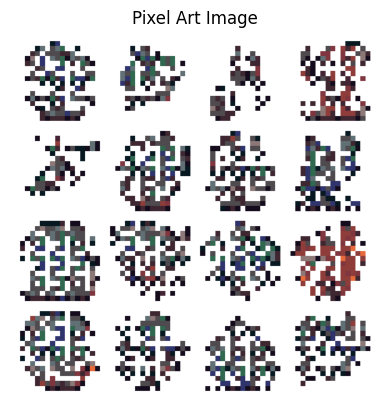

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('./generated_pixel_art_20250130_143519/grid_20250130_143519.png')

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.title('Pixel Art Image')
plt.show()

# Version 2
###  Increases the model complexity. Manages to learn the patterns of emoji but not so good other wise.

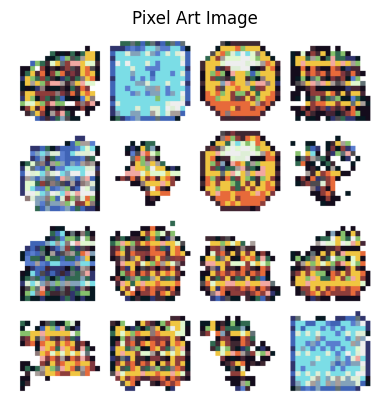

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('./generated_pixel_art_20250130_172936/grid_20250130_172936.png')

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.title('Pixel Art Image')
plt.show()

# Version 3
###  Tuned the learning rate and scheudler. Learns better though no perfect. It will take more experiments for a good generator.

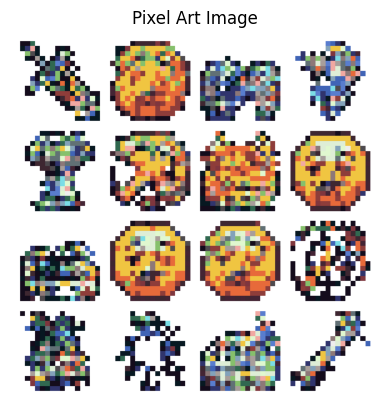

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('./generated_pixel_art_20250130_163307/grid_20250130_163307.png')

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.title('Pixel Art Image')
plt.show()

# Conclusion
## Overall a fun experiment done in a day~ I can try probably try some pretrained models like PixelGAN , or Conditional GANs for future development of the project.